In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Caso seja usado o google colab:

In [45]:
#from google.colab import drive
#drive.mount('/content/drive')

Concatenar todos os arquivos

In [46]:
#pasta onde os arquivos estão localizados
pasta='.'
#nome do arquivo csv final com os dados processados
arquivo_out = 'casos_incendio.csv'

dataframes = []

#os.listdir para listar os arquivos dentro da pasta
for item in os.listdir(pasta):
    if item.endswith('.csv'):
        caminho_arquivo = os.path.join(pasta,item)
        df = pd.read_csv(caminho_arquivo)
        dataframes.append(df)
        
#combinar os dataframes em um só
arquivo = pd.concat(dataframes, ignore_index=True)
arquivo = arquivo.sort_values(by=['ano','mês'], ascending=[False,True])
arquivo = arquivo.drop_duplicates()
arquivo.to_csv(arquivo_out, index=False)
arquivo

estado             municipio     bioma   ano  mês  dia
474328  MATO GROSSO               CÁCERES  Pantanal  2023    1    2
474329  MATO GROSSO                POCONÉ  Pantanal  2023    1    2
474330     MARANHÃO  AMARANTE DO MARANHÃO   Cerrado  2023    1    2
474331     MARANHÃO         TASSO FRAGOSO   Cerrado  2023    1    2
474332     MARANHÃO         ALTO PARNAÍBA   Cerrado  2023    1    2
...             ...                   ...       ...   ...  ...  ...
49836      MARANHÃO       ITAPECURU MIRIM   Cerrado  2014   12   27
49838         CEARÁ       VIÇOSA DO CEARÁ  Caatinga  2014   12   18
49839      MARANHÃO         PAULINO NEVES   Cerrado  2014   12   18
49844      MARANHÃO                TUNTUM   Cerrado  2014   12   11
52246      MARANHÃO   CENTRO DO GUILHERME  Amazônia  2014   12   17

[530053 rows x 6 columns]

Para verificar as colunas:

In [47]:
#pesquisar = arquivo[arquivo['ano']==2022]
#pesquisar

Criação dos gráficos:

In [48]:
#contagem de ocorrências por ano
df_ano = arquivo.groupby('ano')[['ano']].count().rename(columns={'ano':'count'})
df_ano.head()

count
ano        
2014  52292
2015  58097
2016  54566
2017  53258
2018  41793

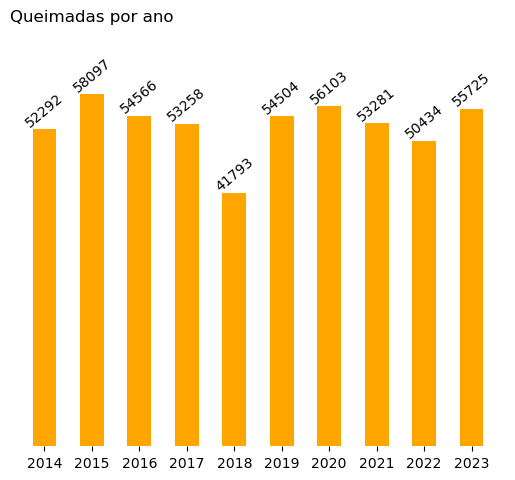

In [50]:
#gráfico para queimadas por ano ao longo dos 9 anos

#criação do gráfico
fig, ax = plt.subplots()
bars = ax.bar(list(df_ano.index), df_ano['count'], color='orange',
             width=0.5)

#rótulos com valores das barras
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() /2, bar.get_height(),
           f'{int(bar.get_height())}', ha='center',va='bottom',
           rotation=40)
    
#ajustes do gráfico
ax.set_xticks(list(df_ano.index))
ax.set_xticklabels(list(df_ano.index))
ax.set_title('Queimadas por ano', loc='left', pad=40)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_visible(False)
ax.grid(False)

fig.savefig('queimadas_ano.png', dpi=100, bbox_inches='tight',
           orientation='portrait')

plt.show()

In [24]:
#contagem de ocorrências por mês ao total dos 9 anos
df_mes = arquivo.groupby('mês')[['mês']].count().rename(columns={'mês':'count'})
df_mes.head()

count
mês       
1    17103
2    12127
3    14214
4    14007
5    20092

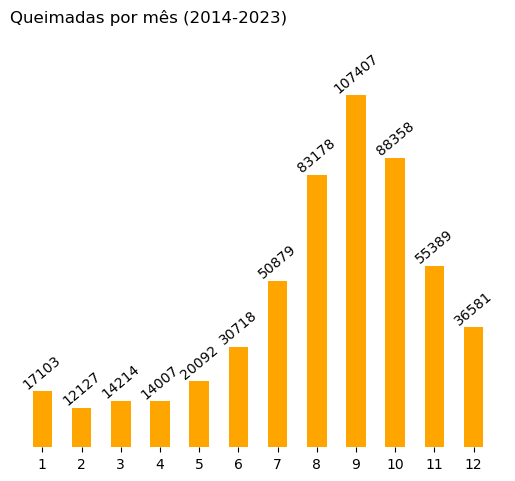

In [25]:
#gráfico para queimadas por mês de todos os 9 anos

#criação do gráfico
fig, ax = plt.subplots()
bars = ax.bar(list(df_mes.index), df_mes['count'], color='orange',
             width=0.5)

#rótulos com valores das barras
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() /2, bar.get_height(),
           f'{int(bar.get_height())}', ha='center',va='bottom',
           rotation=40)
    
#ajustes do gráfico
ax.set_xticks(list(df_mes.index))
ax.set_xticklabels(list(df_mes.index))
ax.set_title('Queimadas por mês (2014-2023)', loc='left', pad=40)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_visible(False)
ax.grid(False)

fig.savefig('queimadas_mes.png', dpi=100, bbox_inches='tight',
           orientation='portrait')

plt.show()

In [26]:
#ocorrências por estado
df_estado = arquivo.groupby(['estado'])[['estado']].count().rename(columns={'estado': 'count'})
df_estado.head()

count
estado         
ACRE       9329
ALAGOAS    1558
AMAPÁ      4497
AMAZONAS  20716
BAHIA     33381

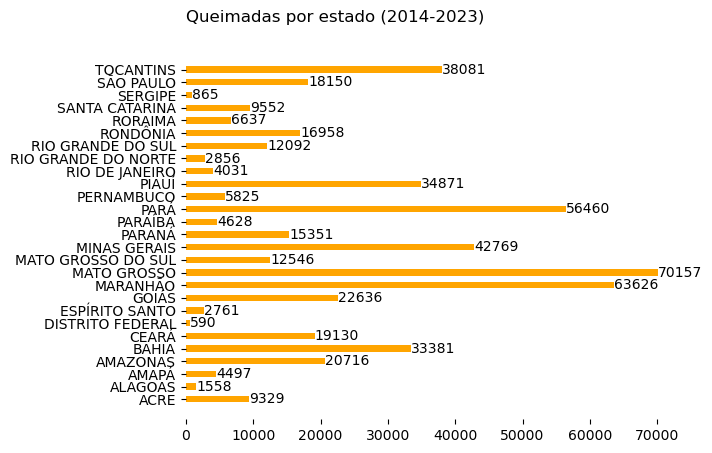

In [27]:
#queimadas por estado no total dos 9 anos

#criação do gráfico
fig, ax = plt.subplots()
bars = ax.barh(list(df_estado.index), df_estado['count'], color='orange', height=0.5)

#rótulos com valores das barras
for bar in bars:
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, 
            f'{int(bar.get_width())}', va='center', ha='left', 
            fontsize=10, color='black')

#ajustes do gráfico
ax.set_title('Queimadas por estado (2014-2023)', loc='left', pad=20)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

fig.savefig('queimadas_estado.png', dpi=100, bbox_inches='tight', orientation='portrait')

plt.show()

In [51]:
#contagem de ocorrências por bioma ao total dos 9 anos
df_bioma = arquivo.groupby('bioma')[['bioma']].count().rename(columns={'bioma':'count'})
df_bioma.head()

count
bioma                 
Amazônia        175384
Caatinga         66195
Cerrado         192997
Mata Atlântica   82908
Pampa             6088

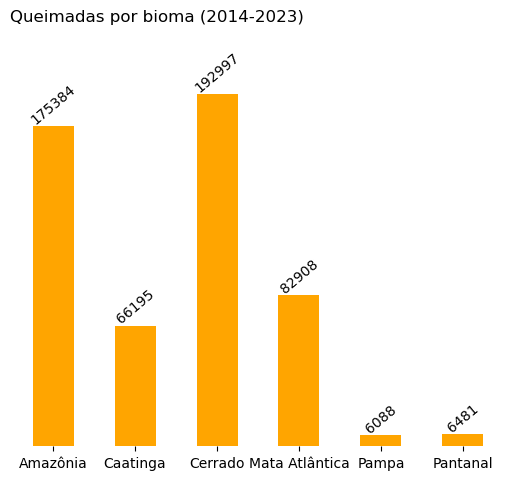

In [52]:
#gráfico de queimadas por bioma no total dos 9 anos

#criação do gráfico
fig, ax = plt.subplots()
bars = ax.bar(list(df_bioma.index), df_bioma['count'], color='orange',
             width=0.5)

#rótulos com valores das barras
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() /2, bar.get_height(),
           f'{int(bar.get_height())}', ha='center',va='bottom',
           rotation=40)
    
#ajustes do gráfico
ax.set_xticks(list(df_bioma.index))
ax.set_xticklabels(list(df_bioma.index))
ax.set_title('Queimadas por bioma (2014-2023)', loc='left', pad=40)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_visible(False)
ax.grid(False)

fig.savefig('queimadas_bioma.png', dpi=100, bbox_inches='tight',
           orientation='portrait')

plt.show()

In [53]:
#linha temporal das ocorrências de cada estado ao longo dos 9 anos
df_estado_ano = arquivo.groupby(['estado','ano'])[['estado']].count().rename(columns={'estado':'count'})
df_estado_ano = df_estado_ano.reset_index()
df_estado_ano.head()

estado   ano  count
0   ACRE  2014    702
1   ACRE  2015    873
2   ACRE  2016   1022
3   ACRE  2017    913
4   ACRE  2018    792

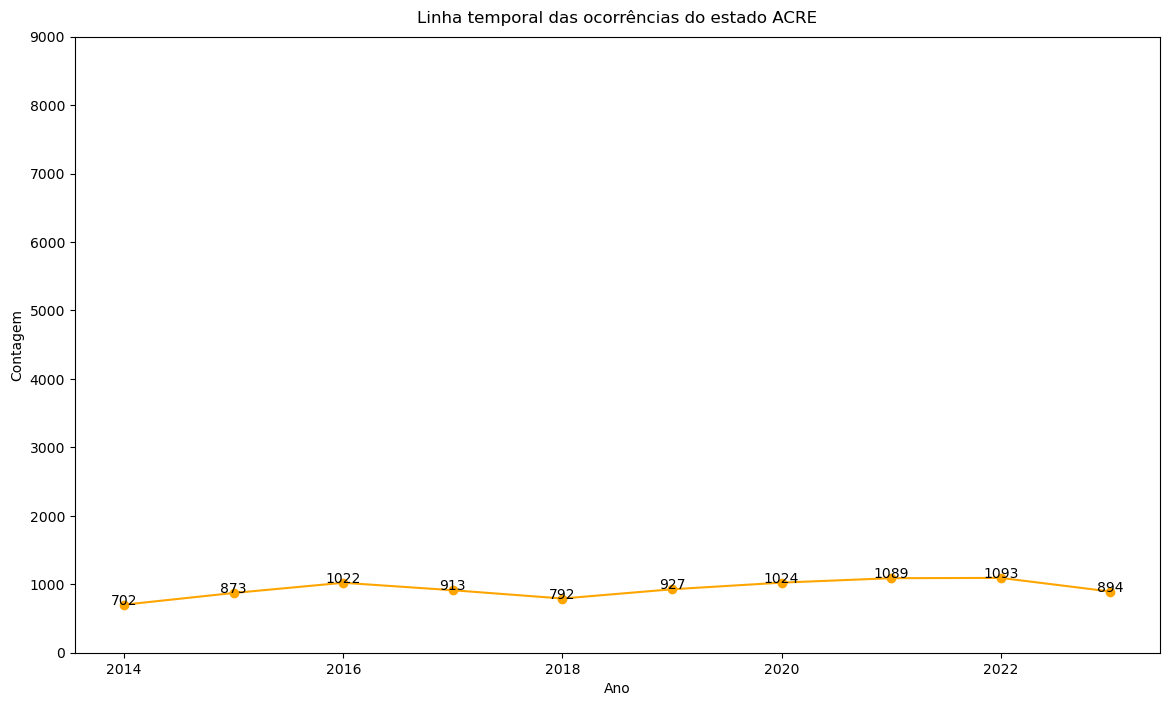

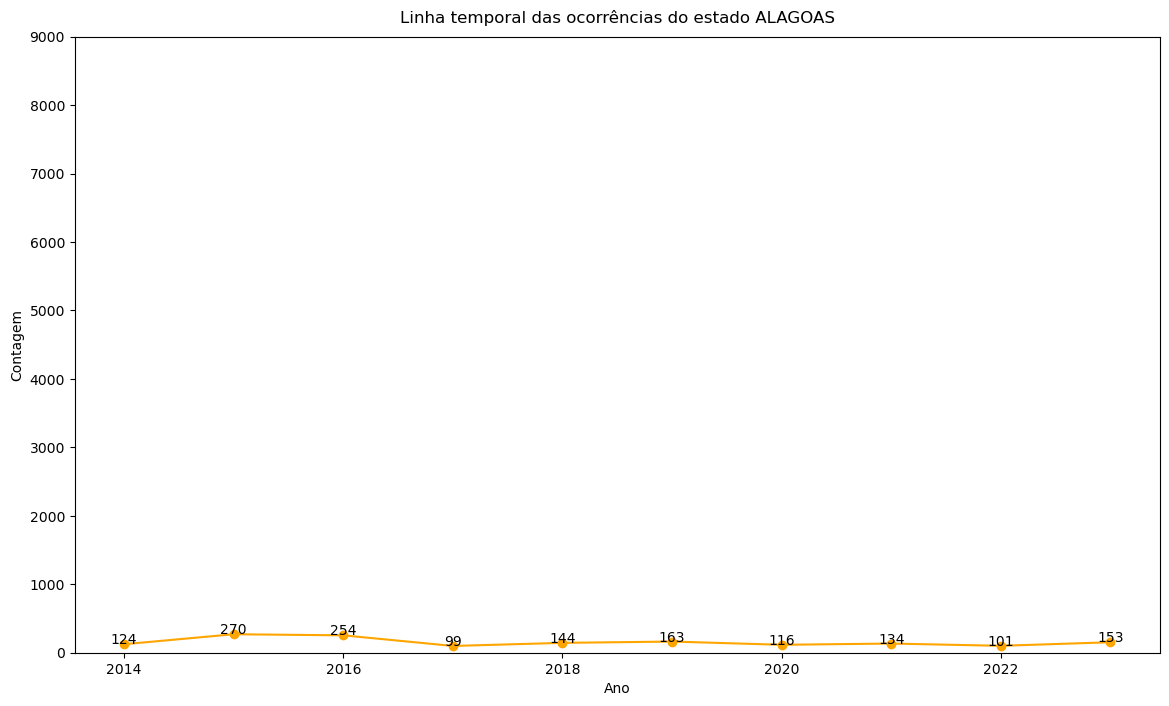

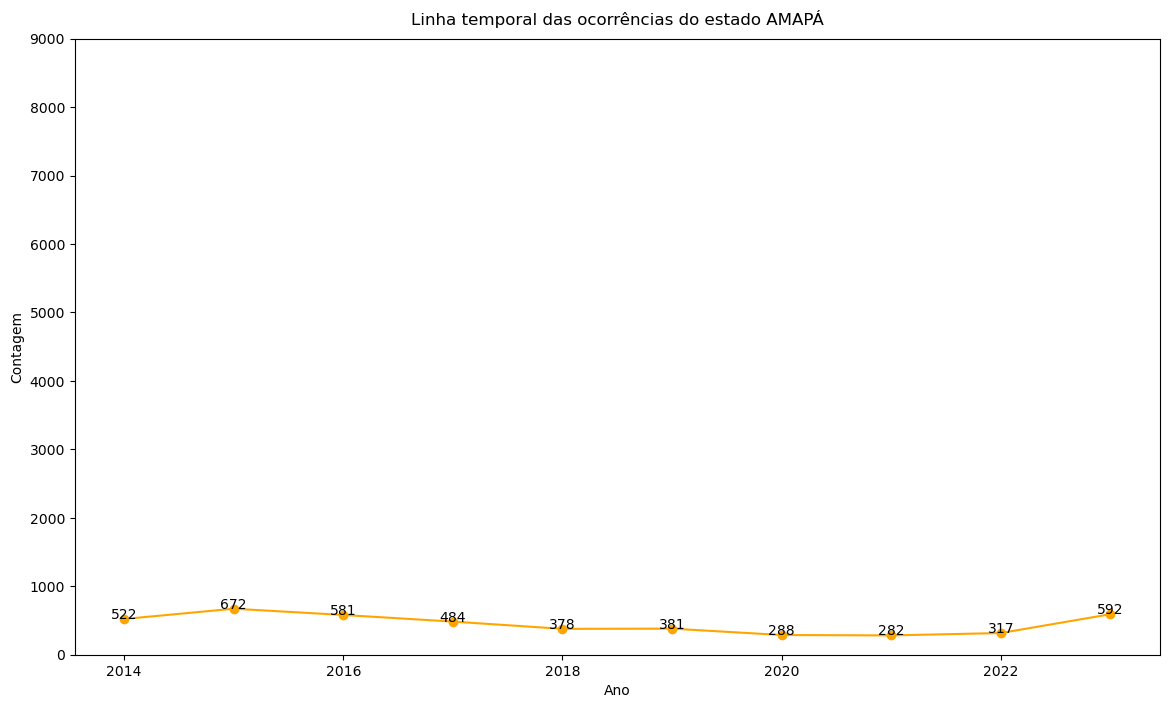

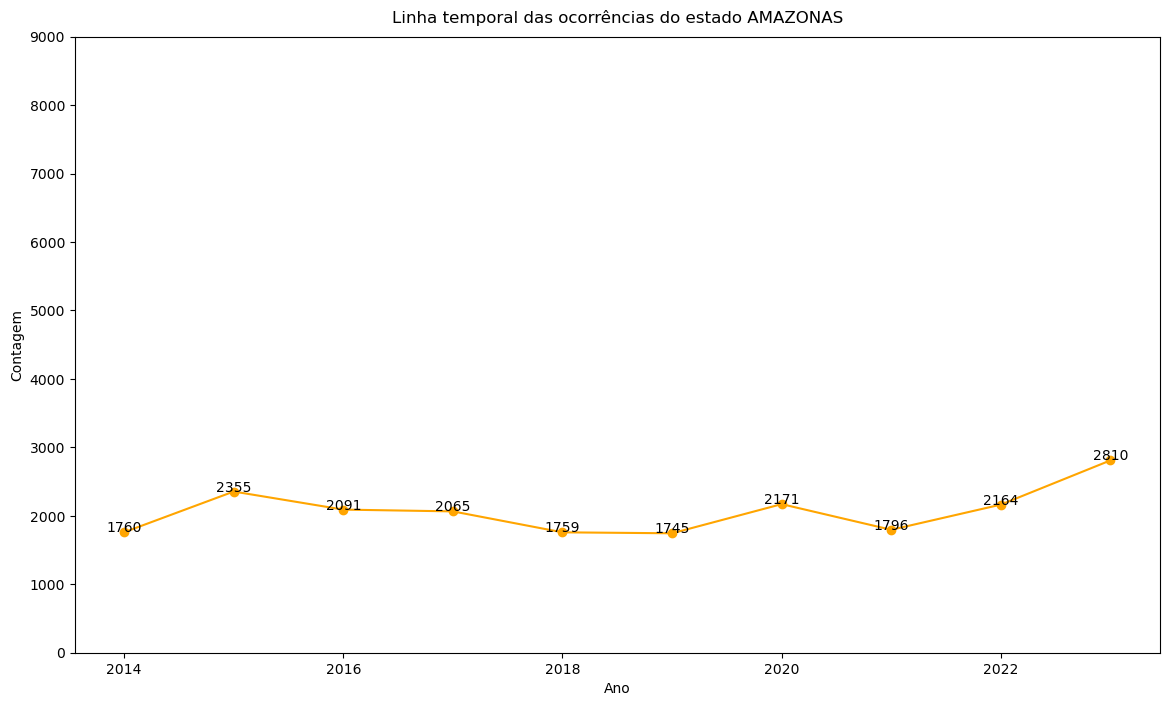

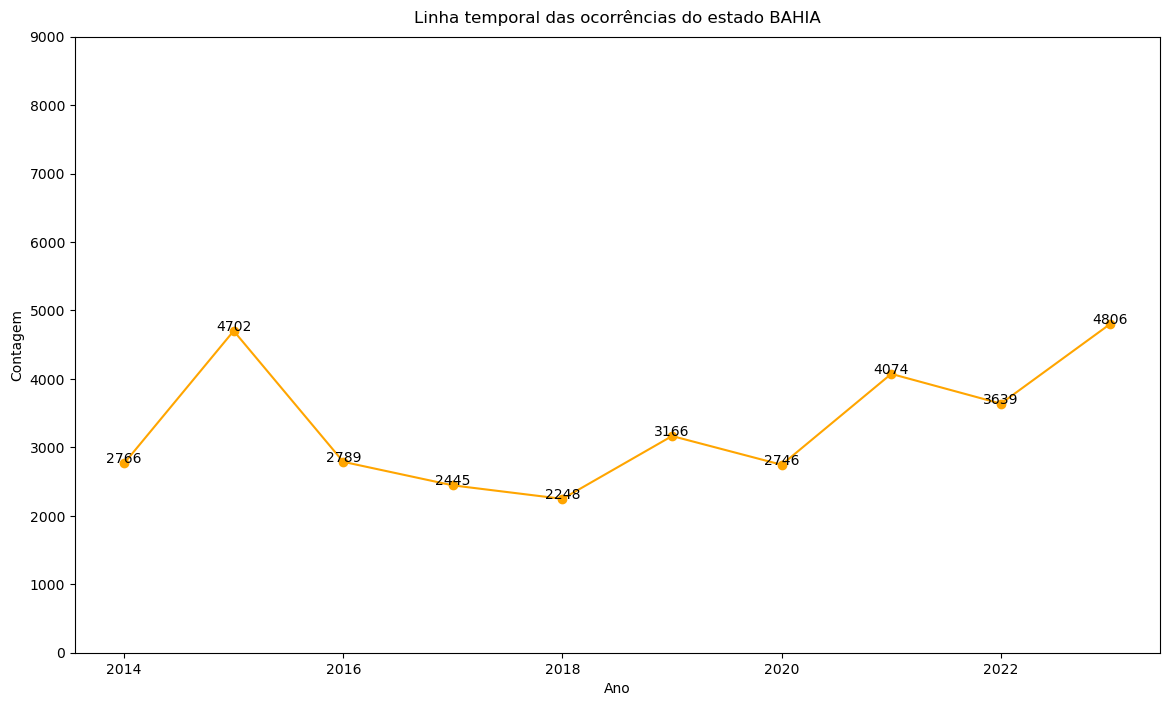

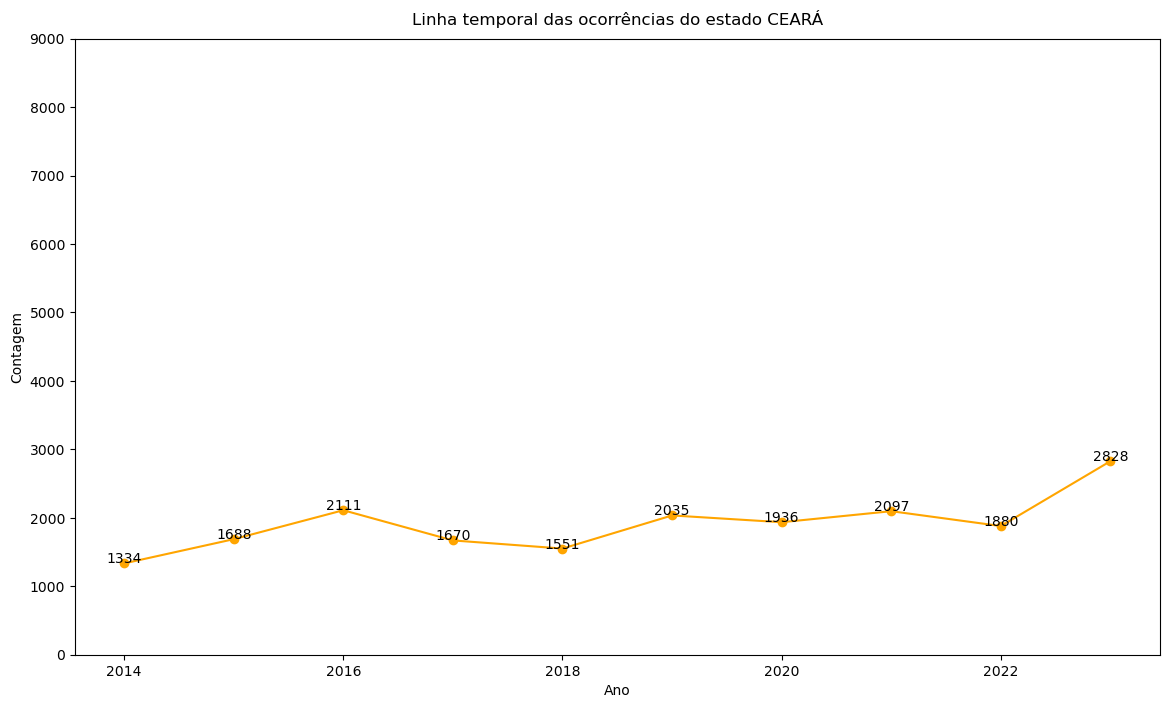

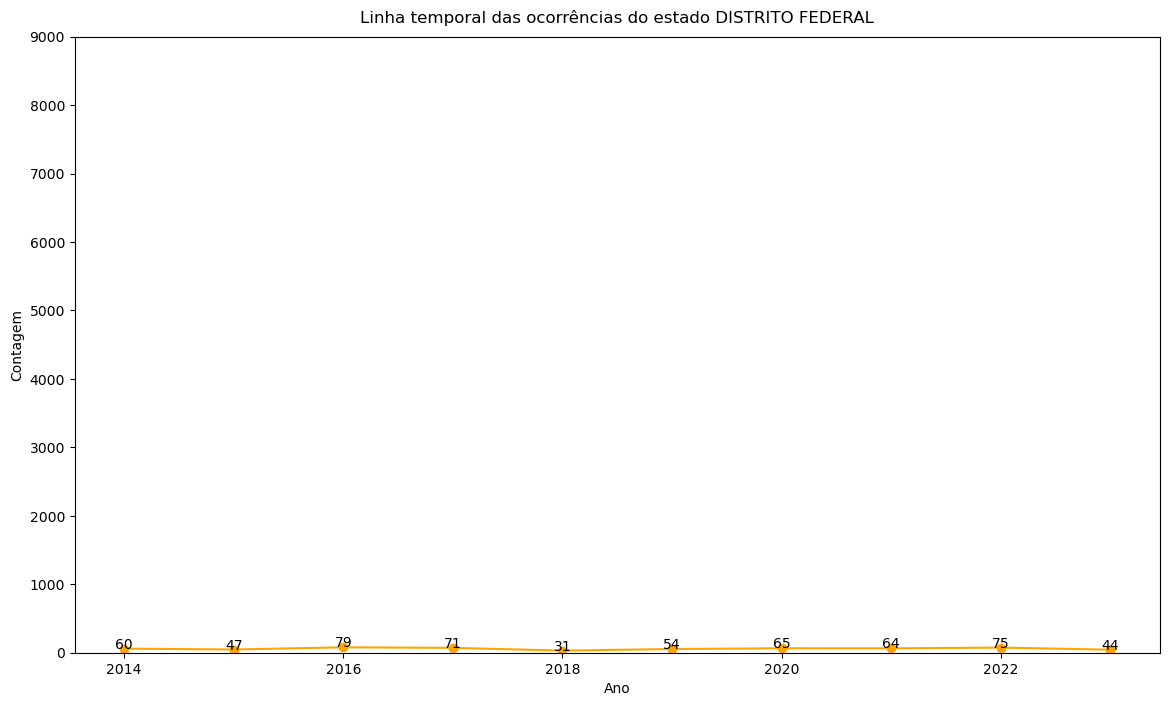

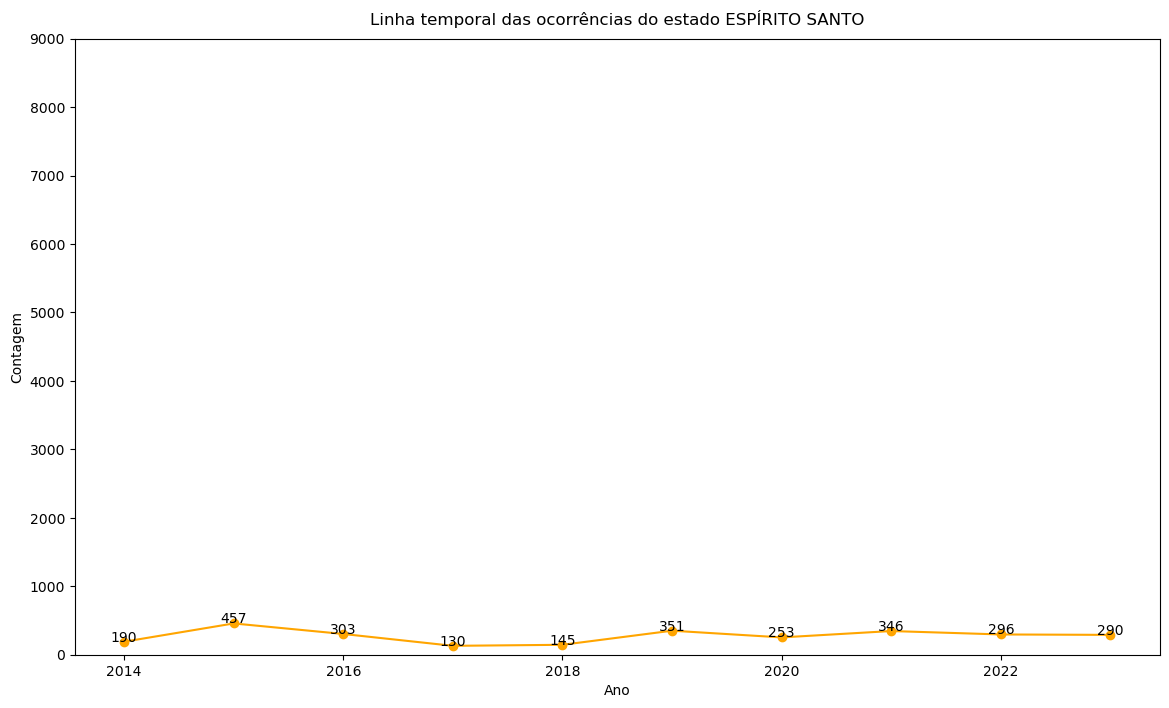

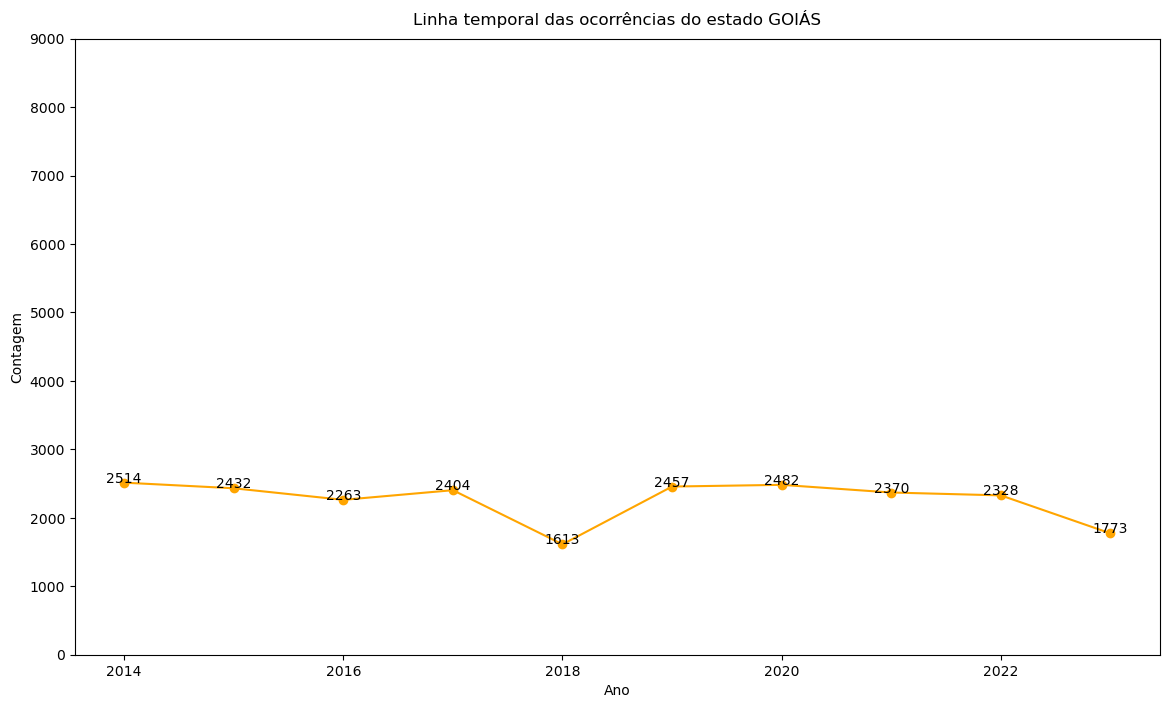

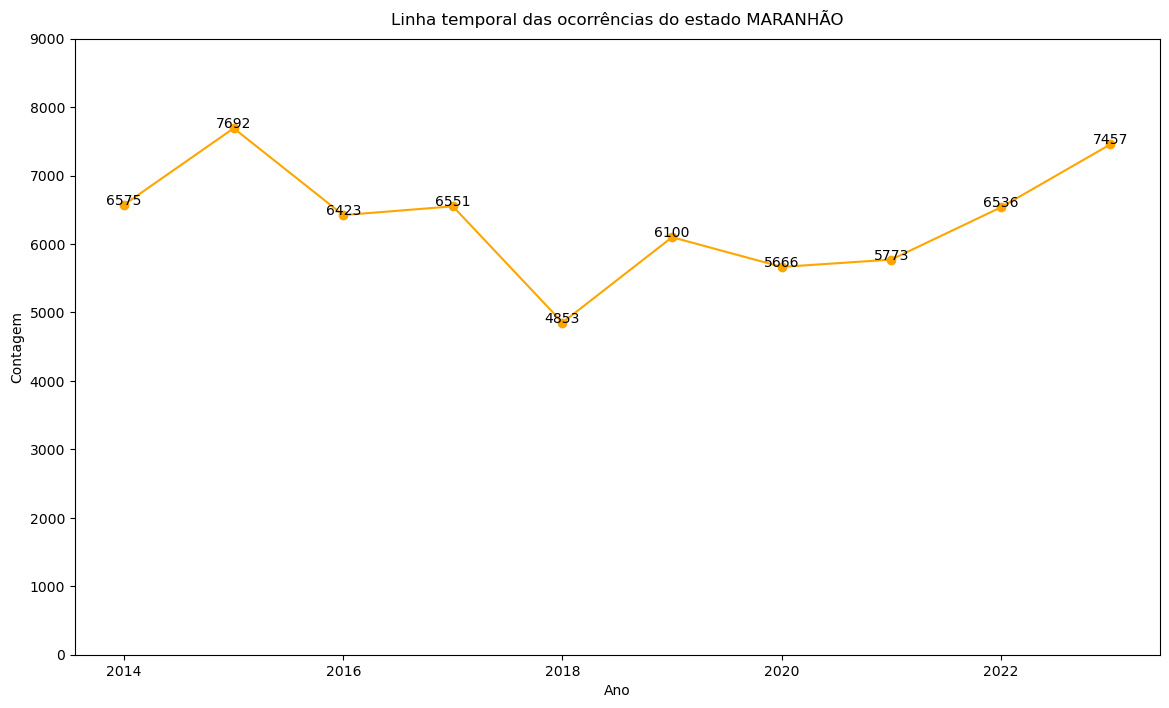

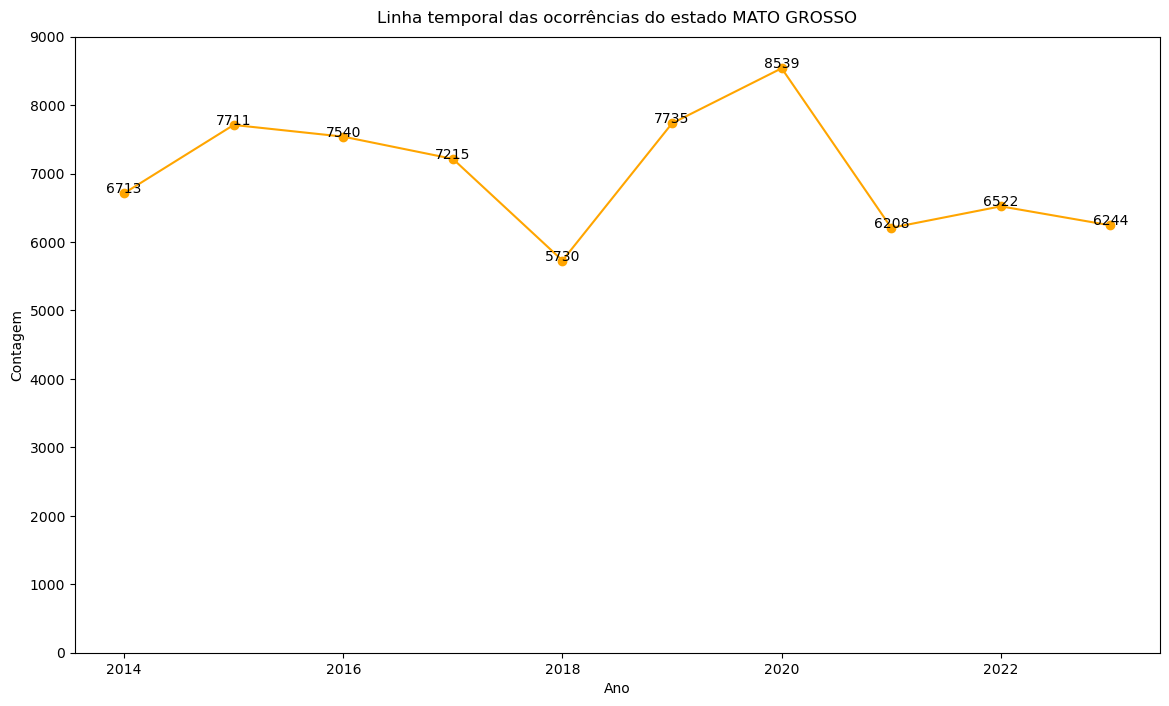

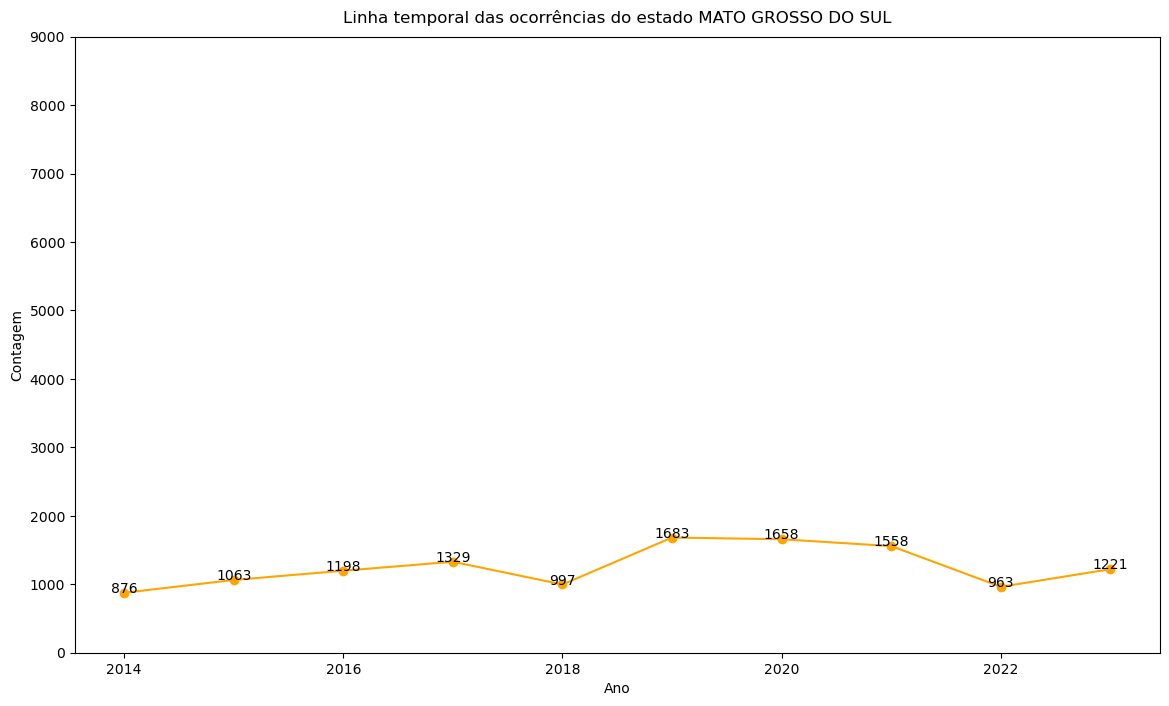

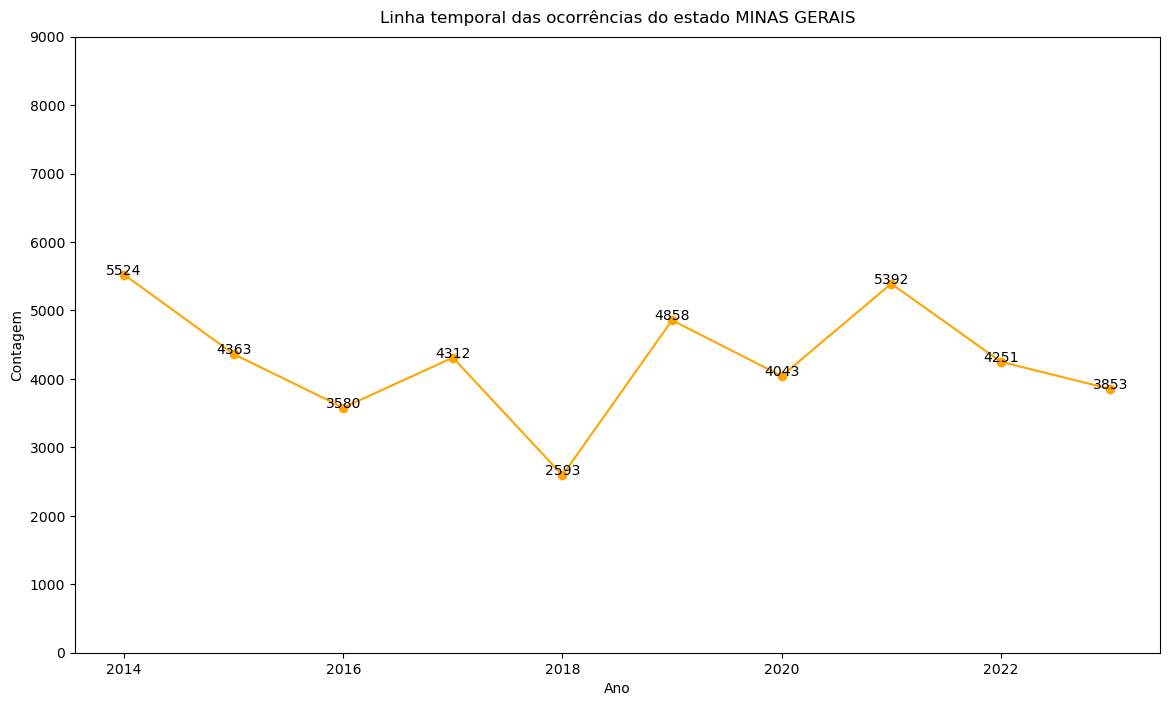

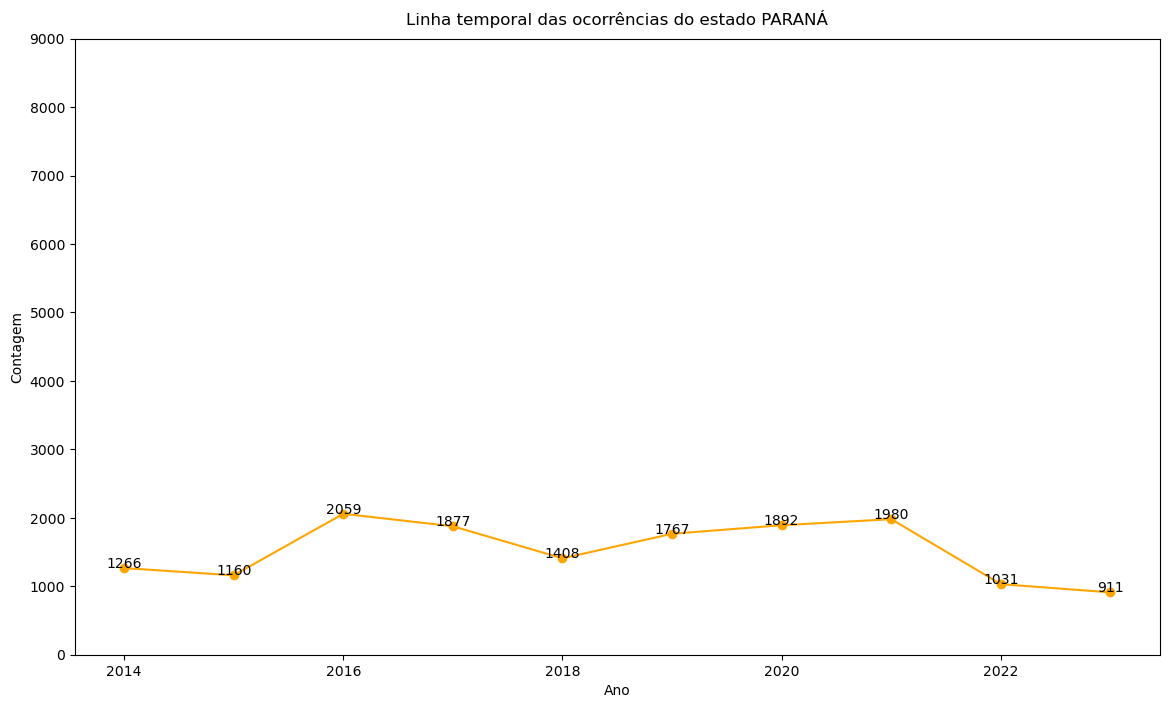

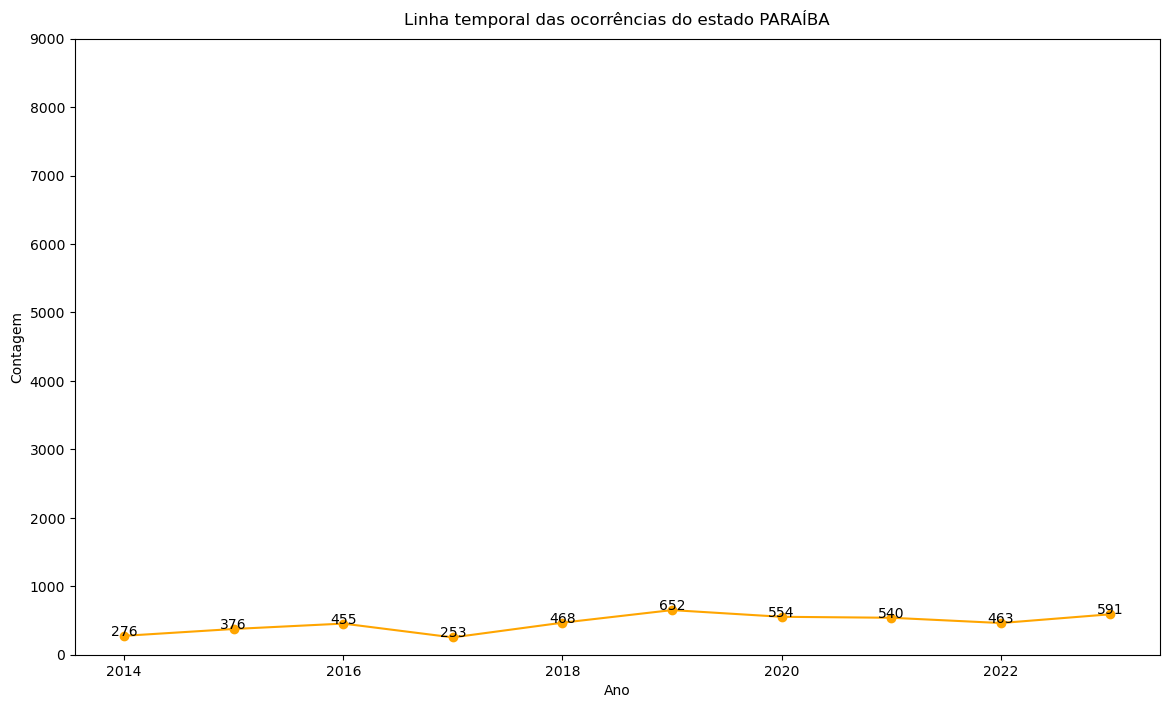

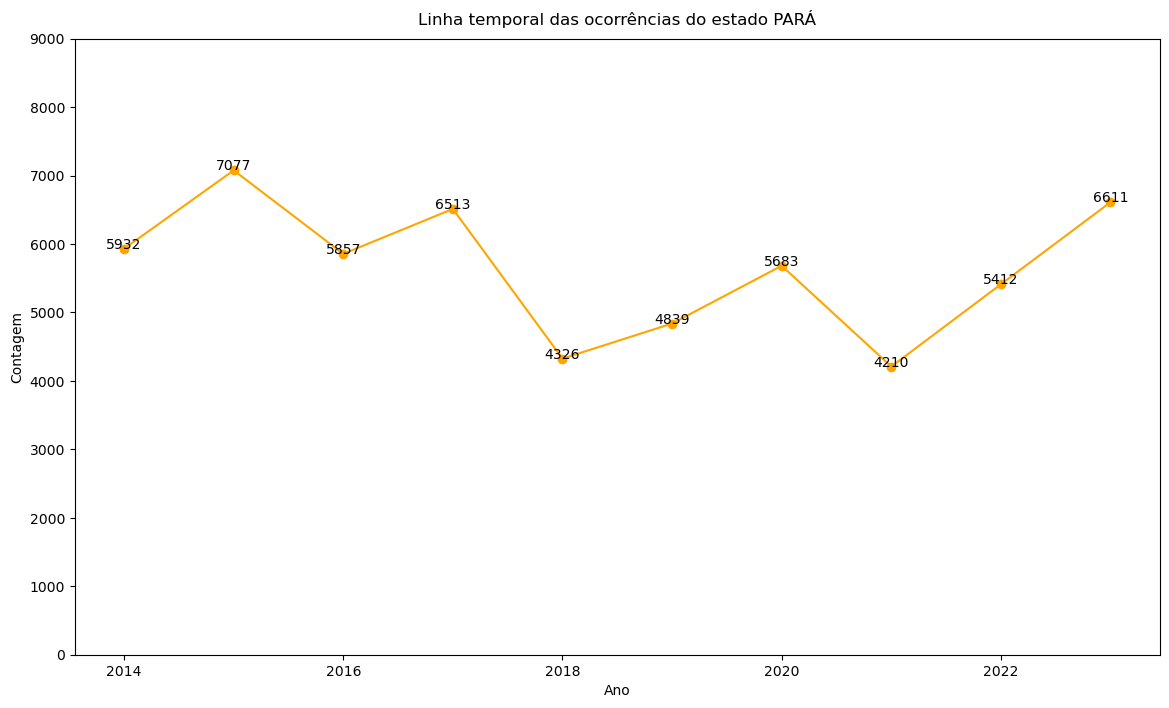

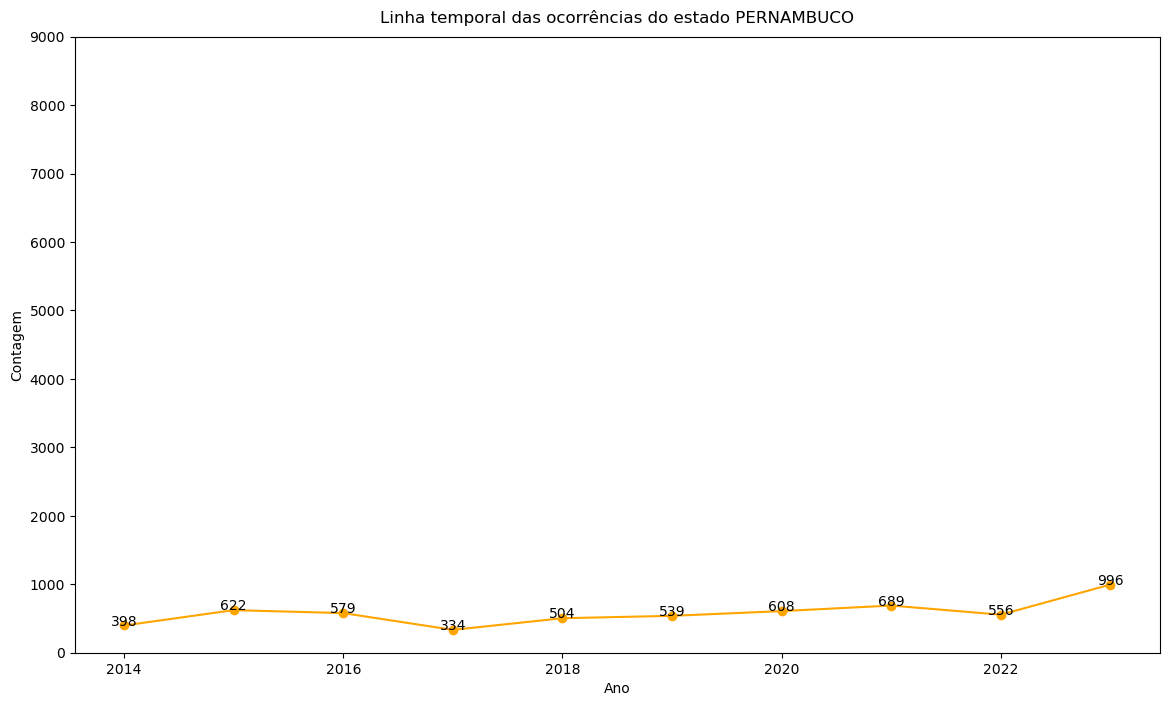

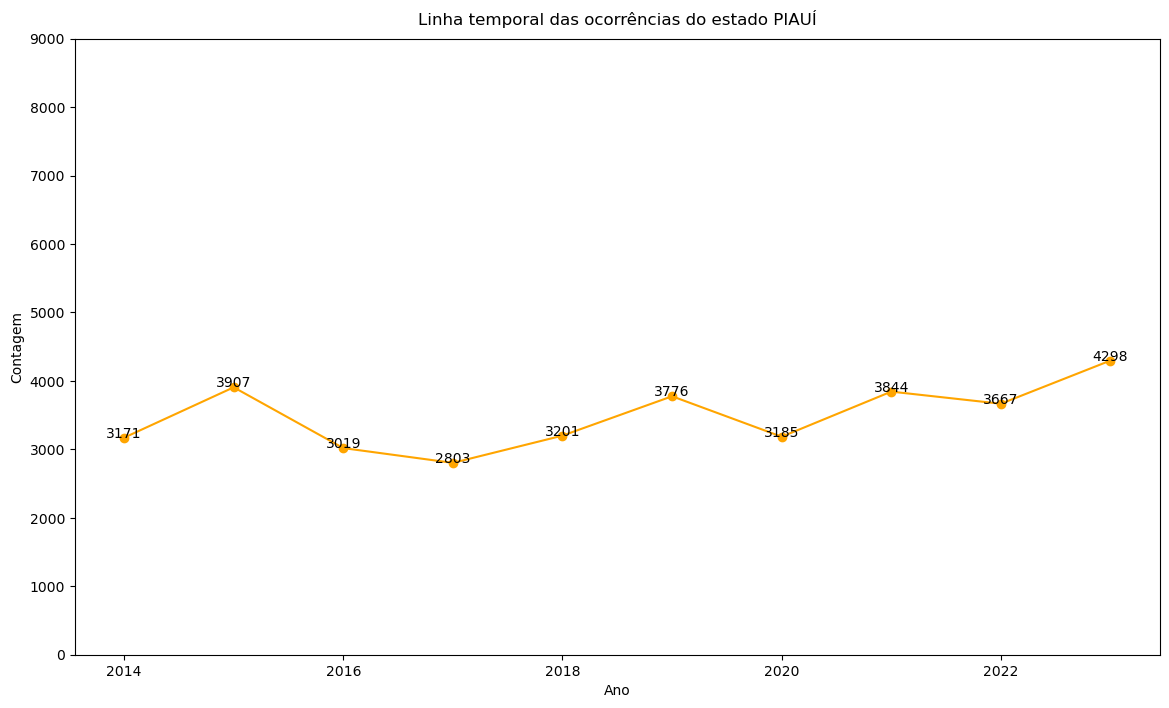

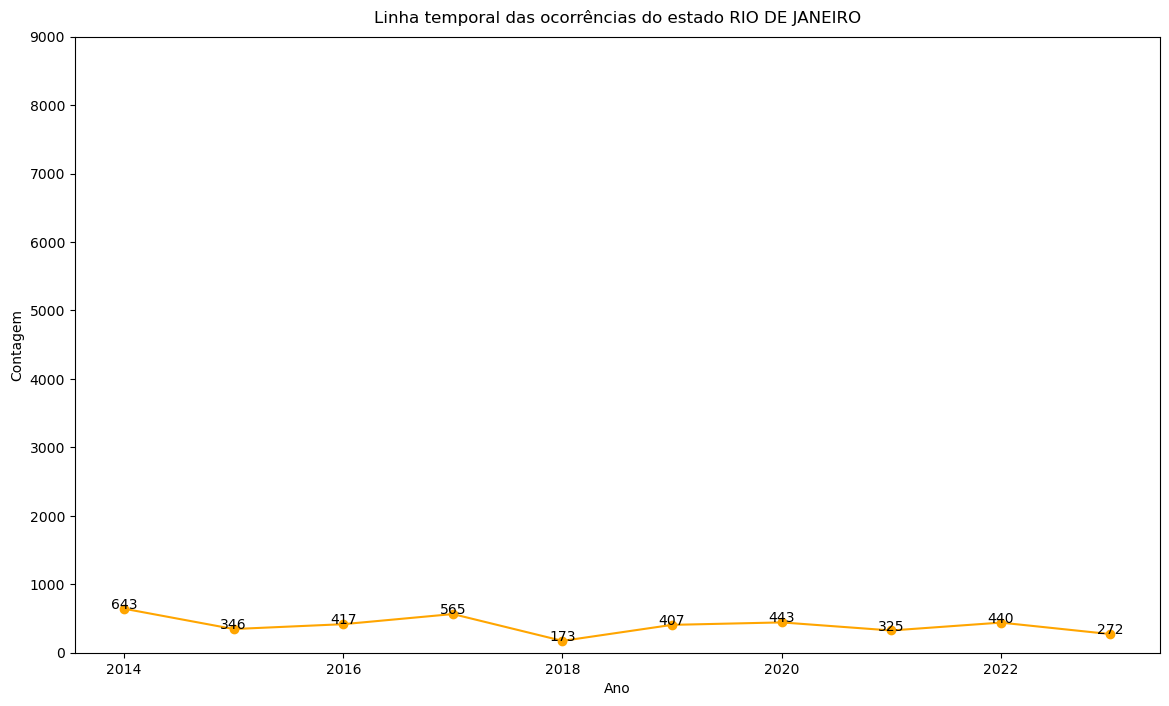

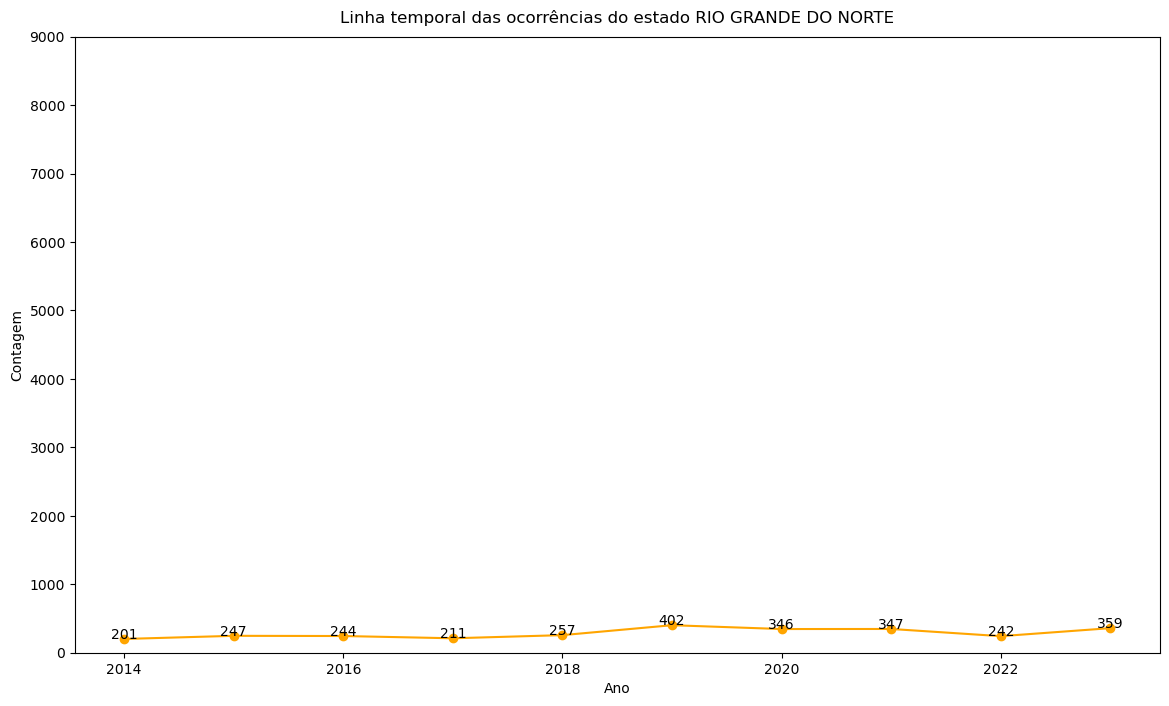

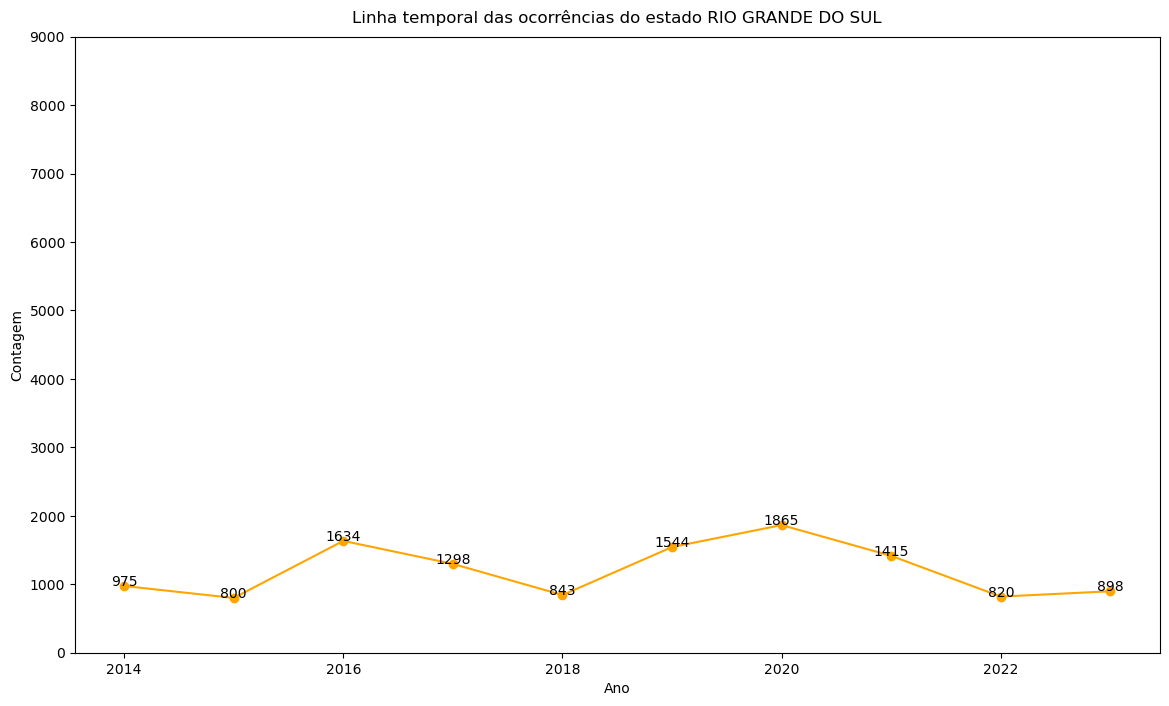

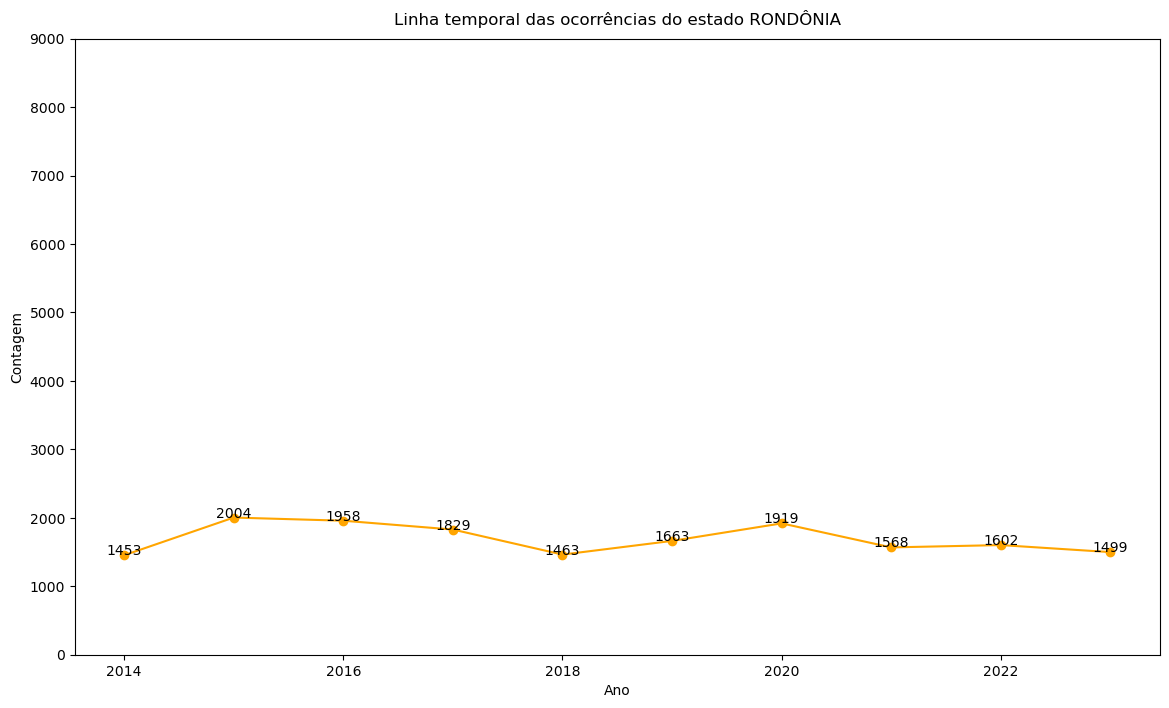

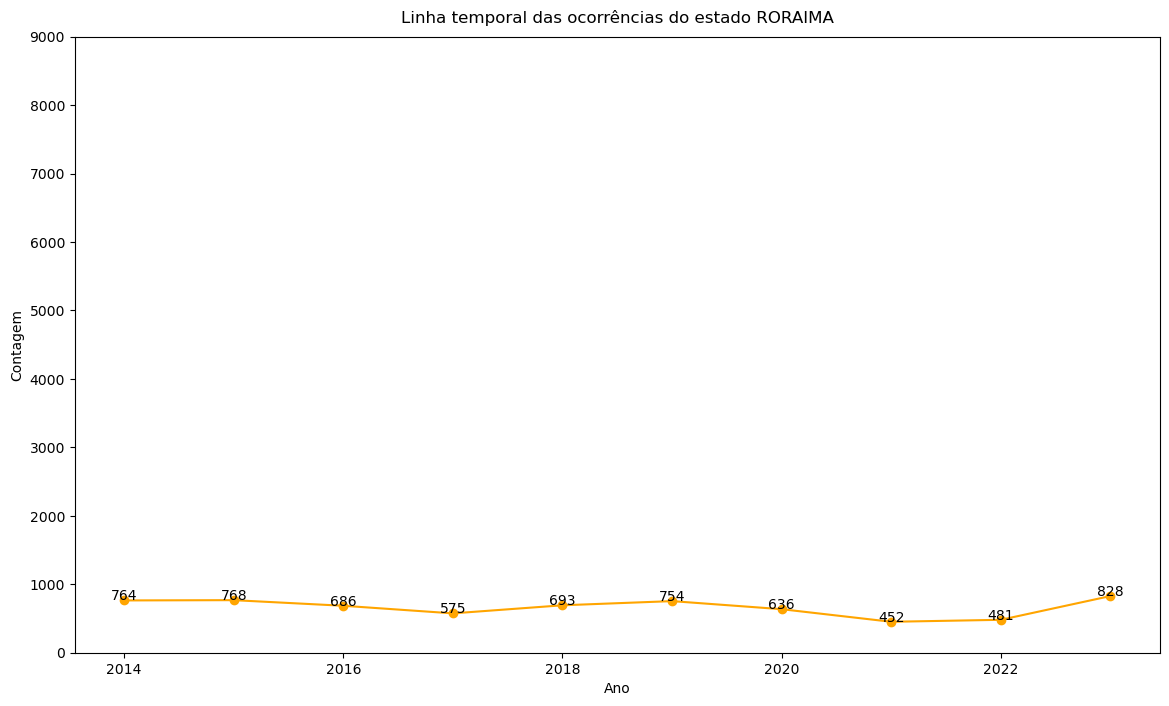

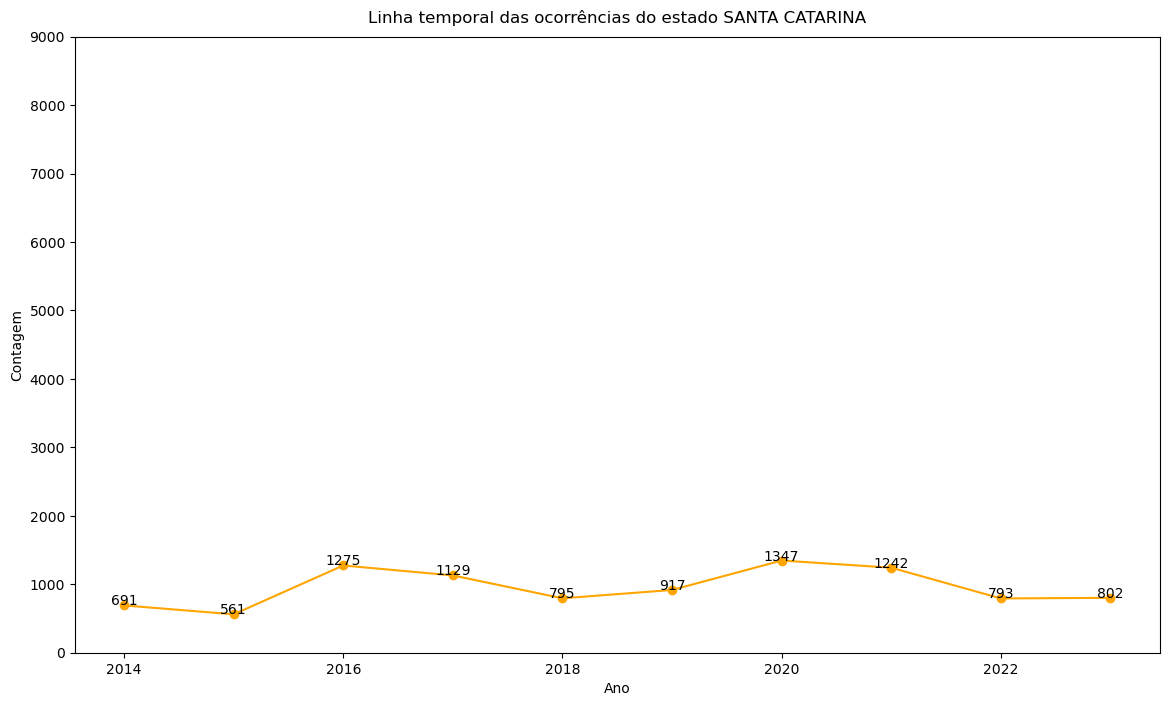

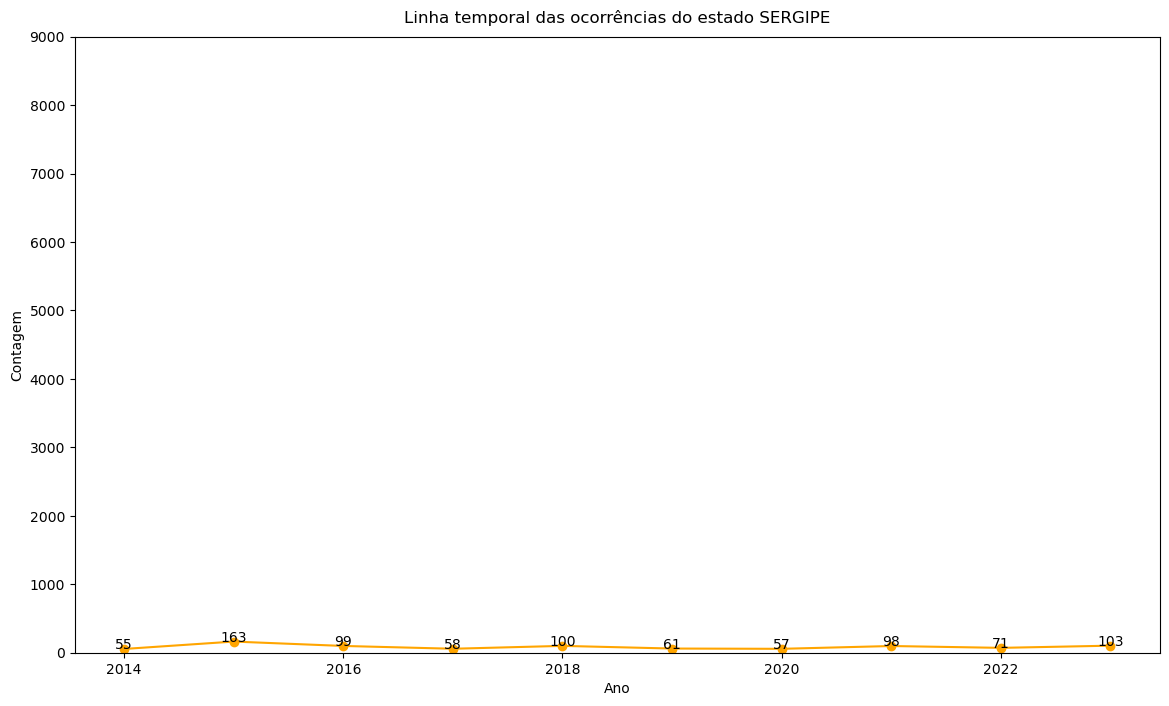

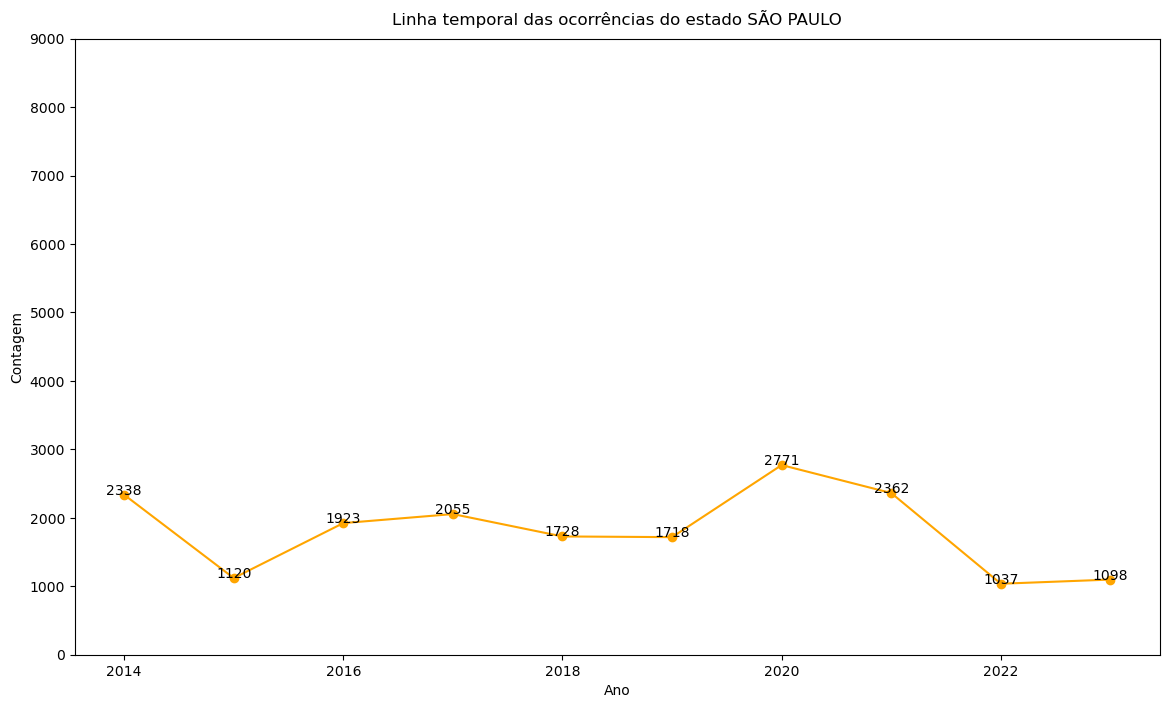

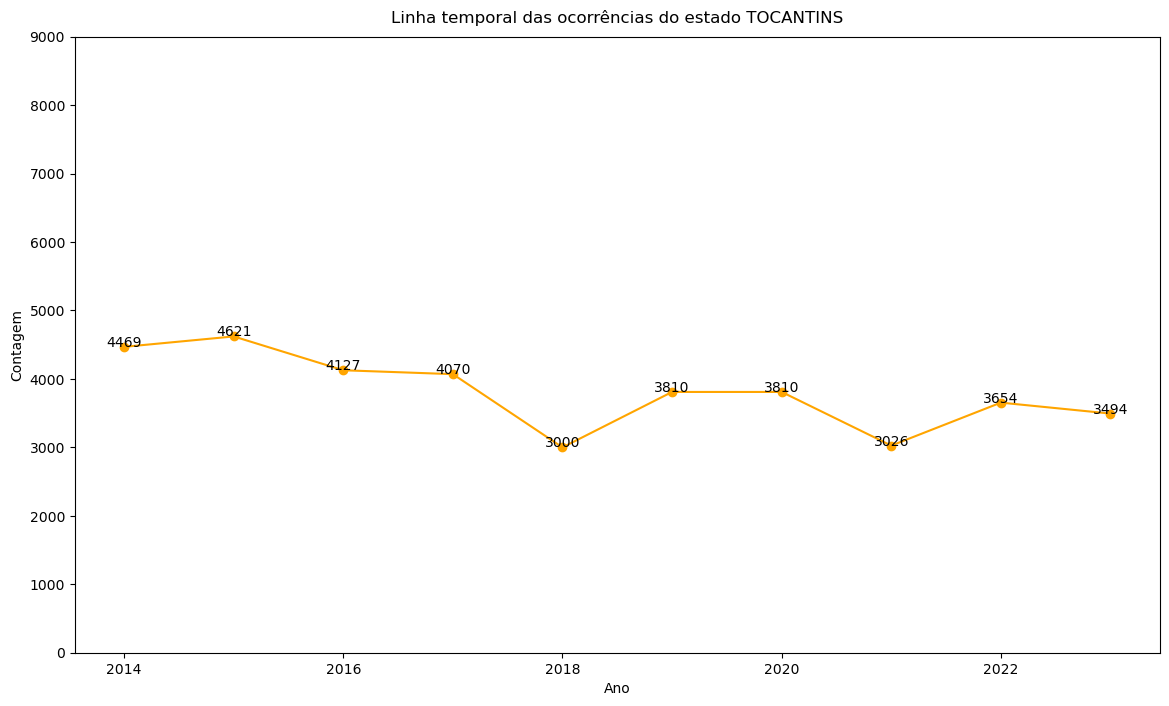

In [31]:
#criar lista de estados únicos
estados = df_estado_ano['estado'].unique()

#criar o gráfico
for estado in estados:
    df_estado = df_estado_ano[df_estado_ano['estado']==estado]
    fig,ax = plt.subplots(figsize=(14,8))
    ax.plot(df_estado['ano'],df_estado['count'], marker='o',
           label=estado, color='orange')
    
    #dimensão máxima do eixo y
    ax.set_ylim(0,9000)
    
    #rótulo dos valores de cada ponto das linhas
    for x,y in zip(df_estado['ano'], df_estado['count']):
        ax.text(x,y + 2, f'{y}', ha='center', va='baseline', fontsize=10)
        
    plt.title(f'Linha temporal das ocorrências do estado {estado}', pad=10)
    plt.xlabel('Ano')
    plt.ylabel('Contagem')
    plt.grid(False)
    
    fig.savefig(f'queimadas_temporais_{estado}.png', dpi=100,
                bbox_inches = 'tight', orientation = 'portrait')
    
    plt.show()
    

In [32]:
#ocorrências por estado e bioma a cada ano
df_bioma_ano = arquivo.groupby(['bioma','estado','ano'])[['estado']].count().rename(columns={'estado':'count'})
df_bioma_ano = df_bioma_ano.reset_index()
df_bioma_ano.head()

bioma estado   ano  count
0  Amazônia   ACRE  2014    702
1  Amazônia   ACRE  2015    873
2  Amazônia   ACRE  2016   1022
3  Amazônia   ACRE  2017    913
4  Amazônia   ACRE  2018    792

In [33]:
#criar lista de estados únicos
estados = df_bioma_ano['estado'].unique()

dados = {}

for i in estados:
    dados[i] = df_bioma_ano[df_bioma_ano['estado'] == i][['bioma','ano','count']]

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

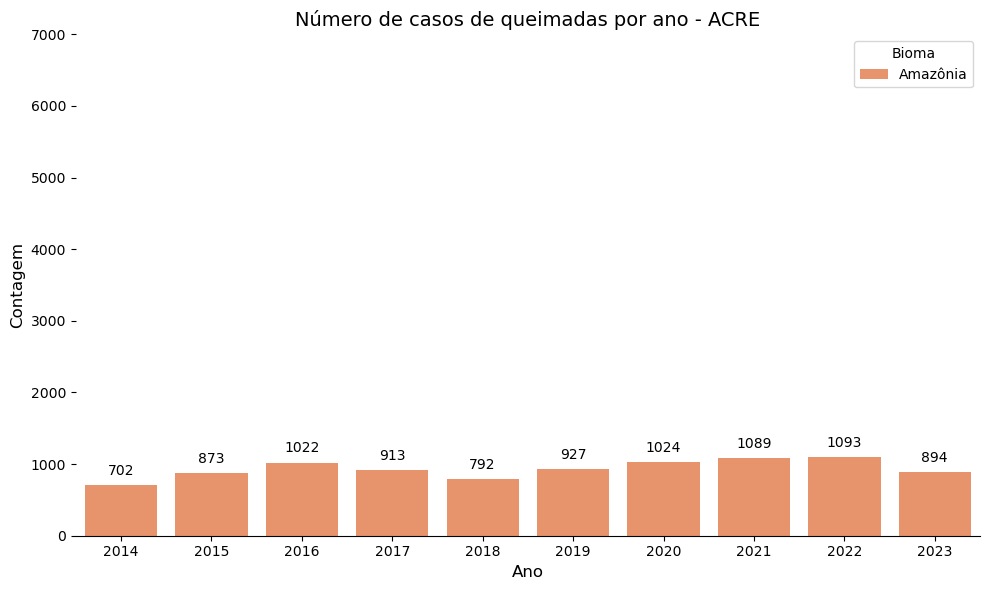

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

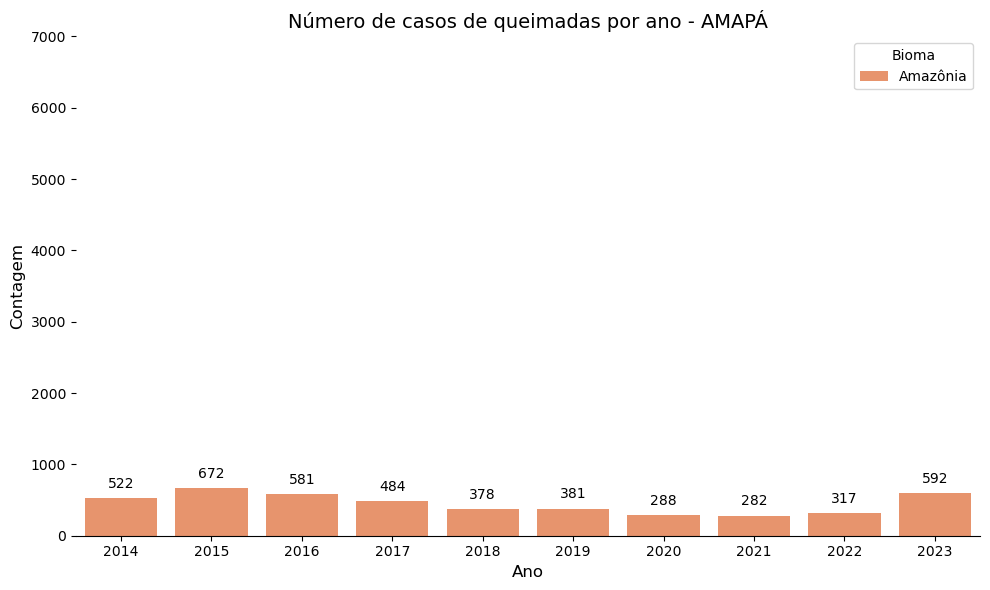

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

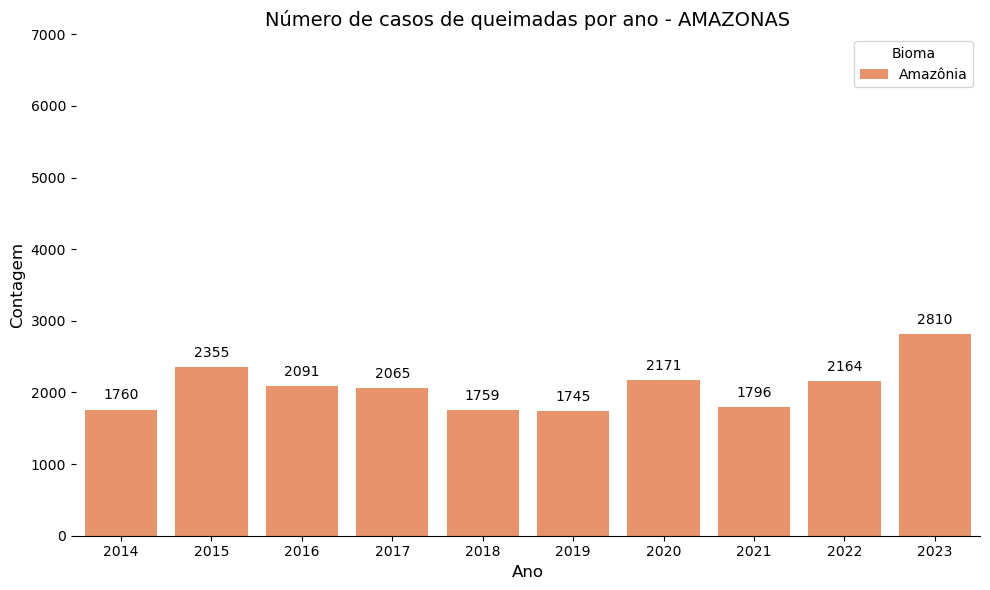

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

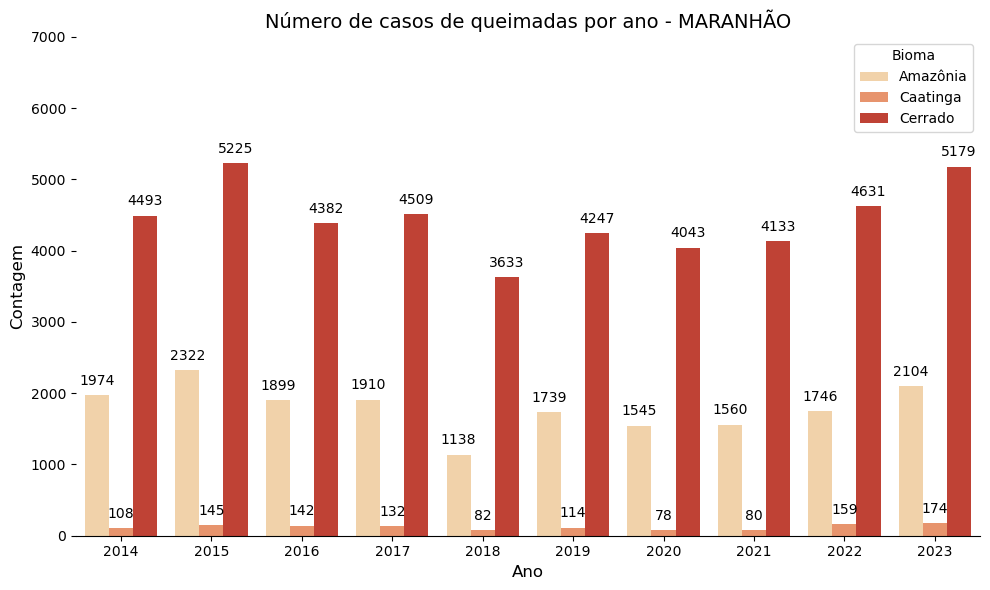

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

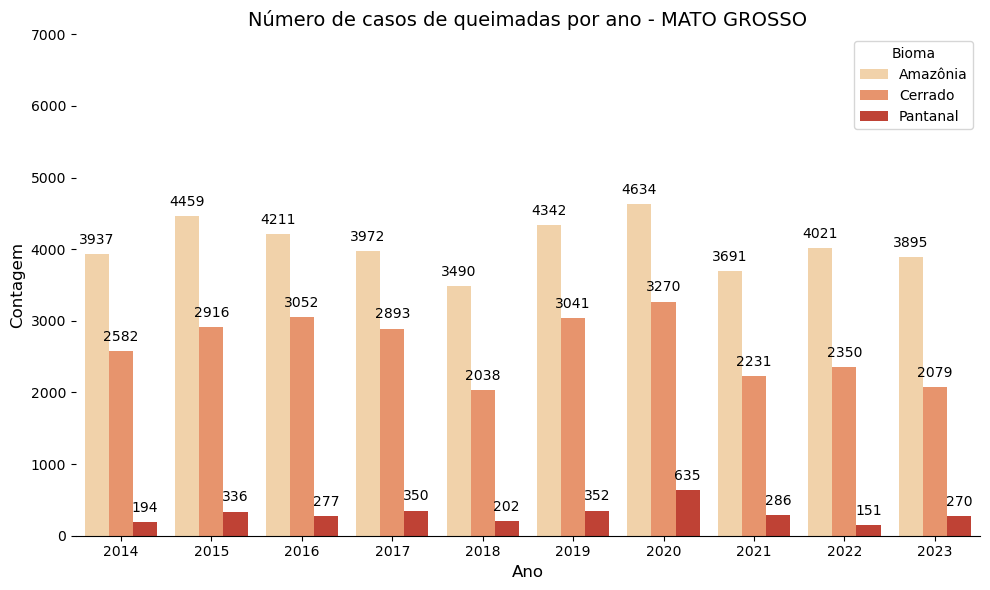

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

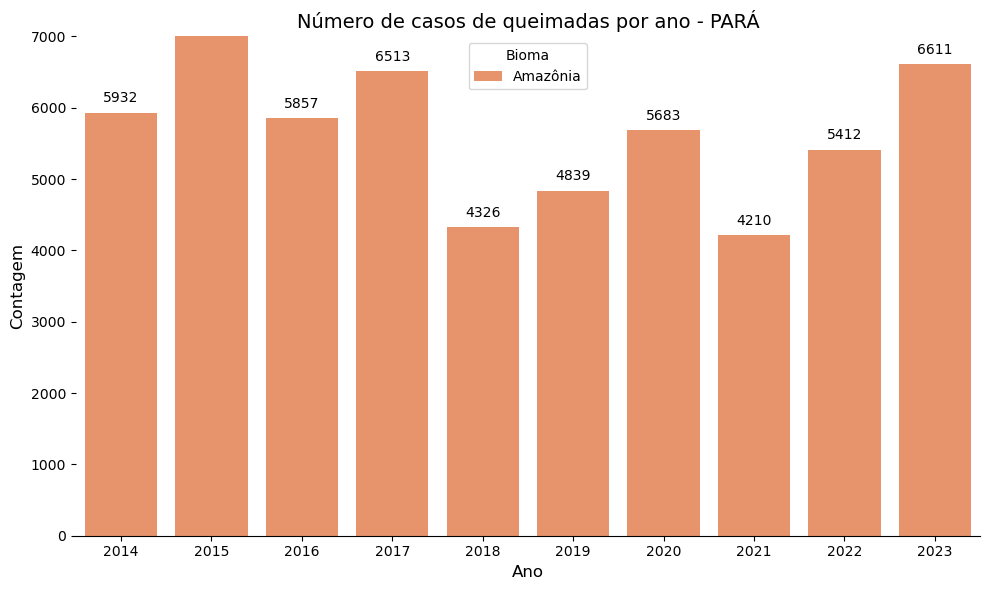

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

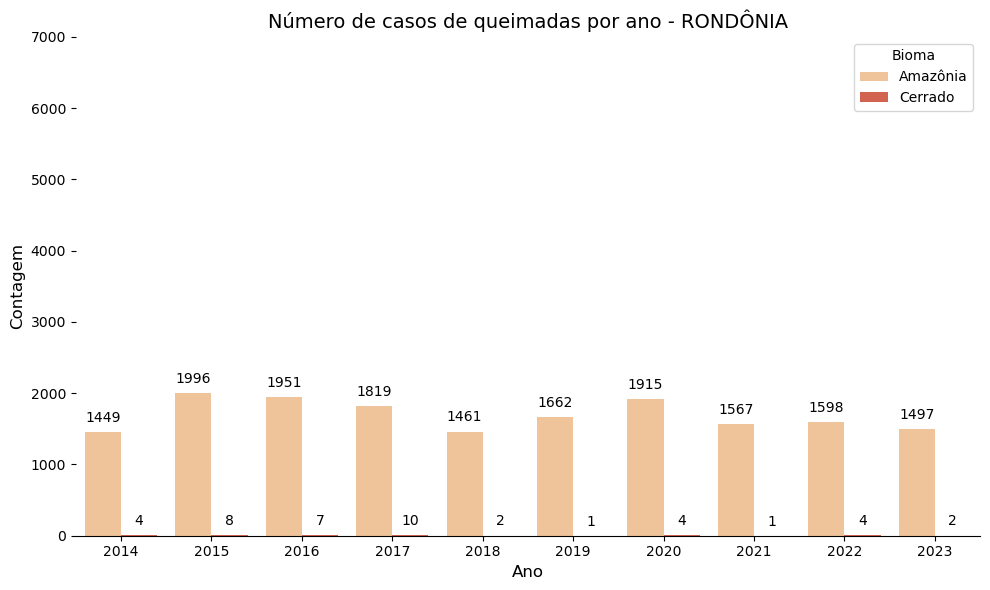

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

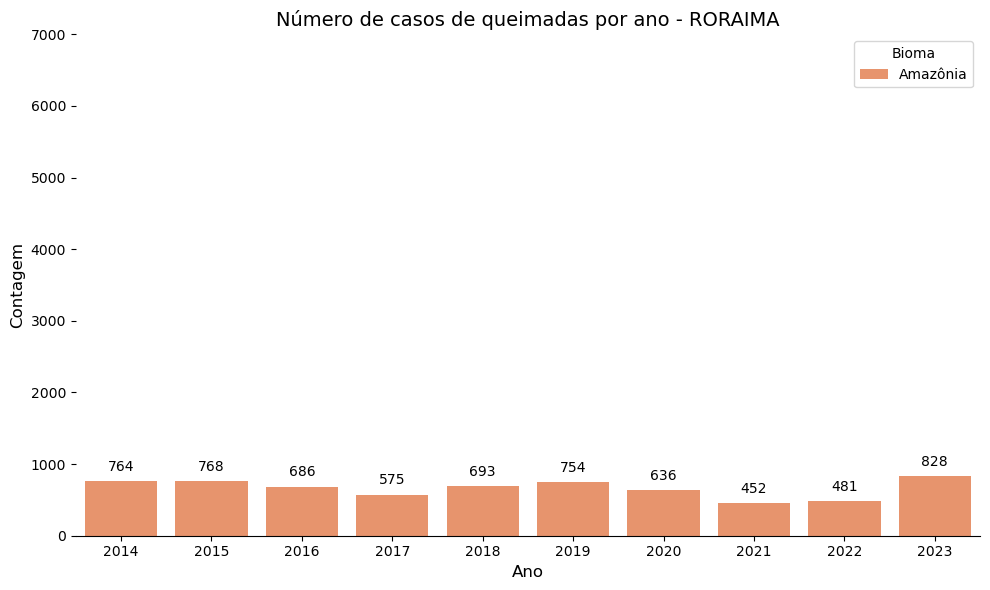

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

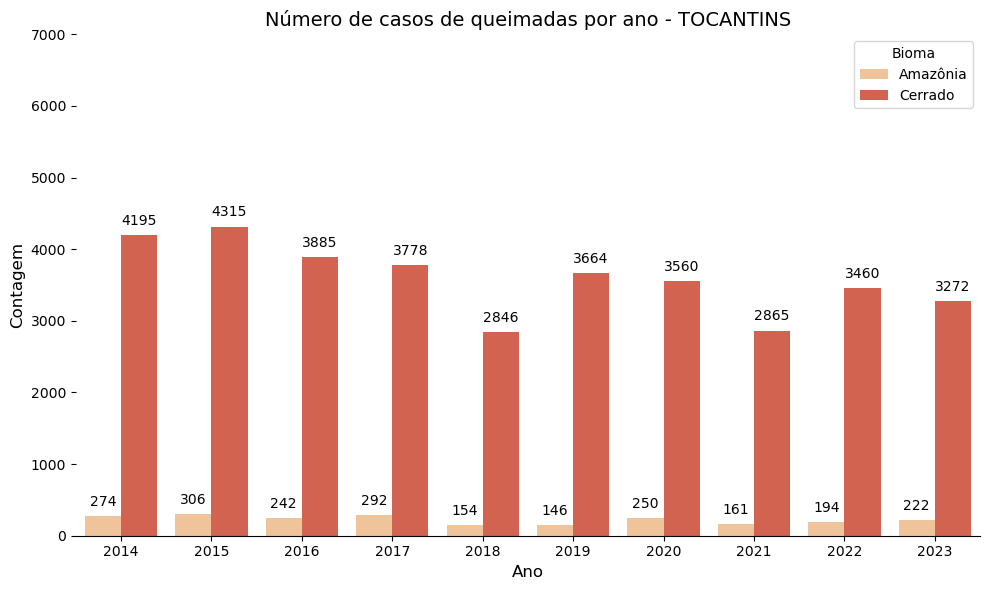

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

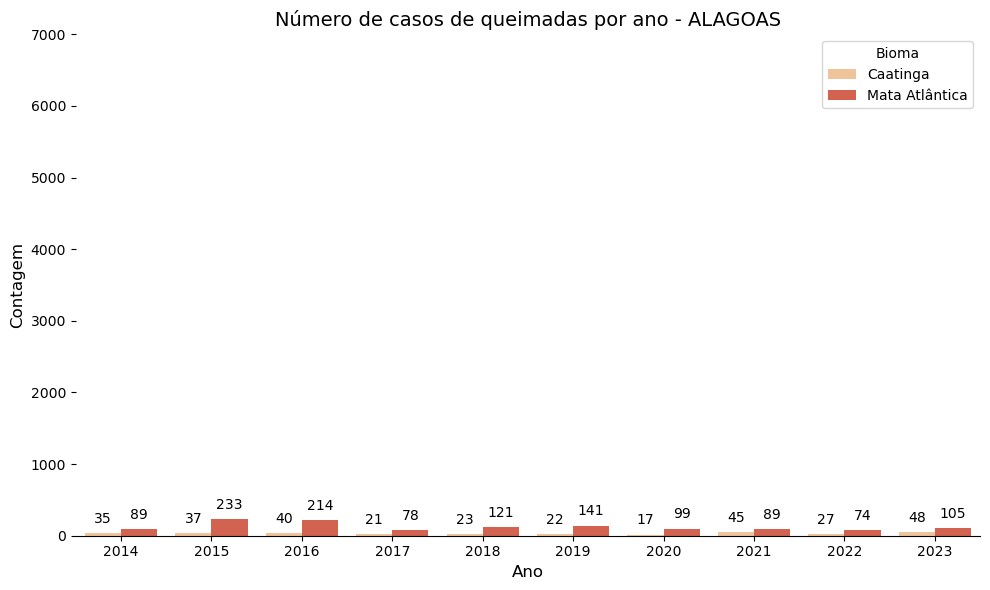

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

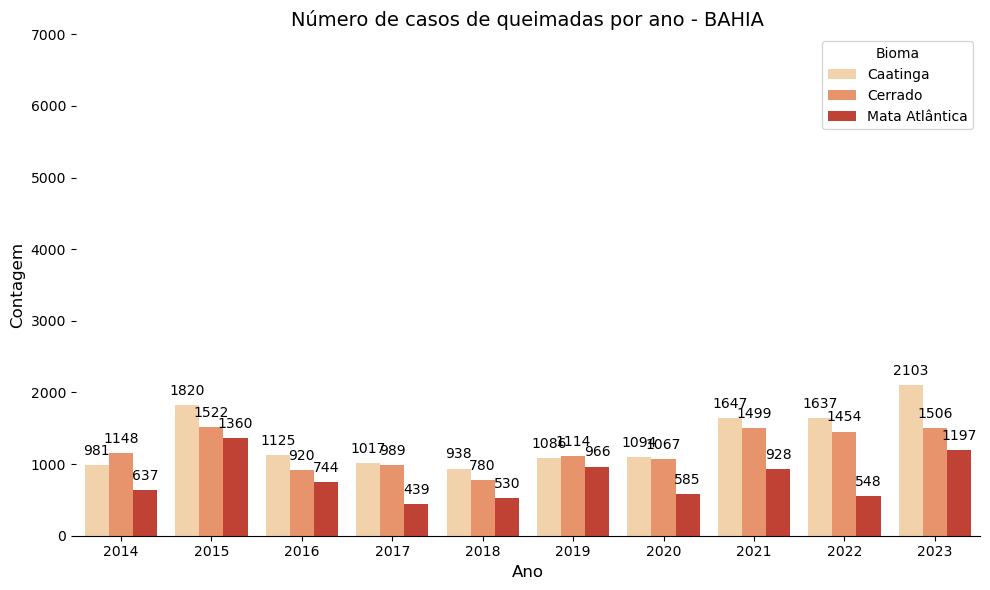

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

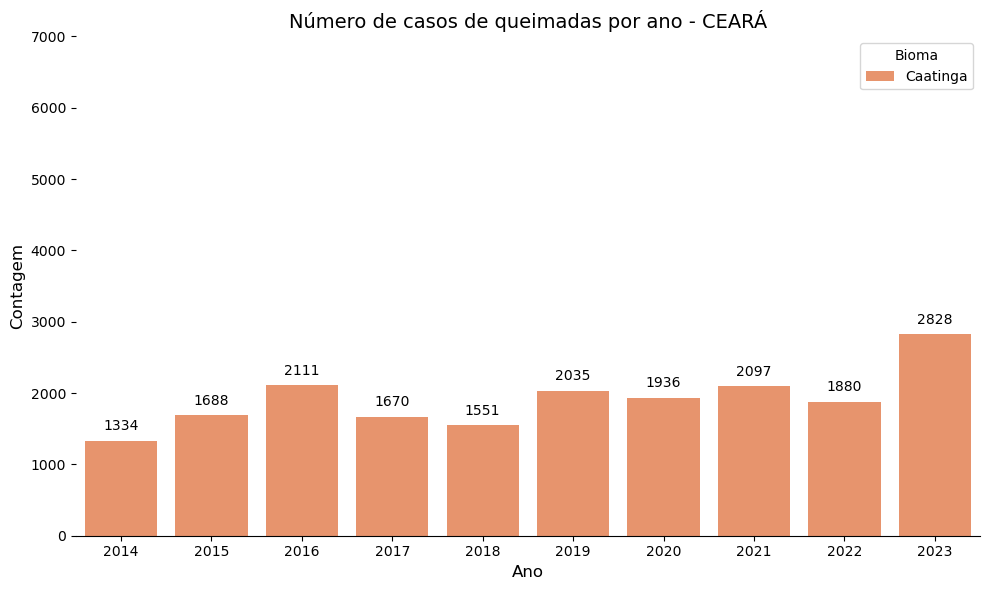

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

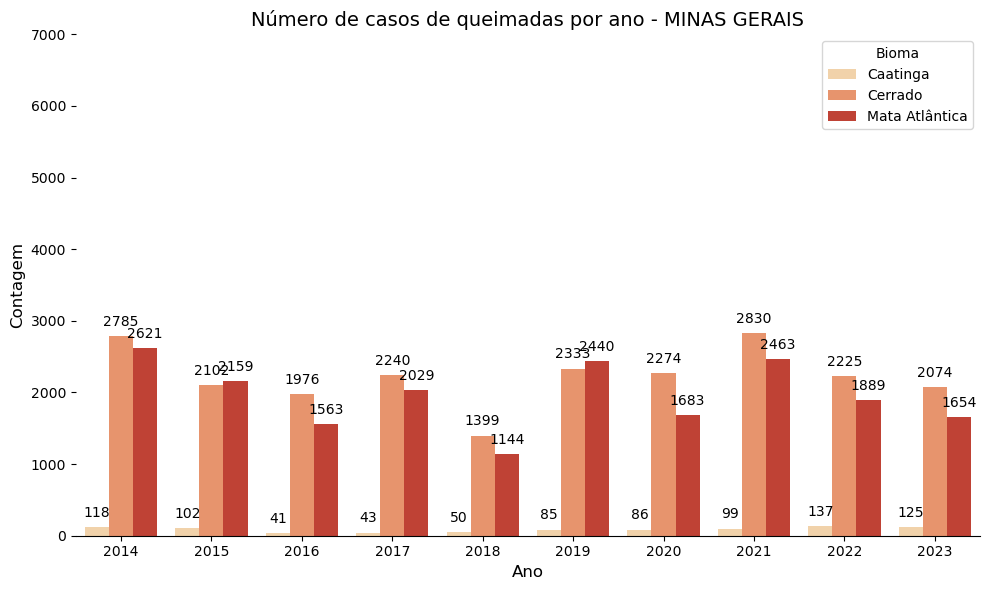

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

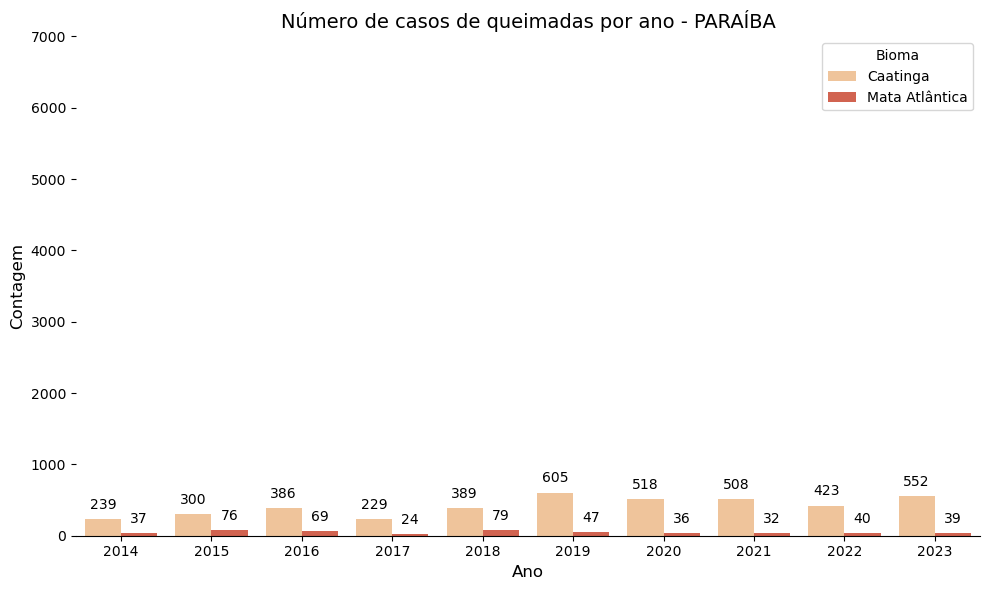

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

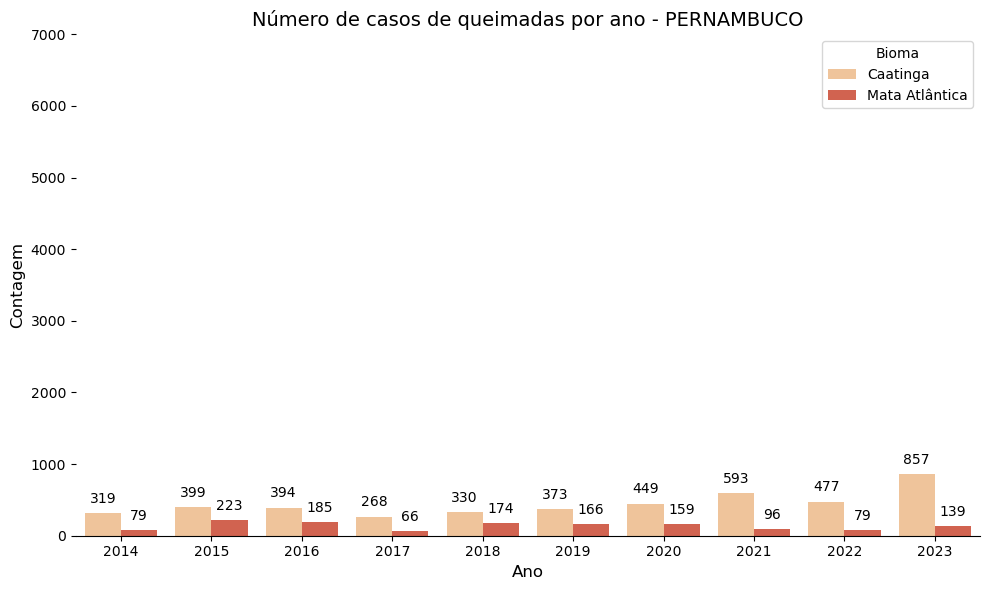

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

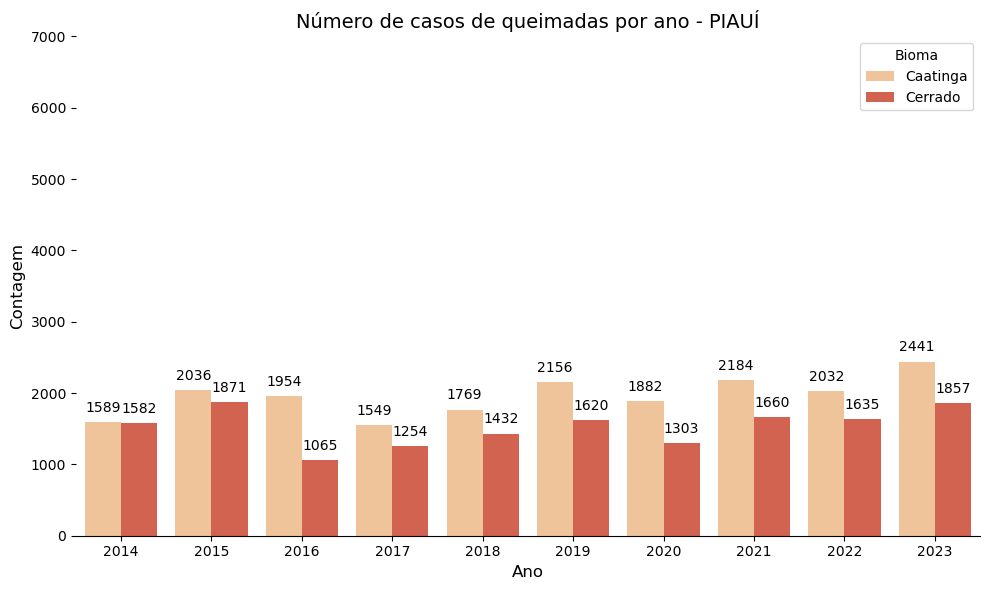

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

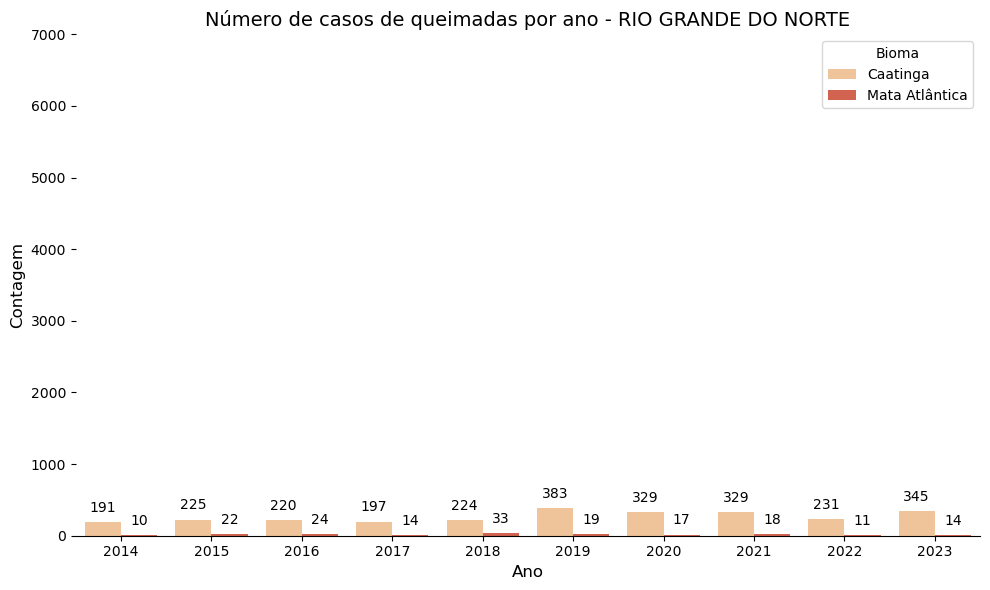

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

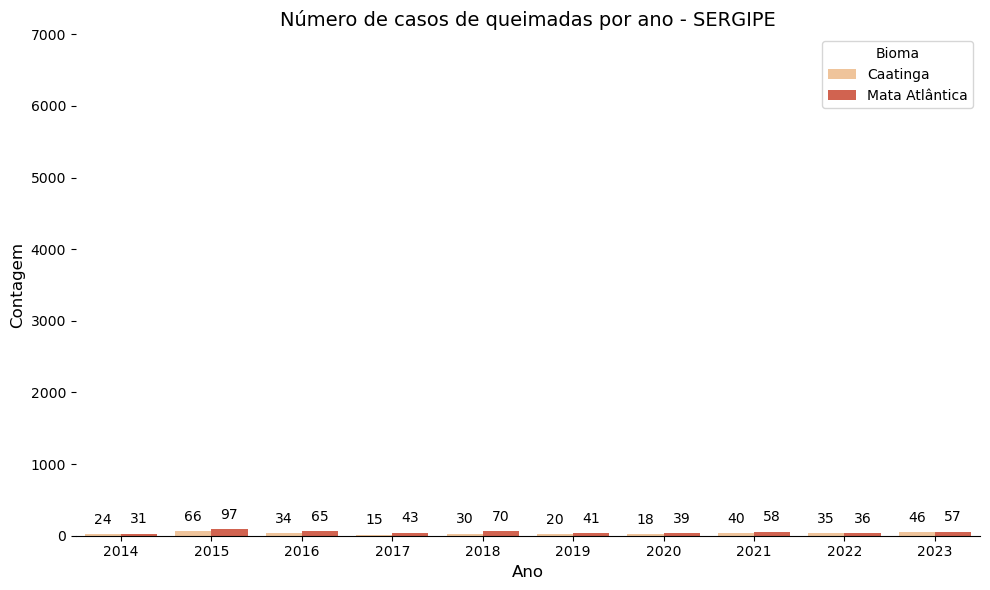

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

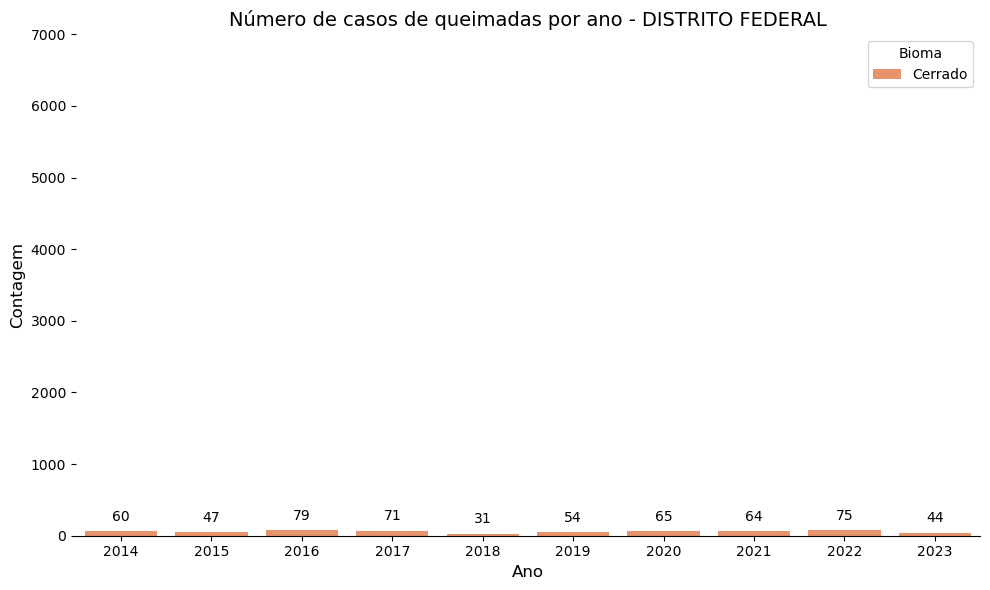

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

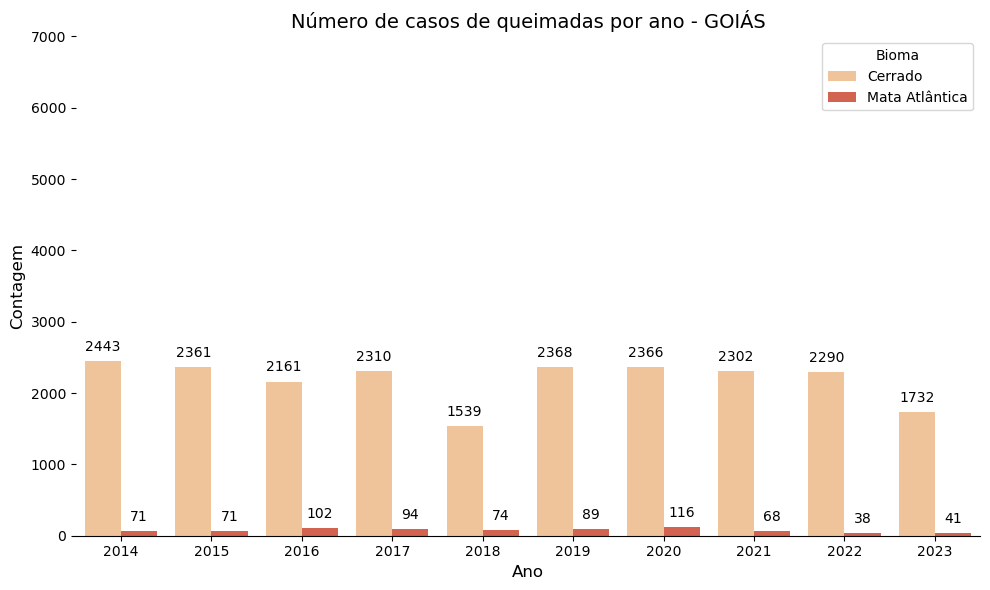

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

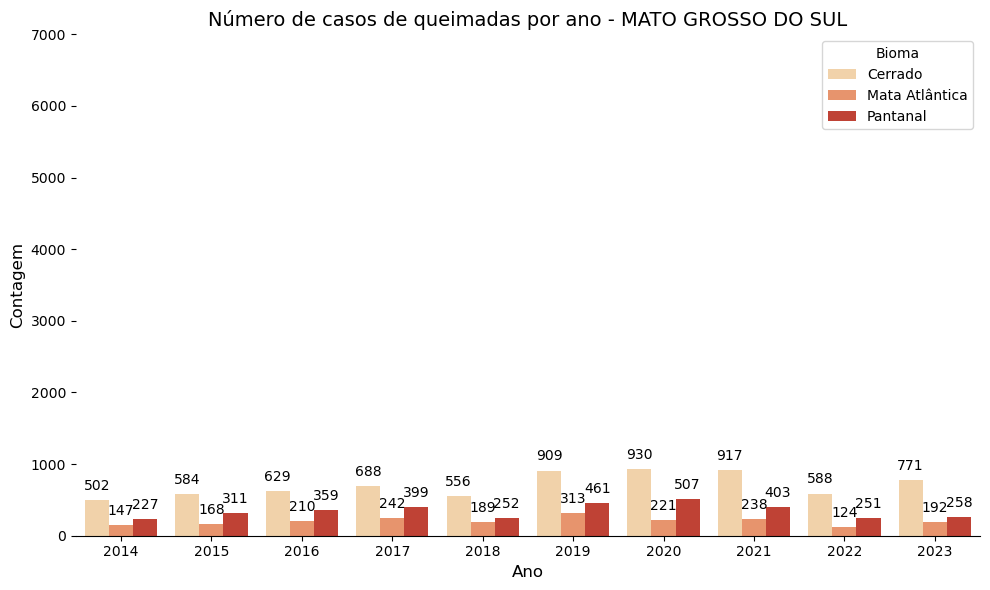

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

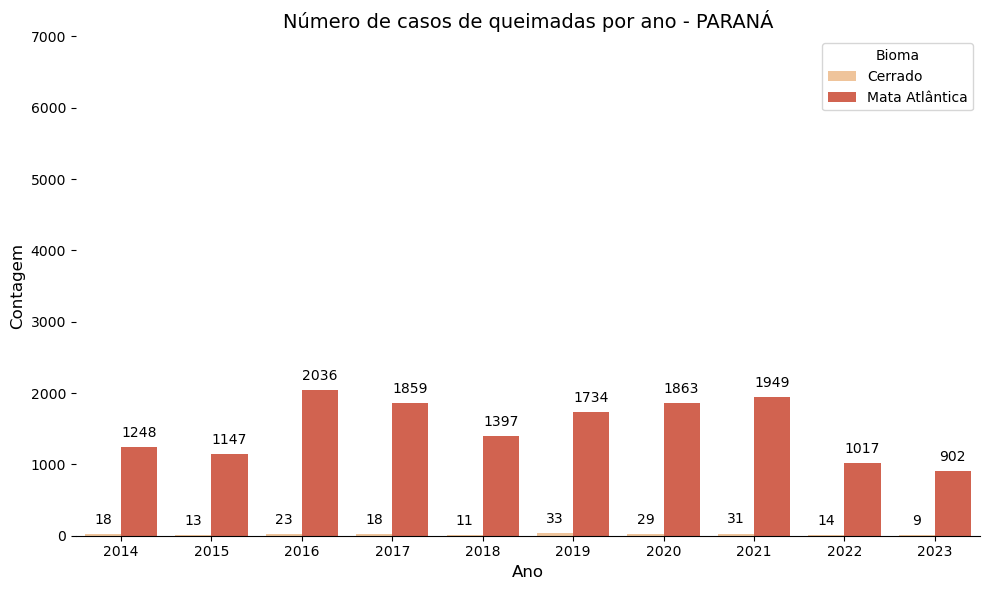

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

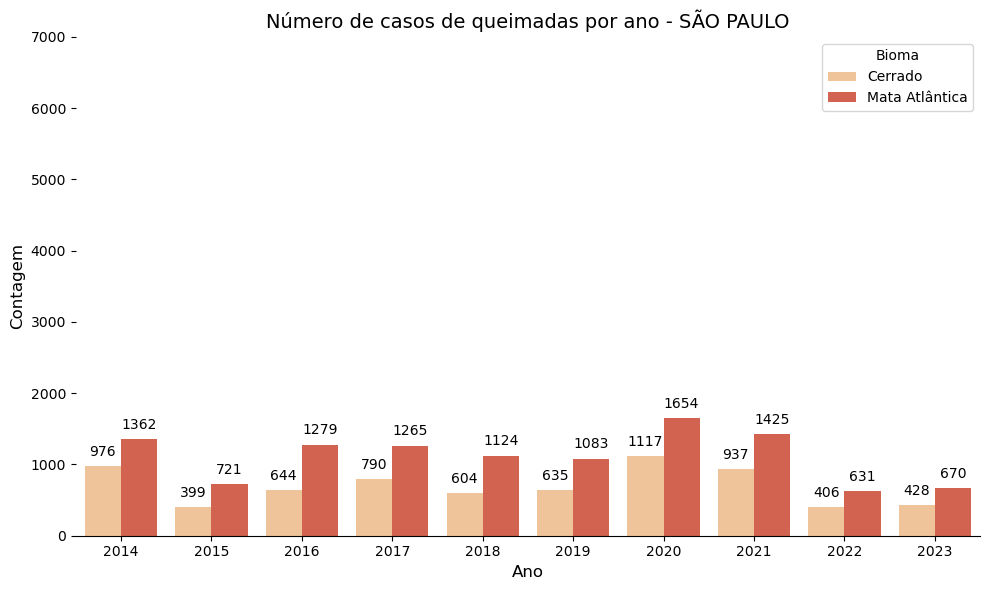

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

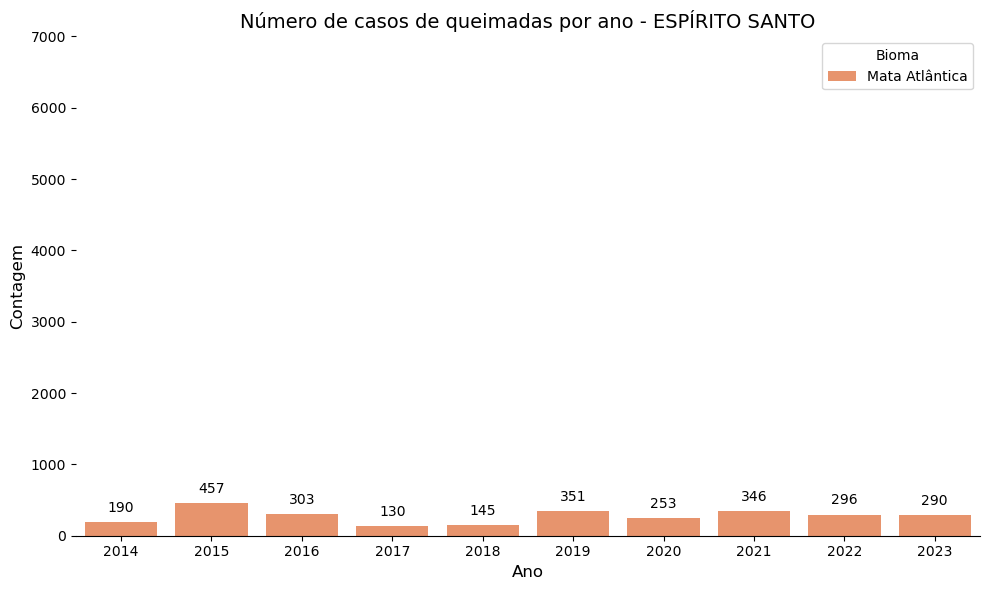

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

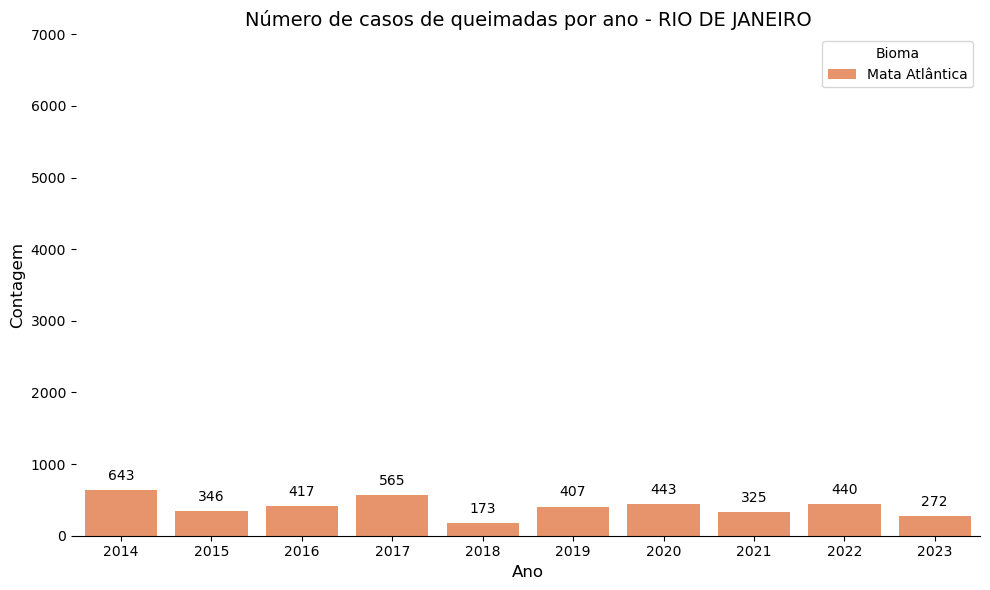

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

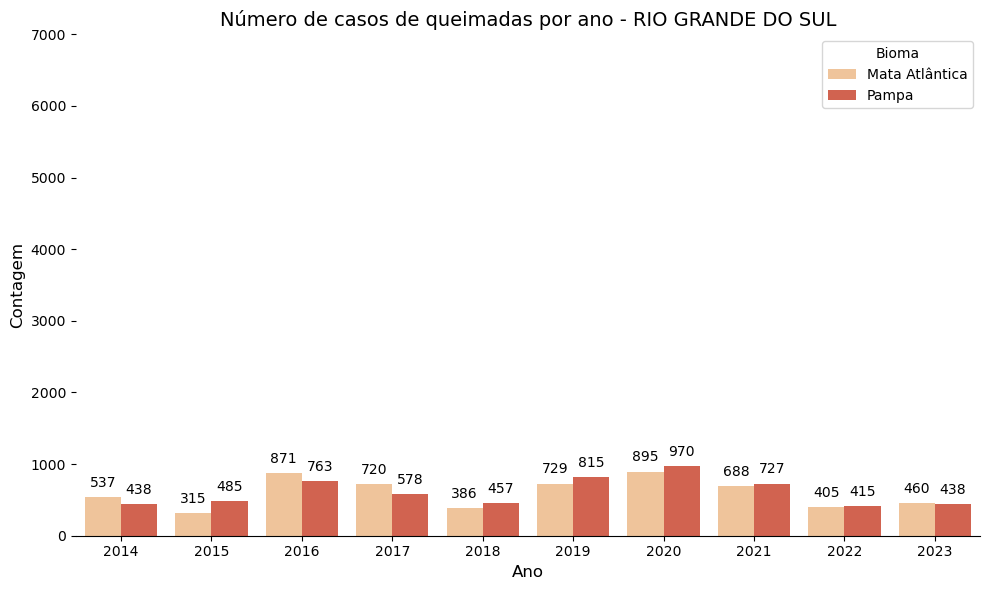

C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\apisa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

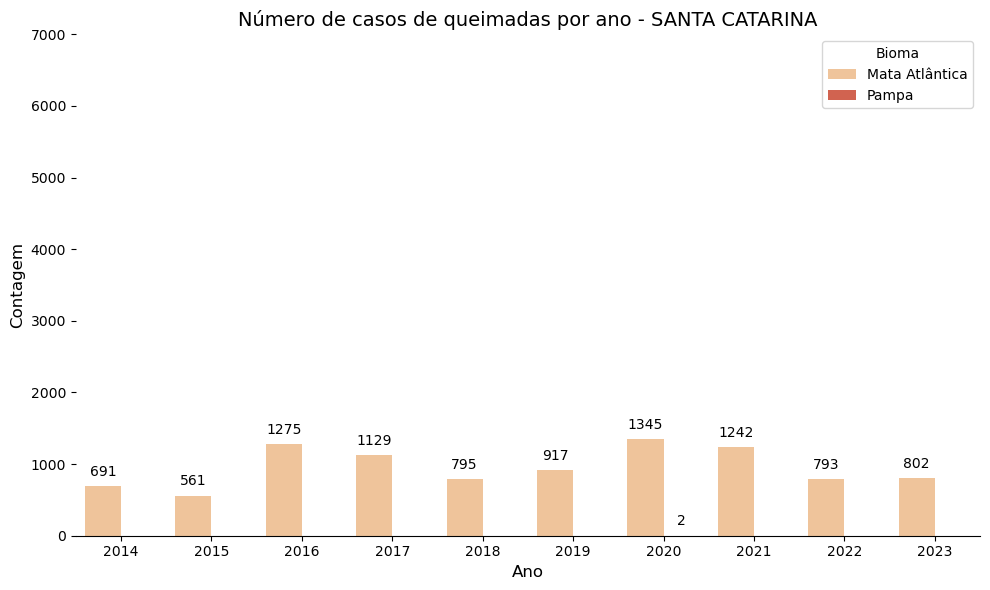

In [34]:
#gráfico de queimadas dos biomas por estado ao longo dos 9 anos

for df_bioma_ano, data in dados.items():
    df = pd.DataFrame(data)
    df['ano'] = df['ano'].astype(str)
    
    #criar o gráfico
    plt.figure(figsize=(10,6))
    plot = sns.barplot(data=df, x='ano', y='count', hue='bioma', 
                       palette='OrRd')
    
    #adicionar os rótulos de valores nas barras
    for i in plot.patches:
        height = i.get_height()
        if height > 0:
            x = i.get_x() + i.get_width() / 2
            y = height + 100
            value_label = f'{int(height)}'
            plot.annotate(value_label, (x,y), ha='center', va='bottom', fontsize=10, color='black')

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(False)
    ax.set_ylim(0,7000)

    plt.title(f'Número de casos de queimadas por ano - {df_bioma_ano}', fontsize=14)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Contagem', fontsize=12)
    plt.legend(title='Bioma')
    plt.tight_layout()

    plt.savefig(f'Queimadas_{df_bioma_ano.lower().replace(" ", "_")}.png', format='png', dpi=300)

    plt.show()

In [55]:
#ocorrências de casos por município em cada ano
df_ocorr = arquivo.groupby(['estado','municipio','ano'])[['municipio']].count().rename(columns={'municipio':'count'})
df_ocorr.head()

count
estado municipio  ano        
ACRE   ACRELÂNDIA 2014     31
                  2015     42
                  2016     41
                  2017     36
                  2018     34

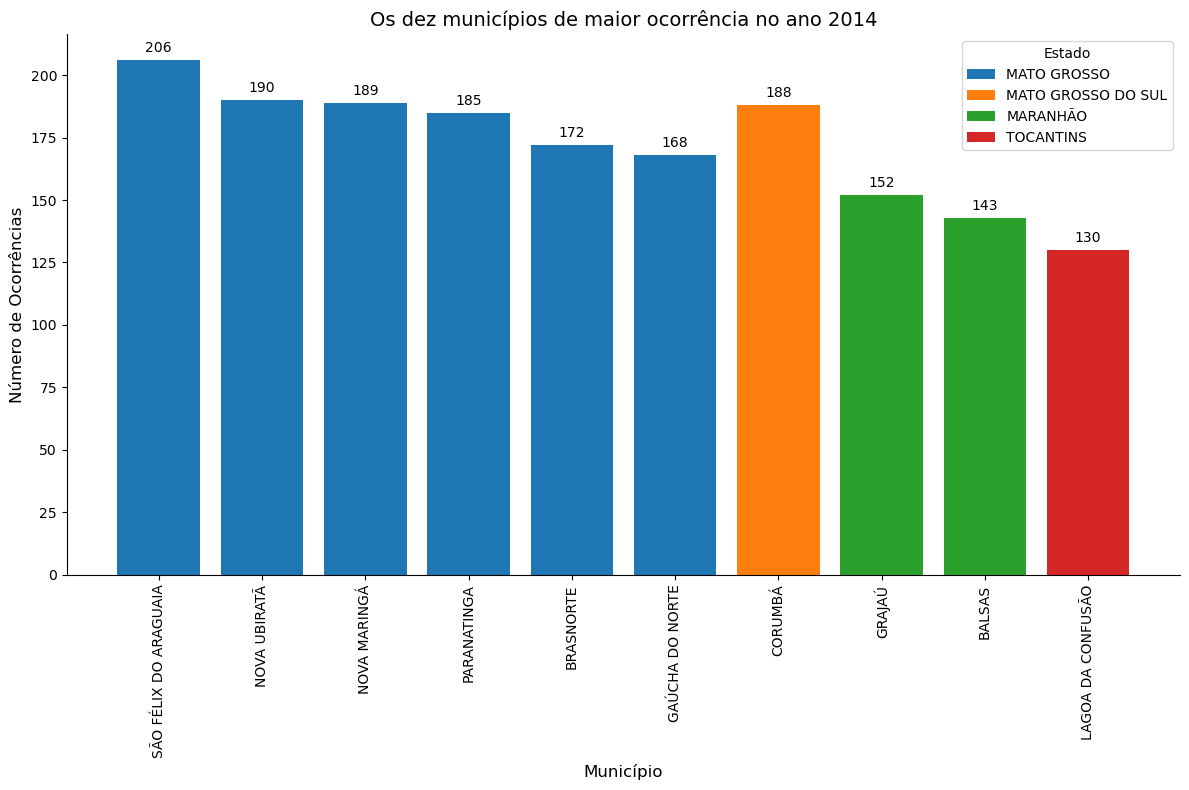

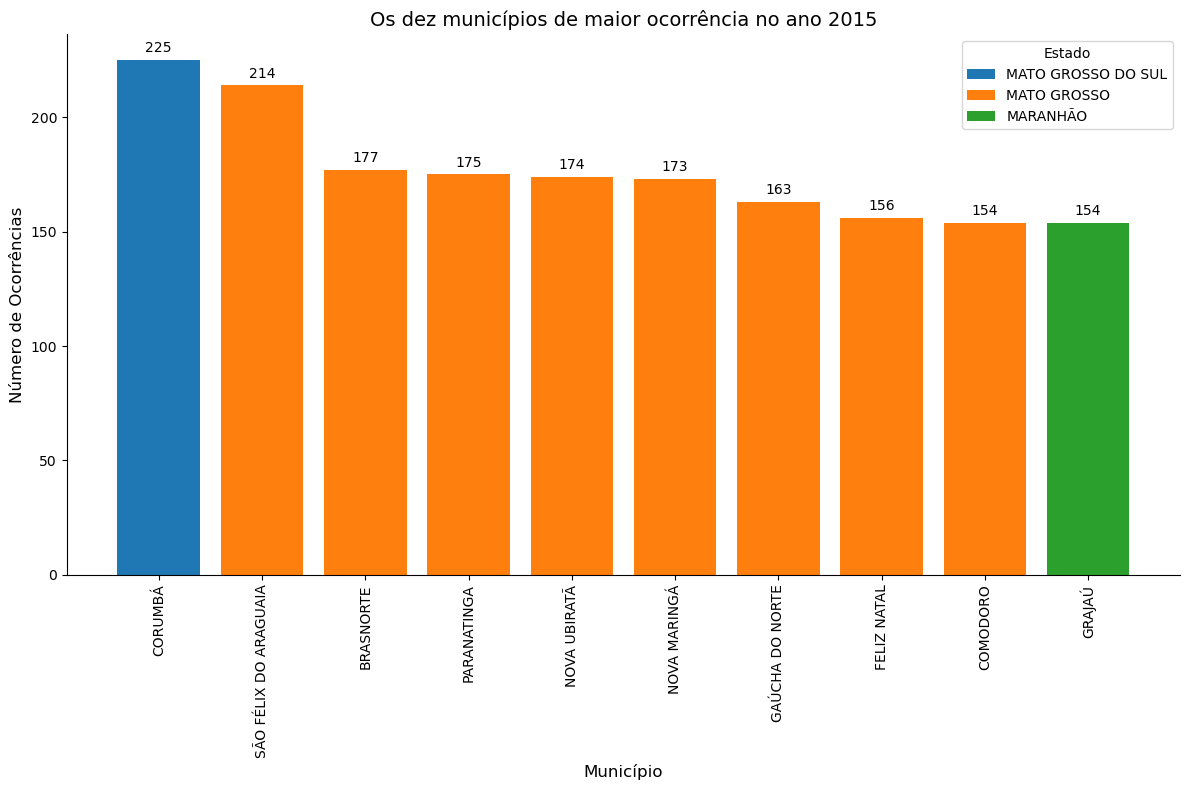

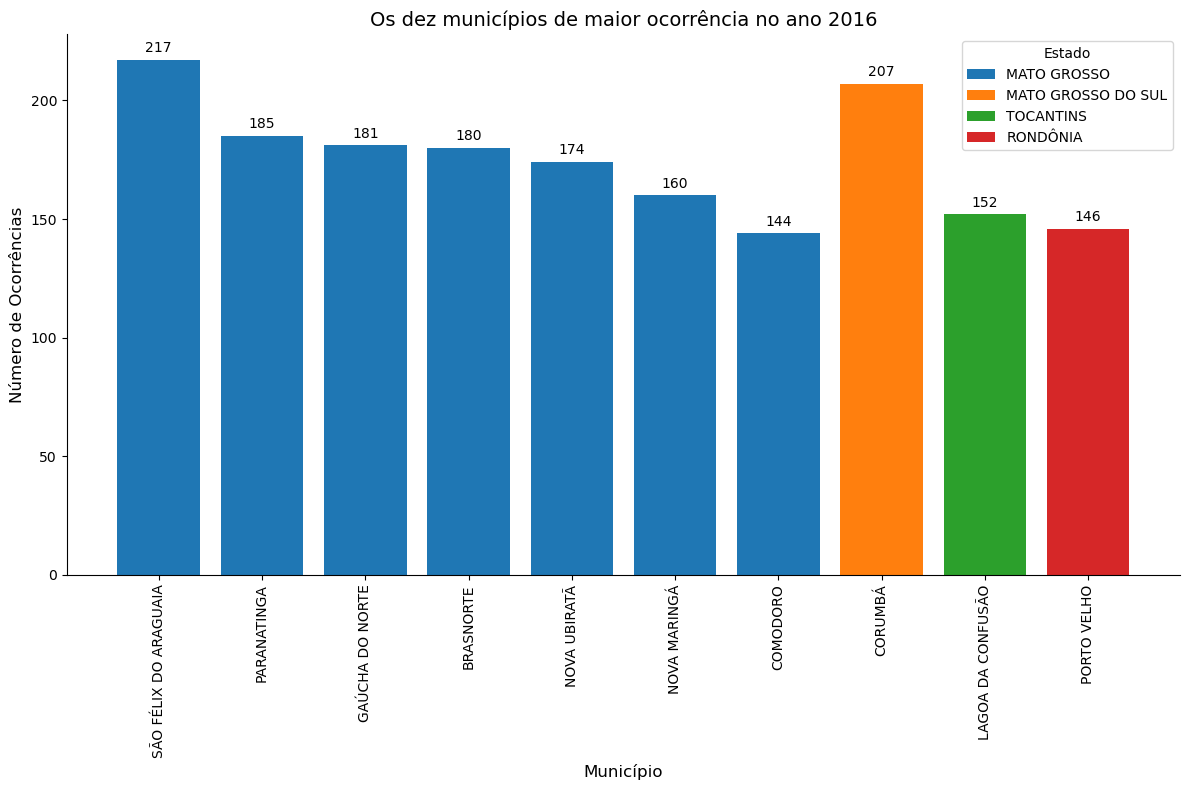

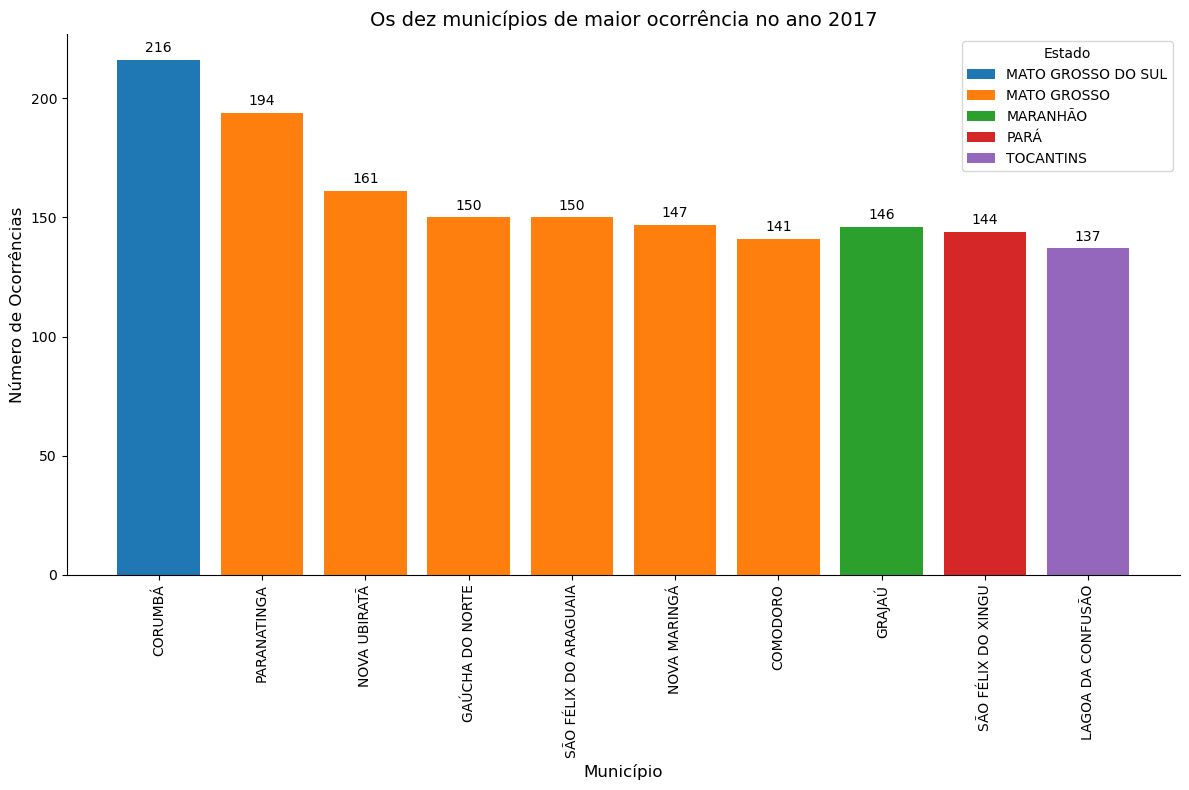

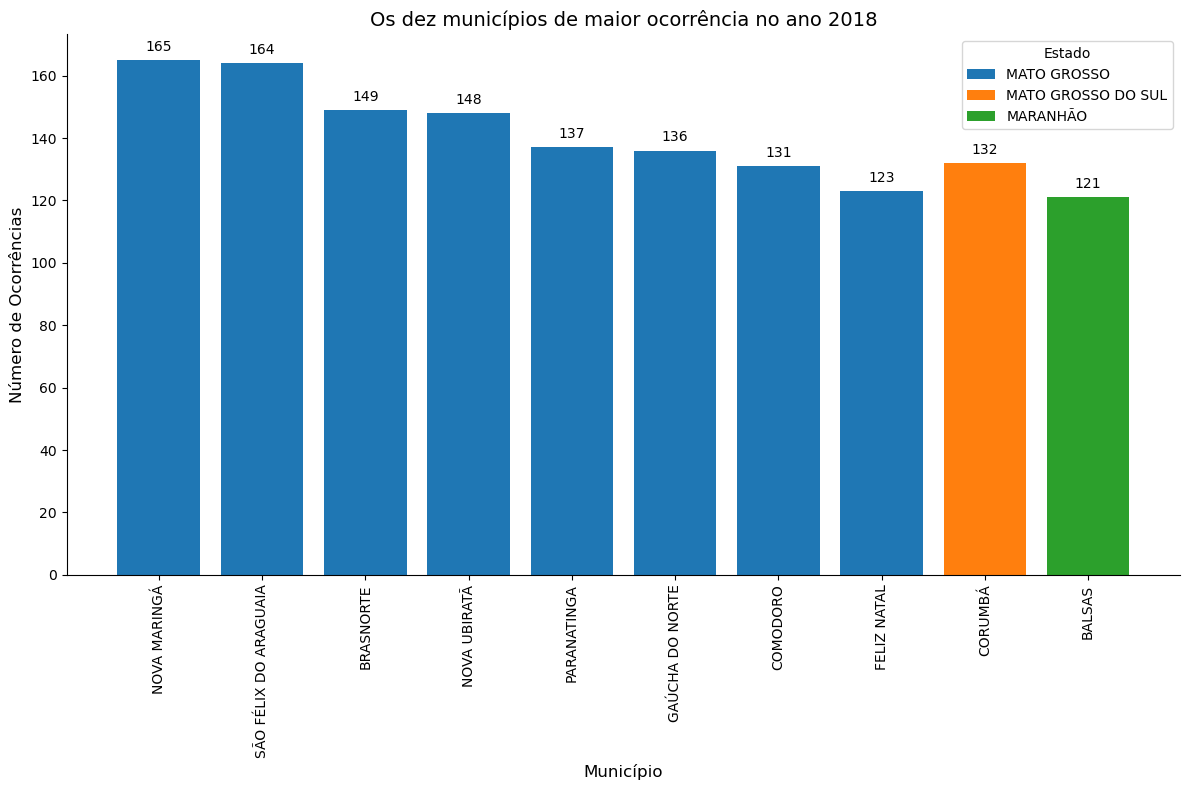

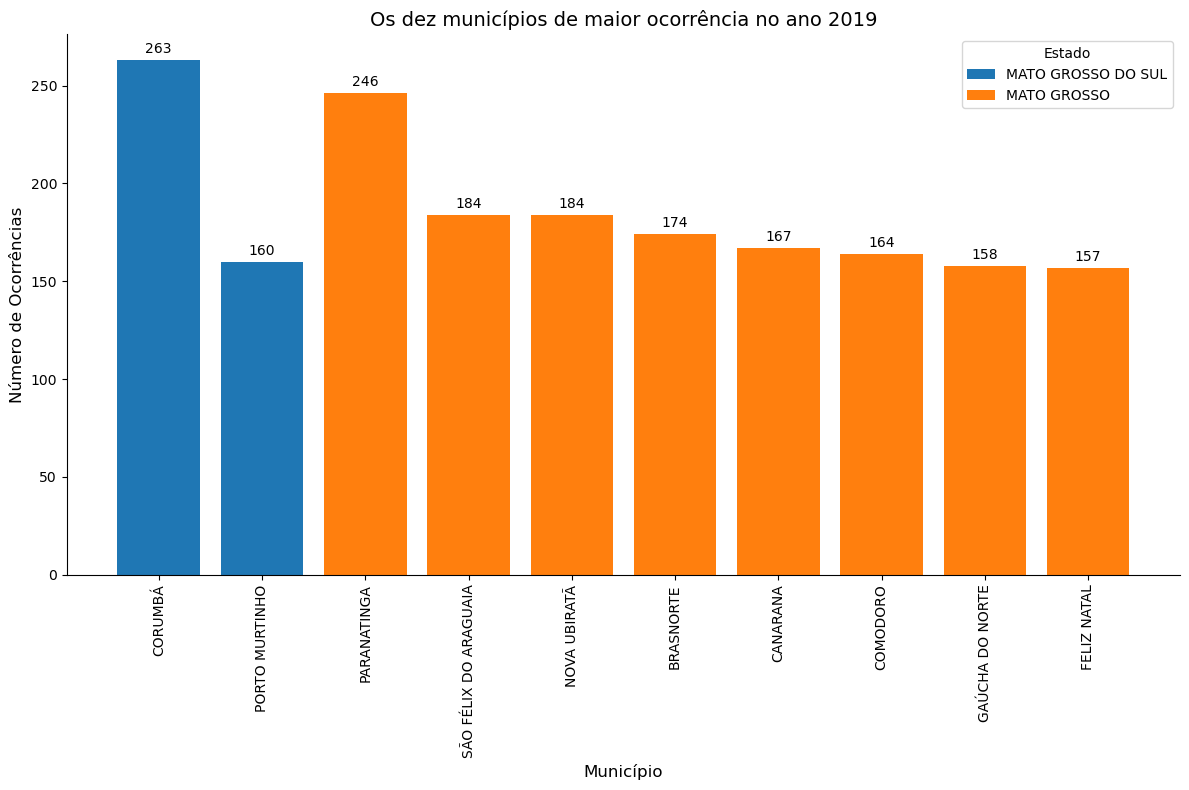

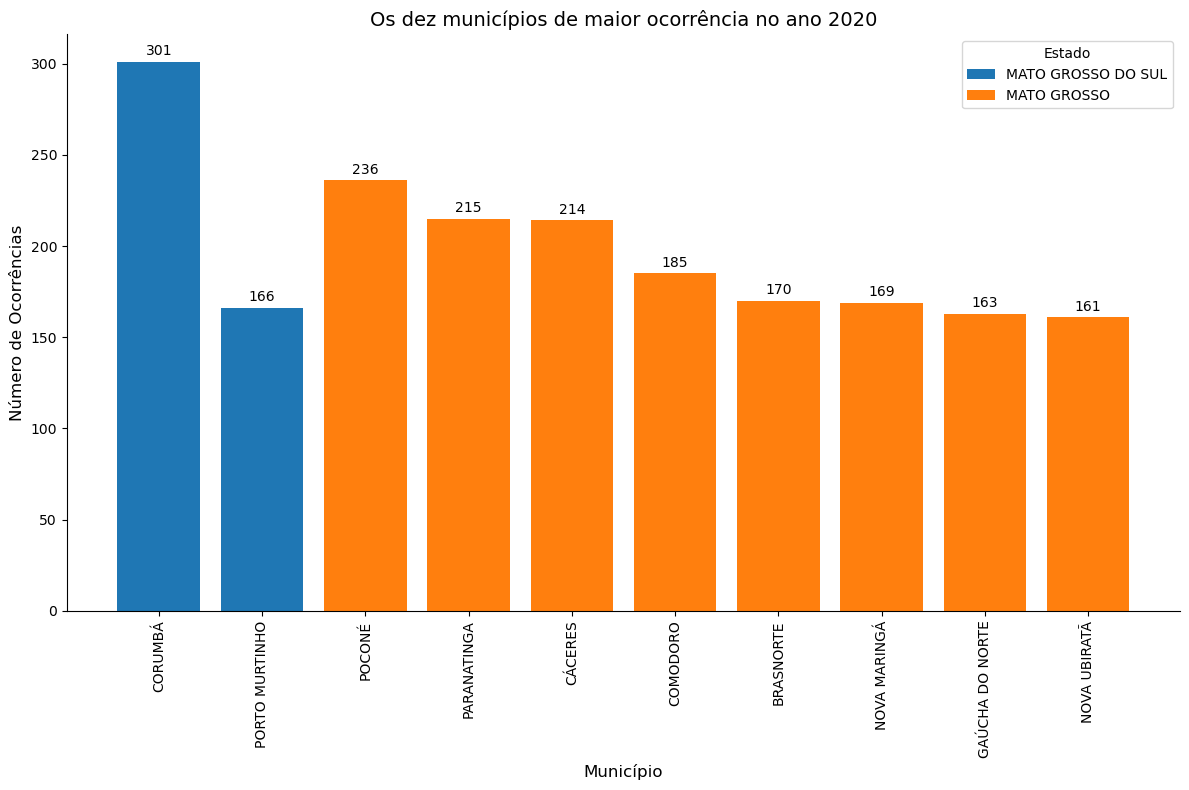

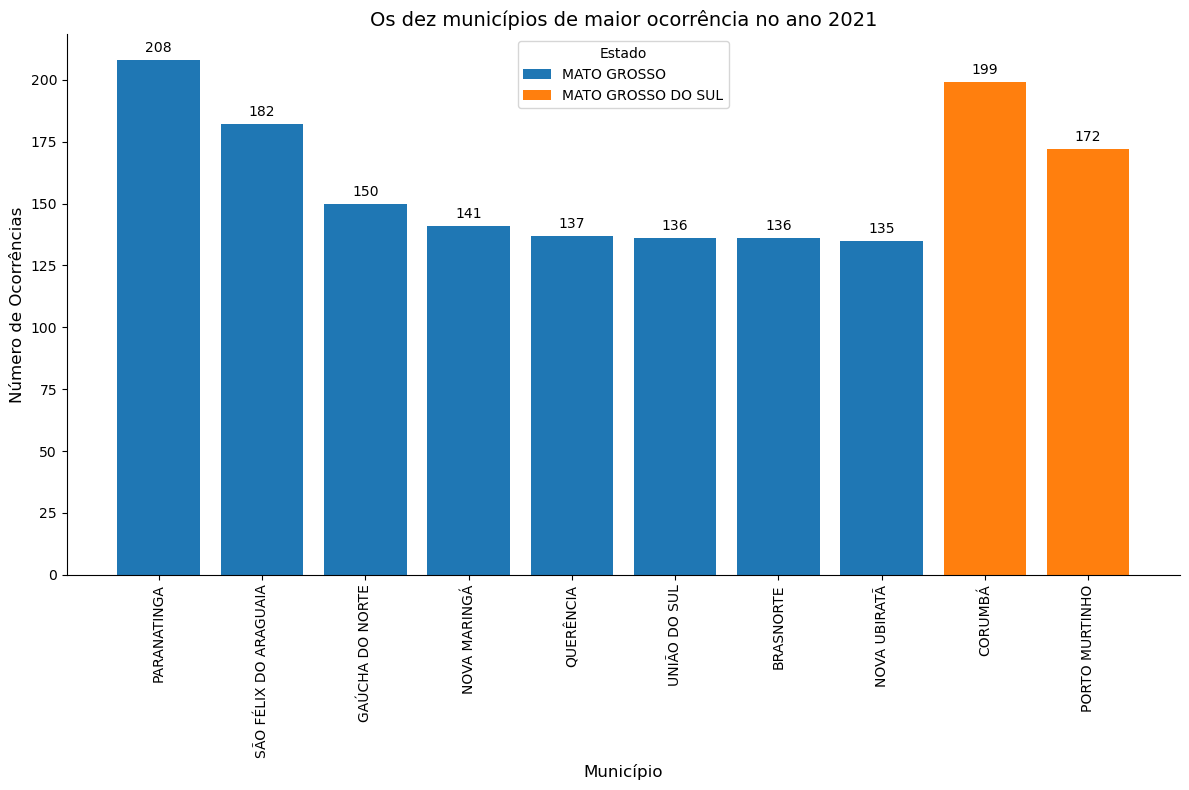

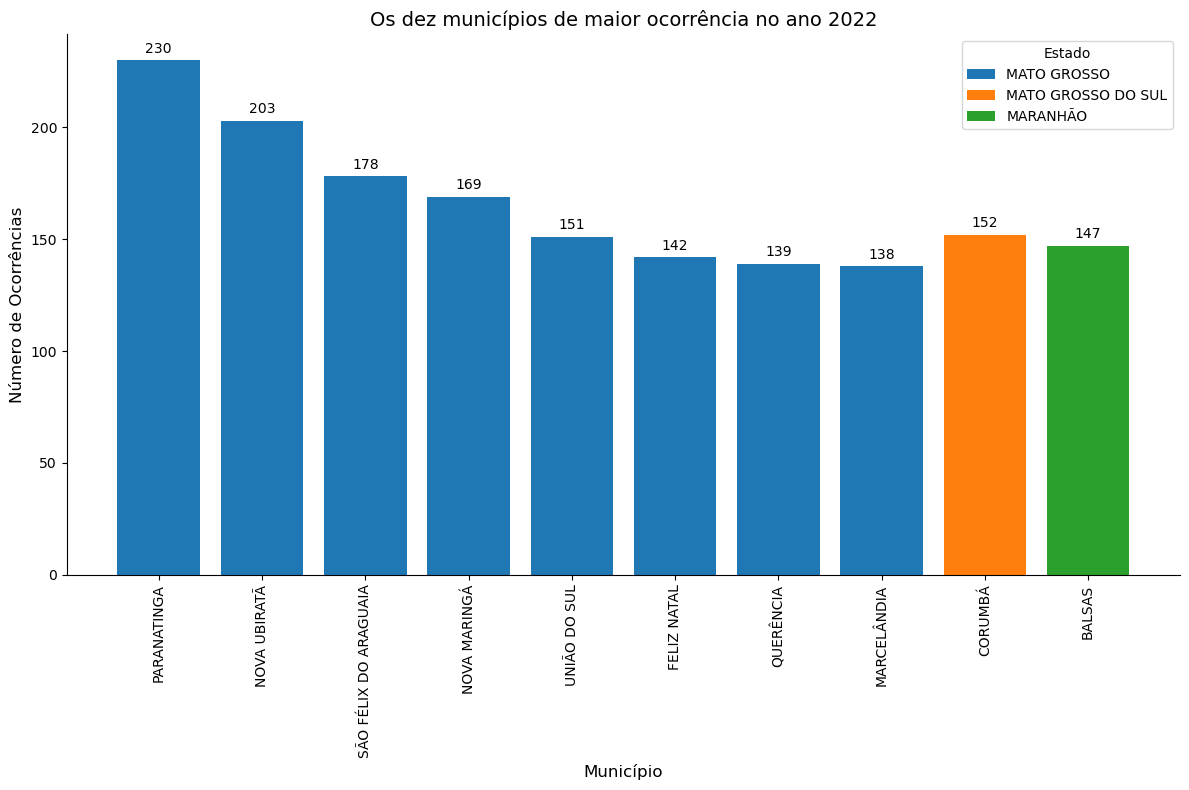

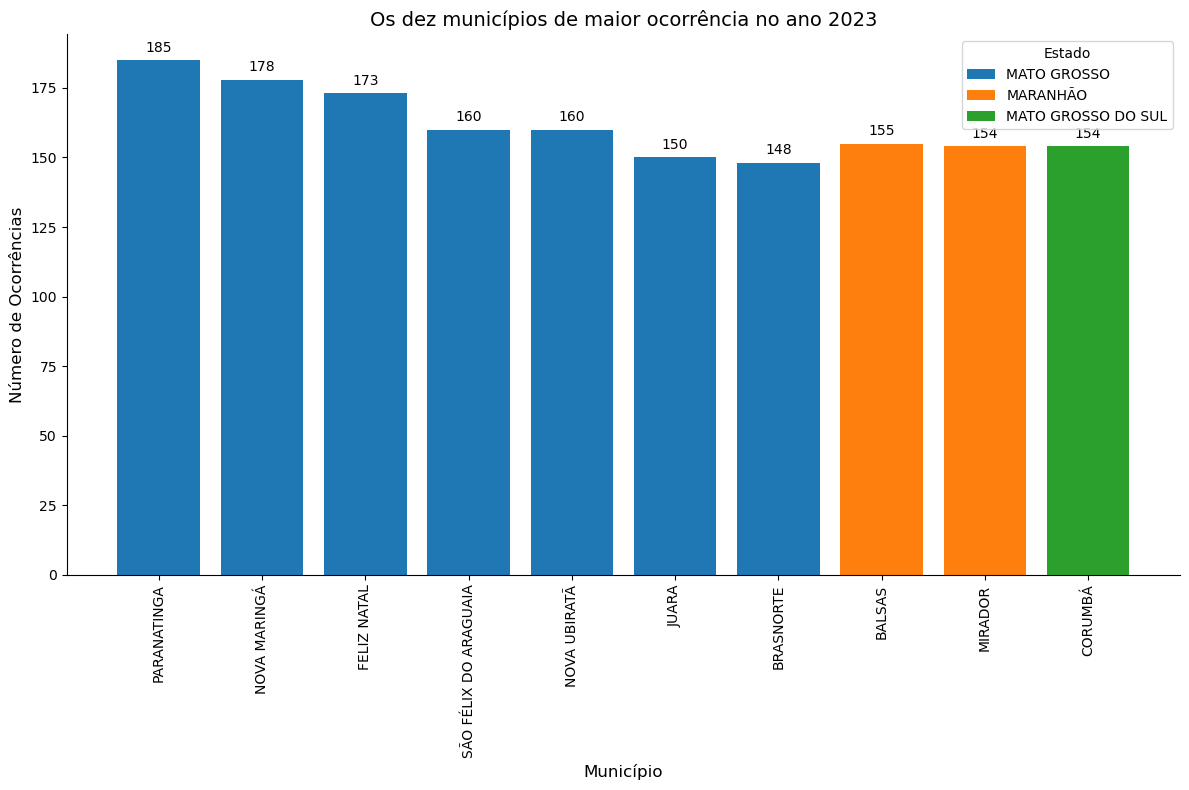

In [56]:
#gráfico dos dez municípios de maior ocorrência por ano ao longo dos 9 anos

anos = df_ocorr.index.get_level_values('ano').unique()

for ano in anos:
    df_ano = df_ocorr[df_ocorr.index.get_level_values('ano') == ano]
    df_ano = df_ano.reset_index()
    #para ordernar os municípios de maior ocorrência 1º
    df_ano_sorted = df_ano.sort_values(by='count', ascending=False)
    df_ano_max = df_ano_sorted.head(10)
    plt.figure(figsize=(12,8))
    
    #criar gráfico
    for estado in df_ano_max['estado'].unique():
        df_estado = df_ano_max[df_ano_max['estado'] == estado]
        bars = plt.bar(df_estado['municipio'], df_estado['count'],
                      label=estado)
        #adicionar os rótulos de valores das barras
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width() / 2, 
                     bar.get_height() + 2, int(bar.get_height()),
                     ha='center', va='bottom')
            
    plt.title(f'Os dez municípios de maior ocorrência no ano {ano}', fontsize=14)
    plt.xlabel('Município', fontsize=12)
    plt.ylabel('Número de Ocorrências', fontsize=12)
    plt.xticks(rotation=90) 
    
    plt.legend(title='Estado')

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(False)

    plt.tight_layout()

    plt.savefig(f'Ocorrencias_municipio_{ano}.png', format='png', dpi=300)
    plt.show()

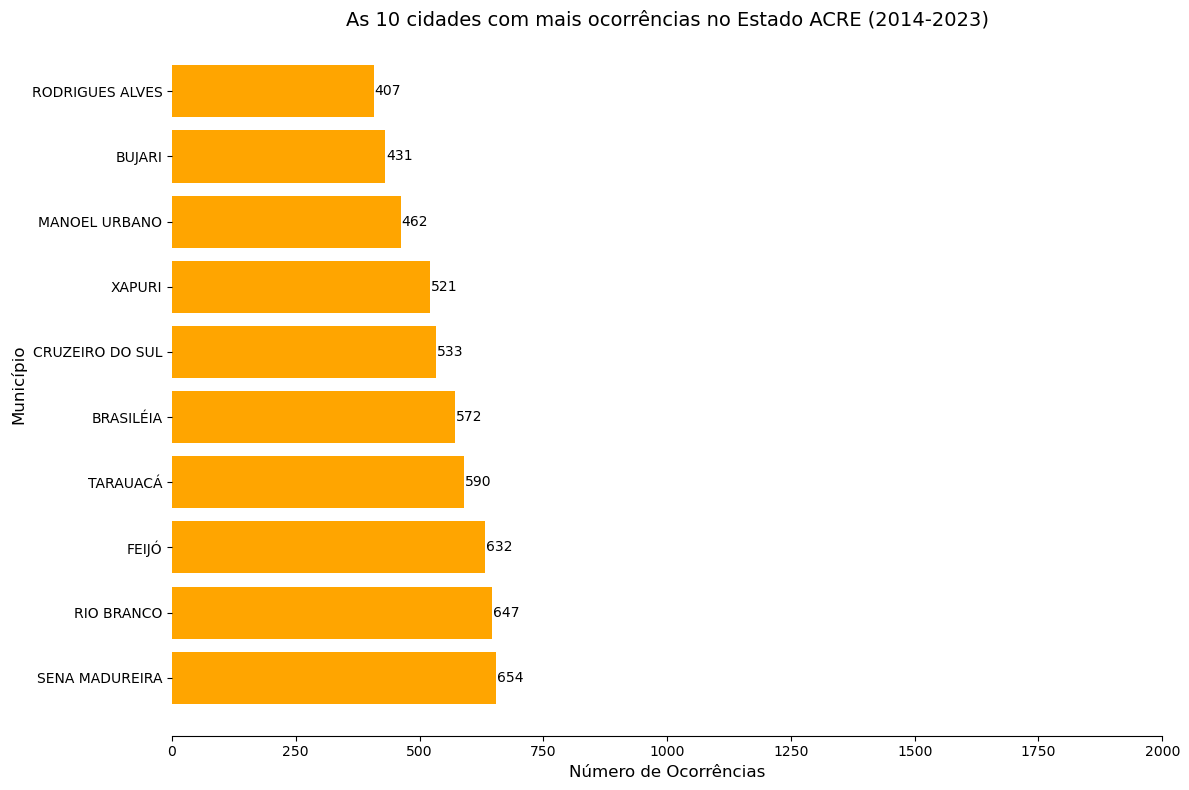

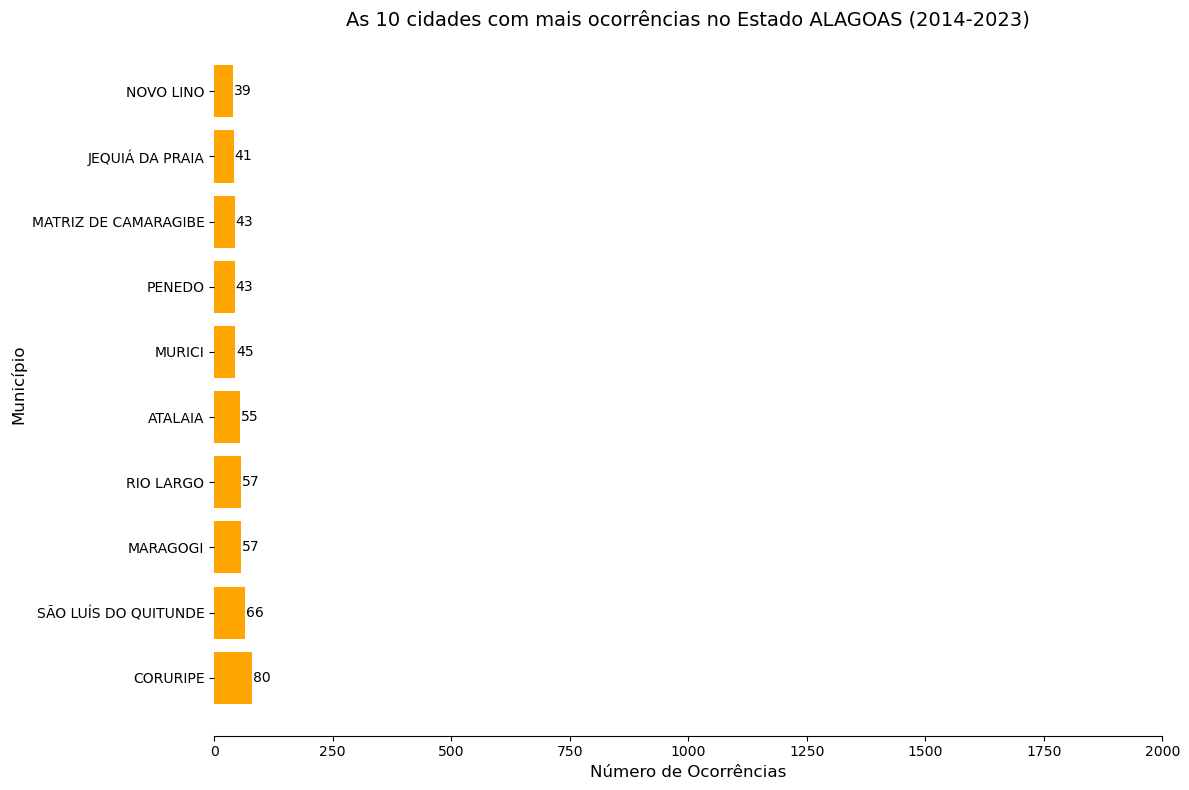

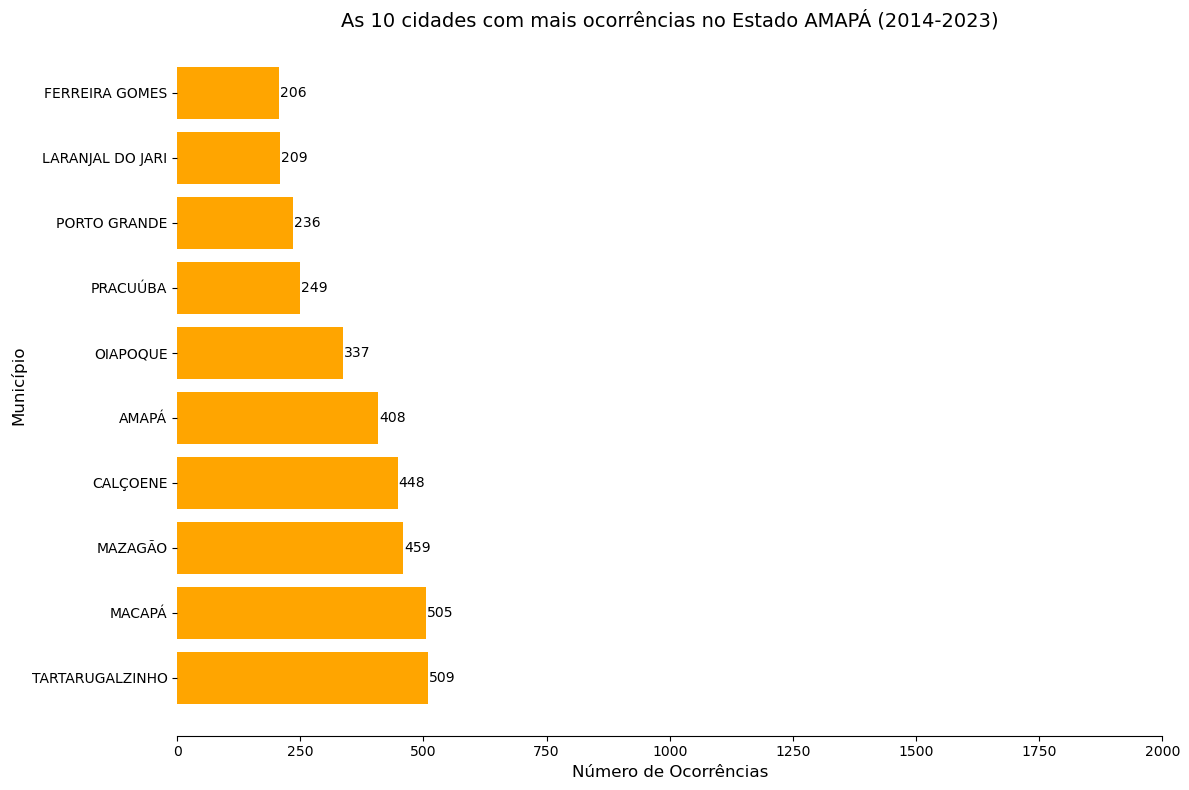

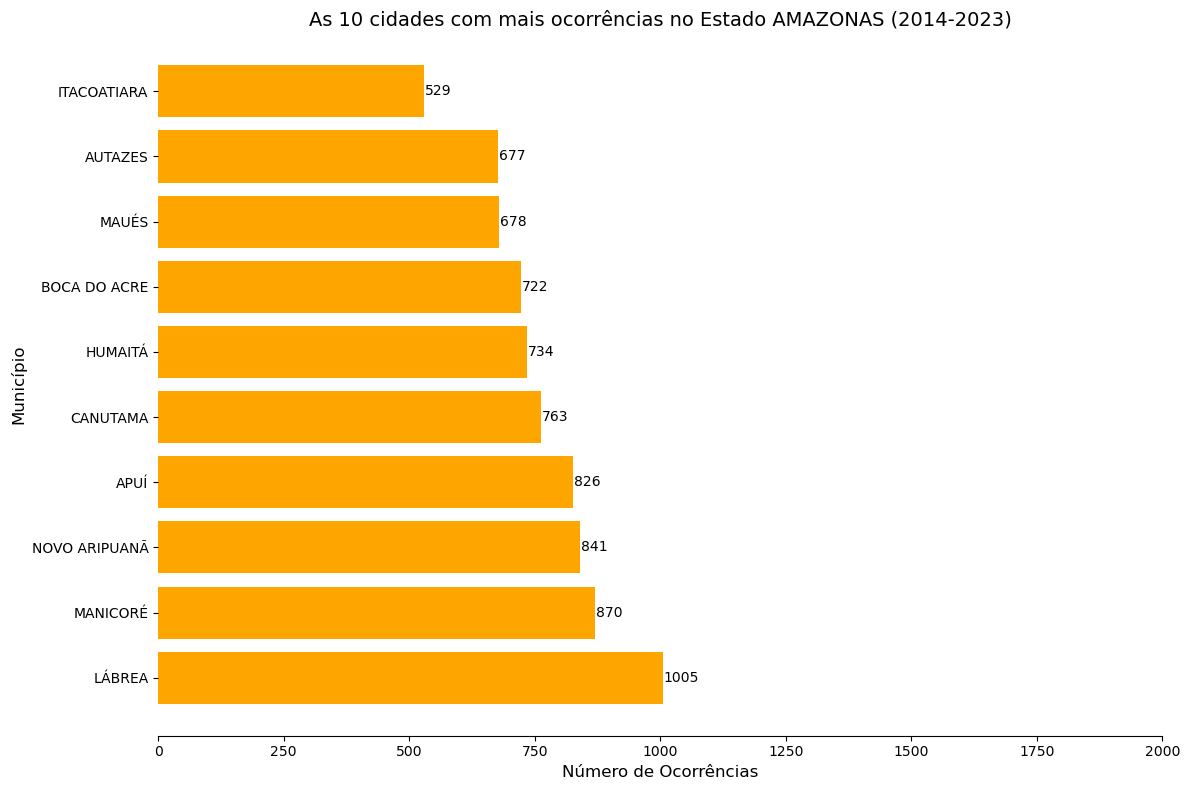

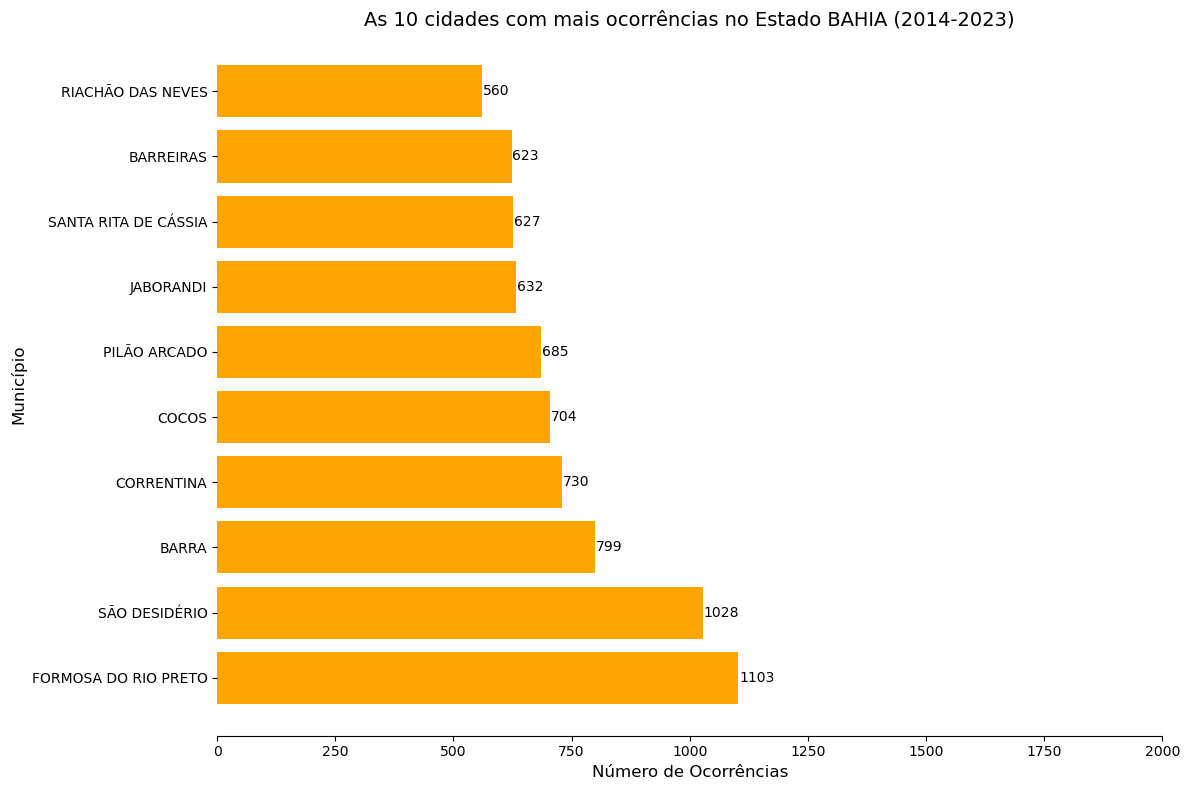

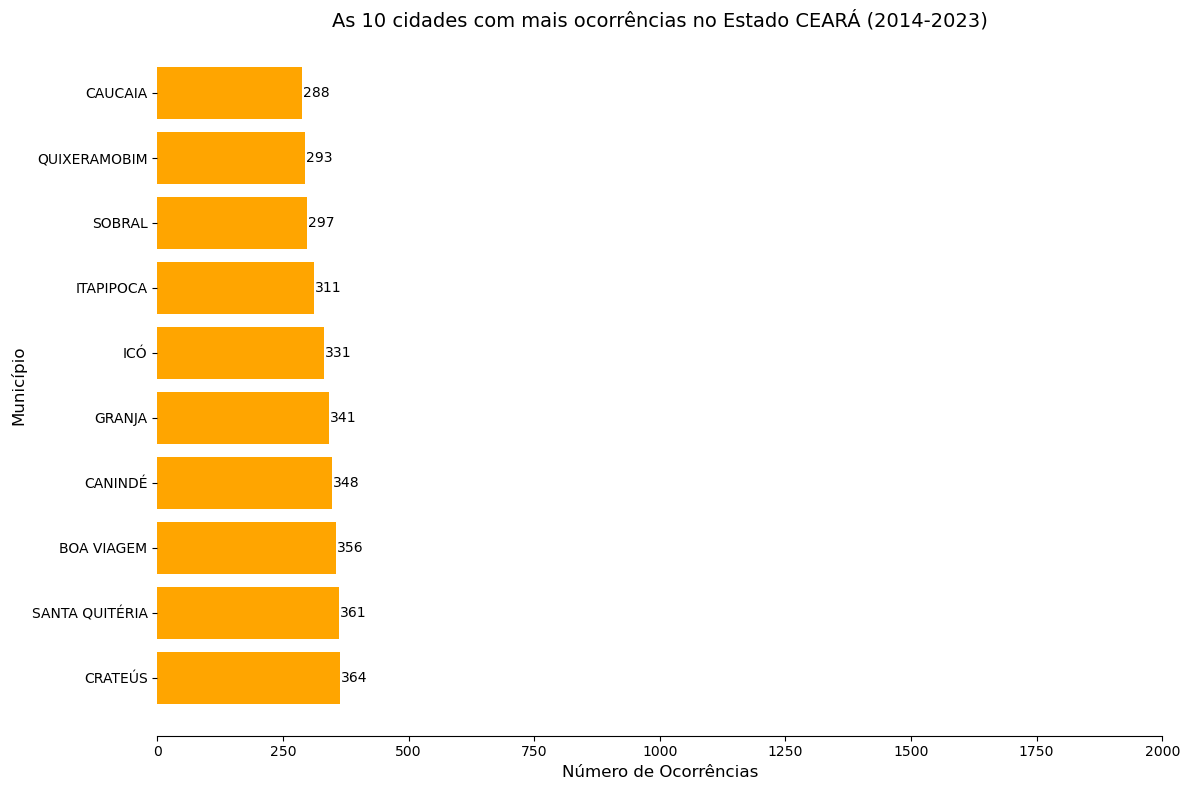

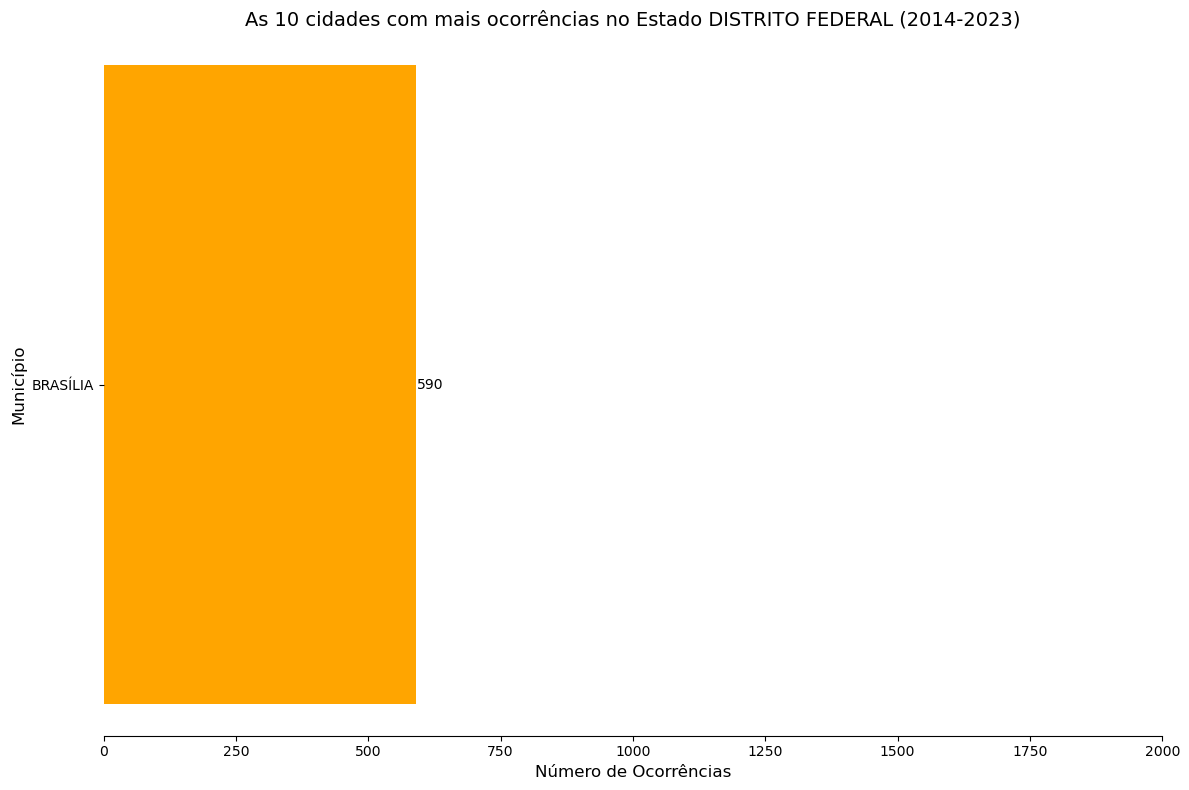

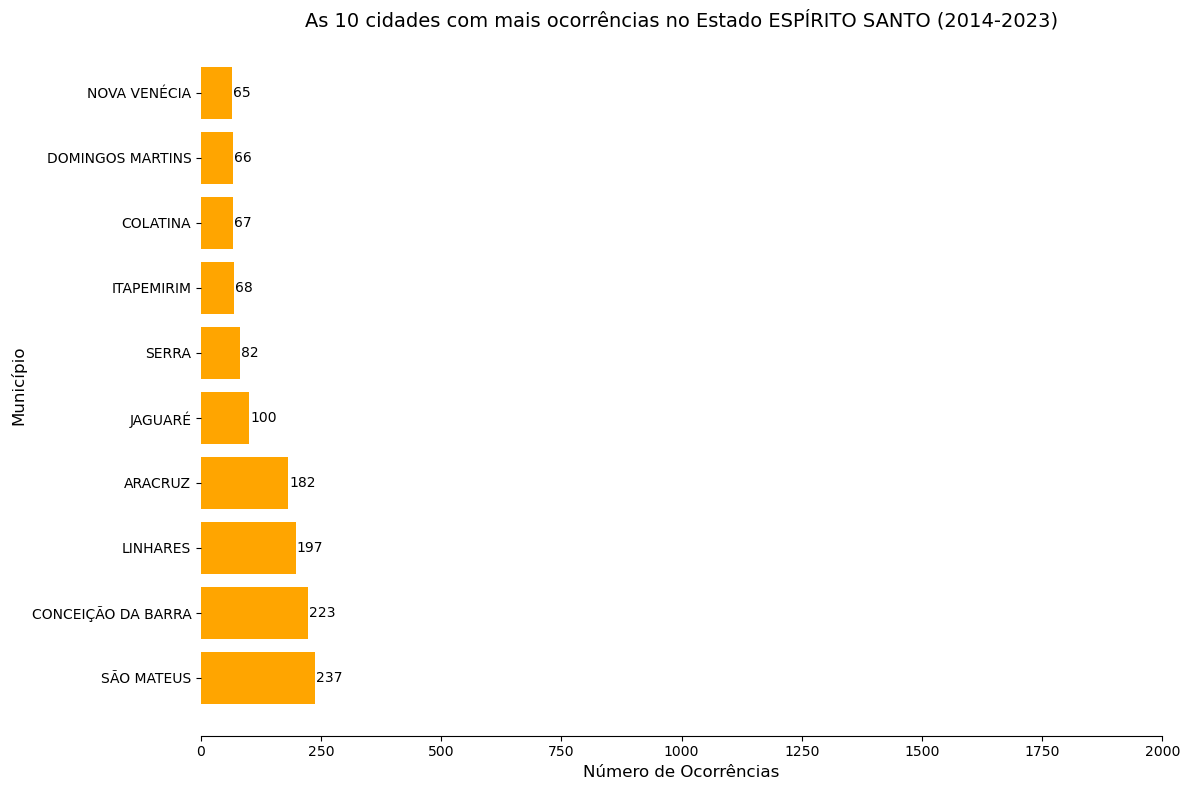

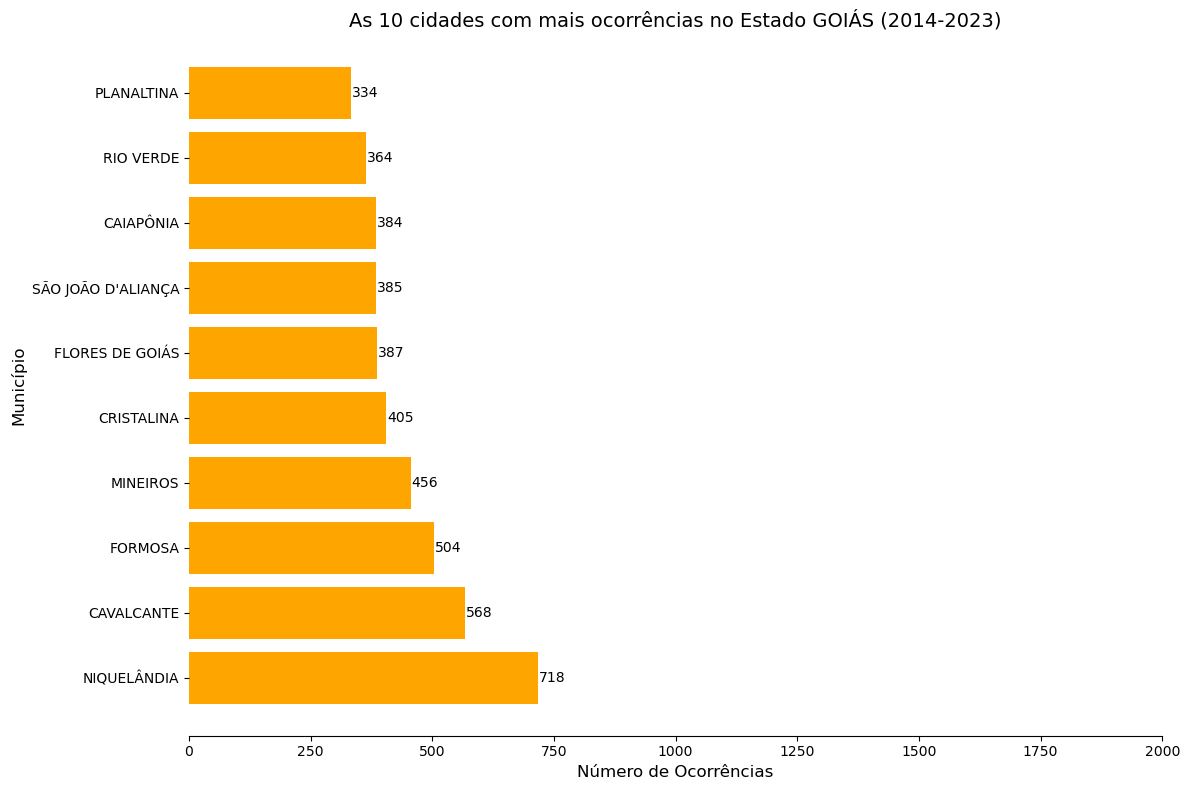

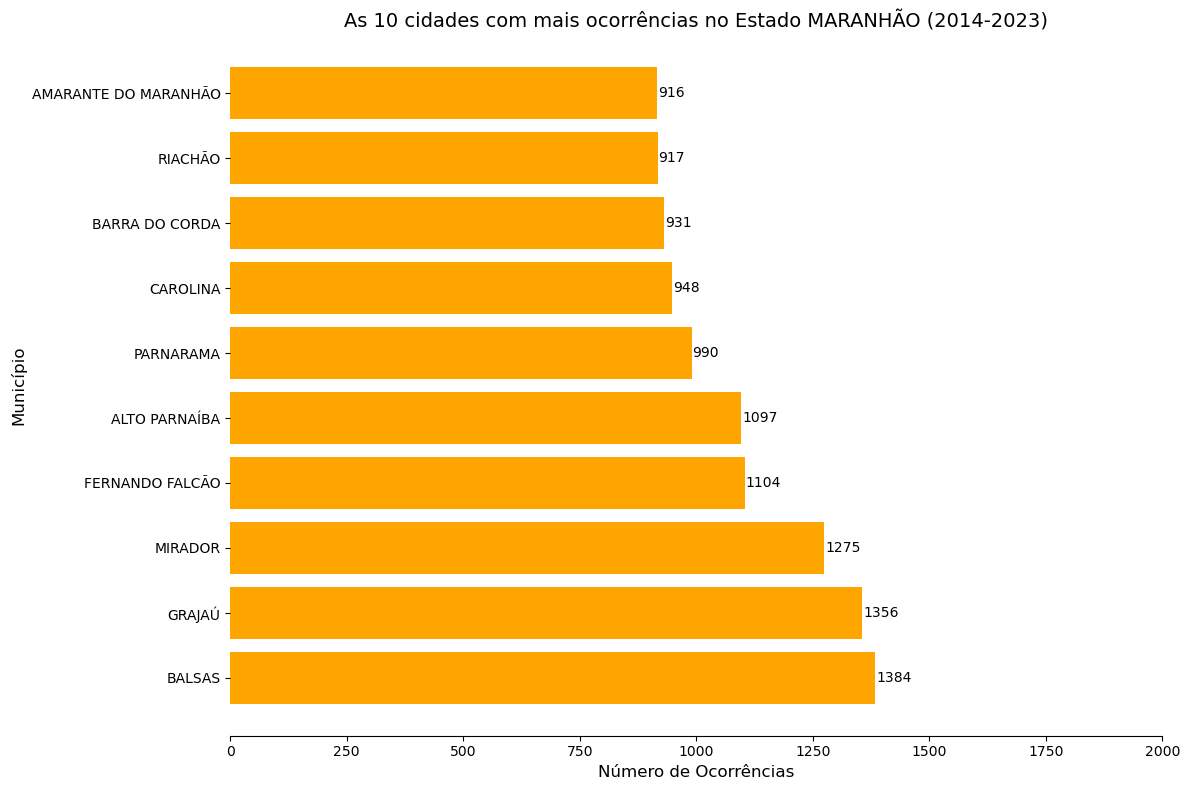

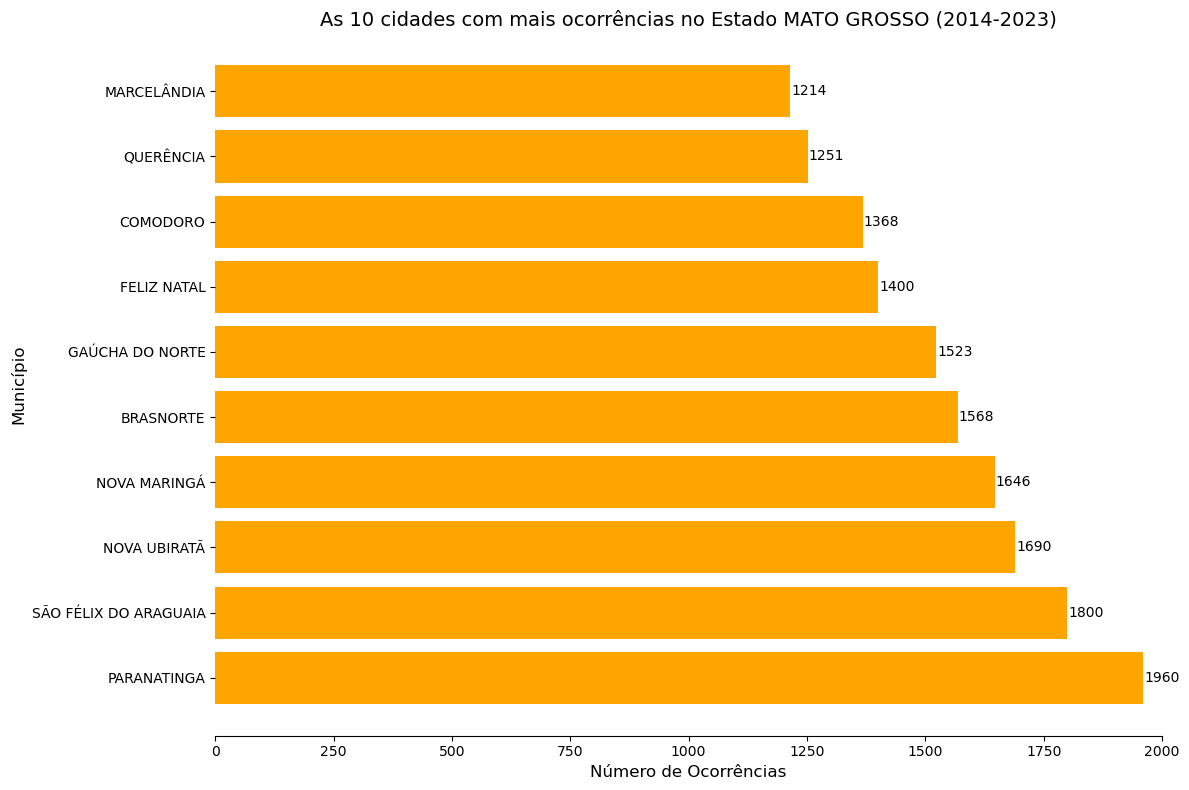

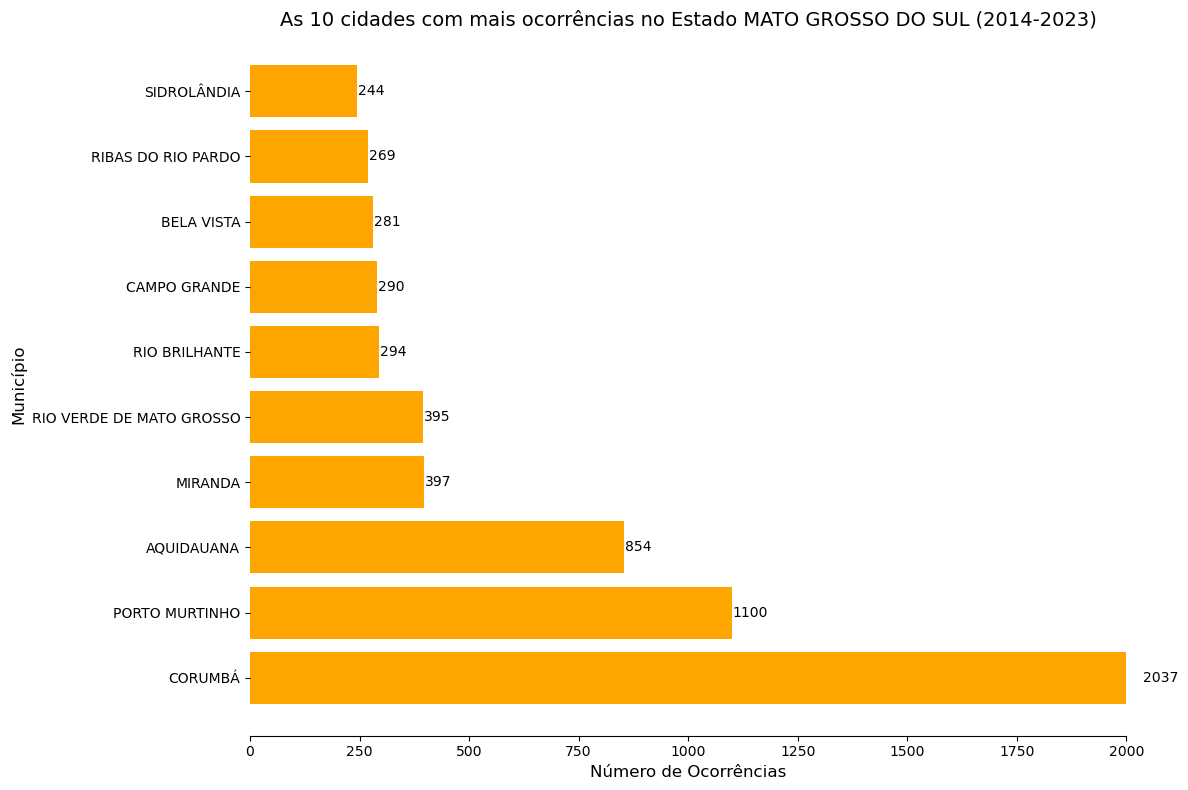

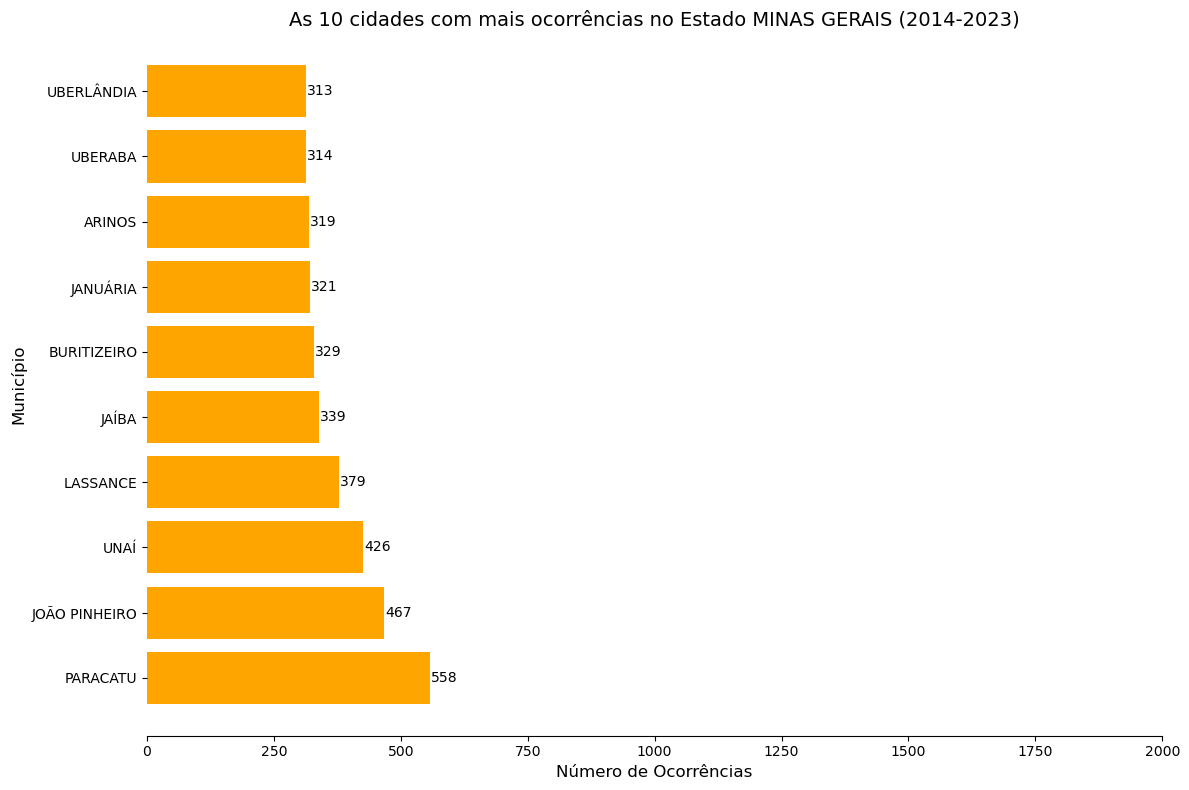

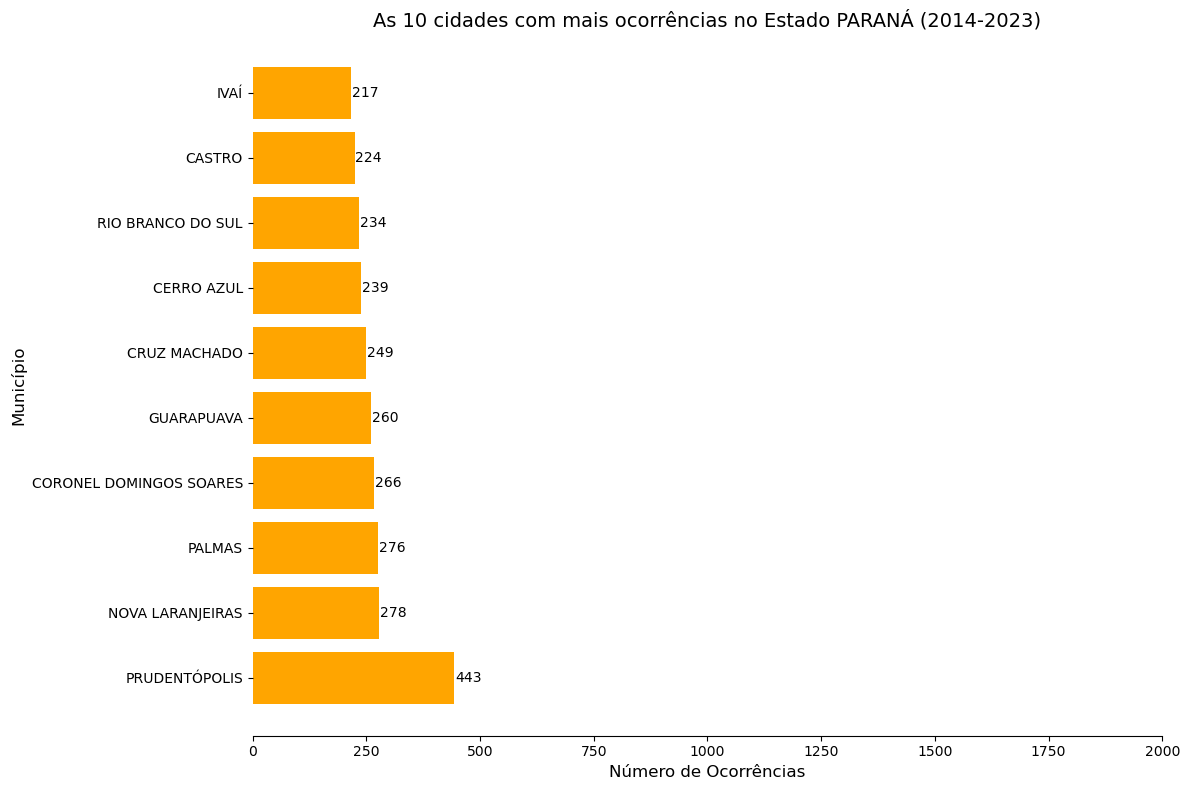

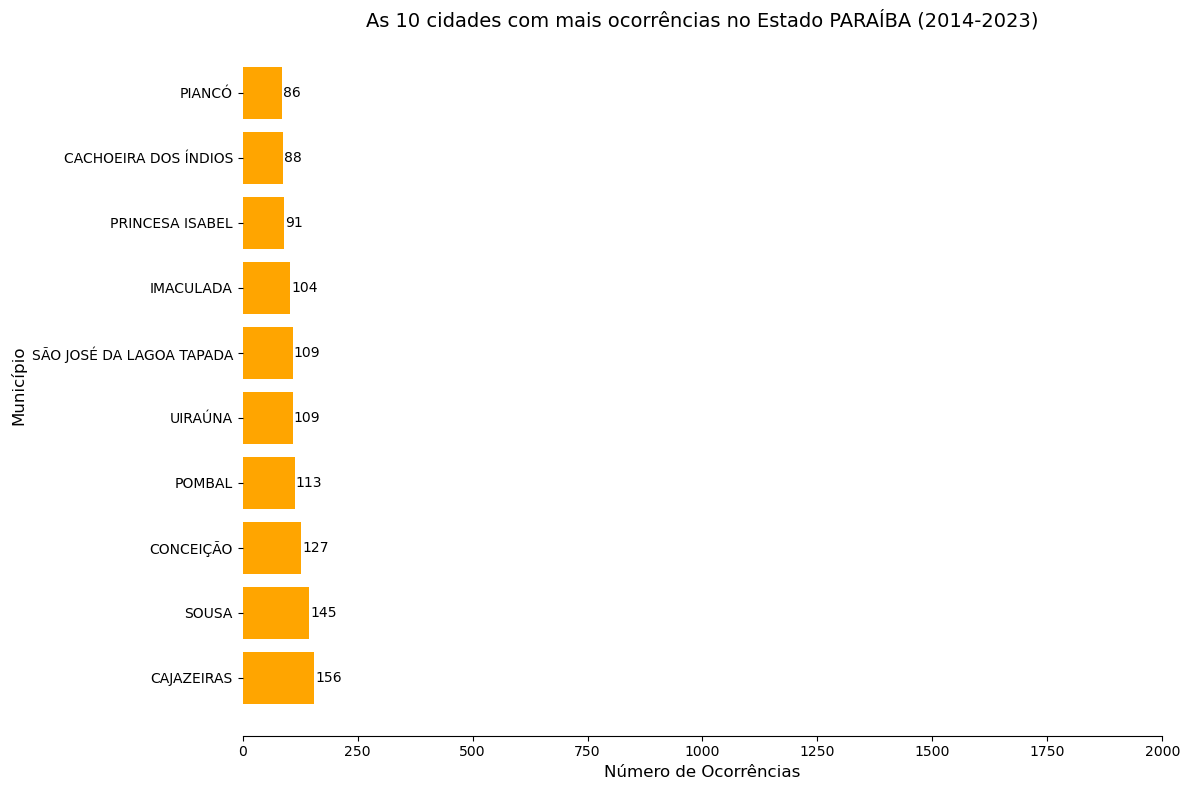

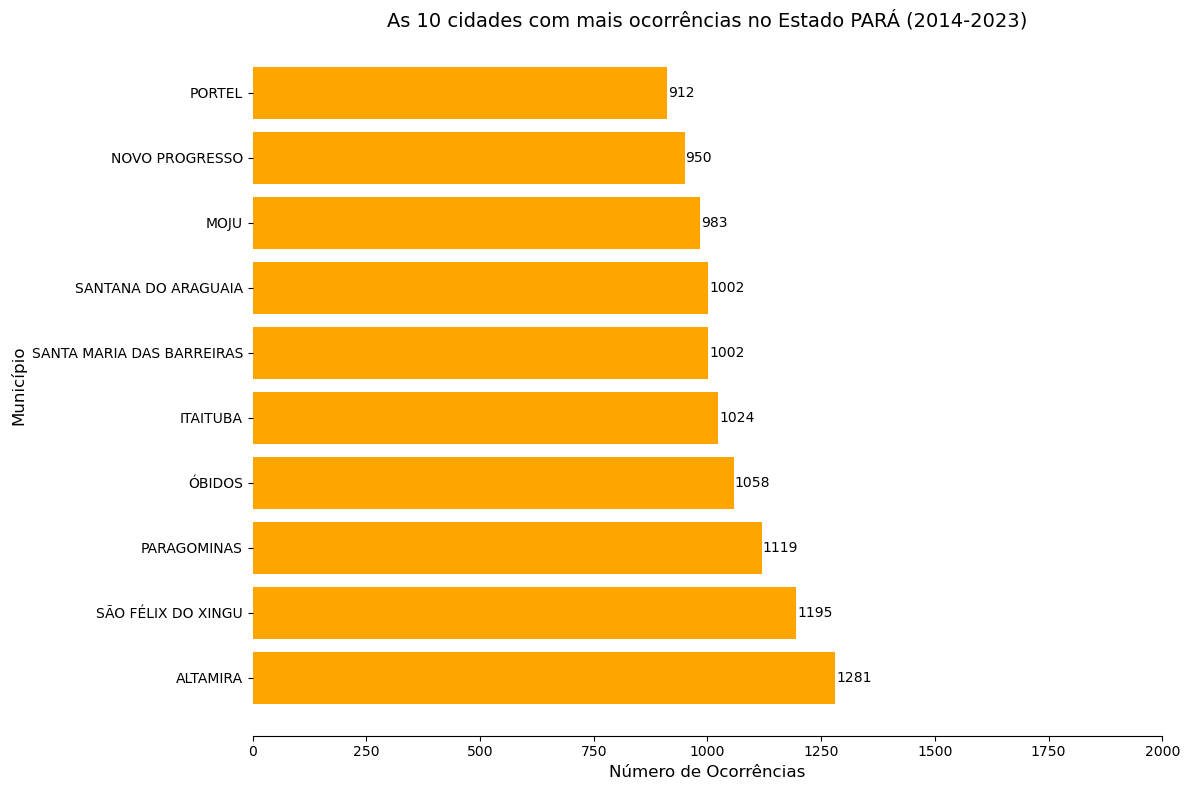

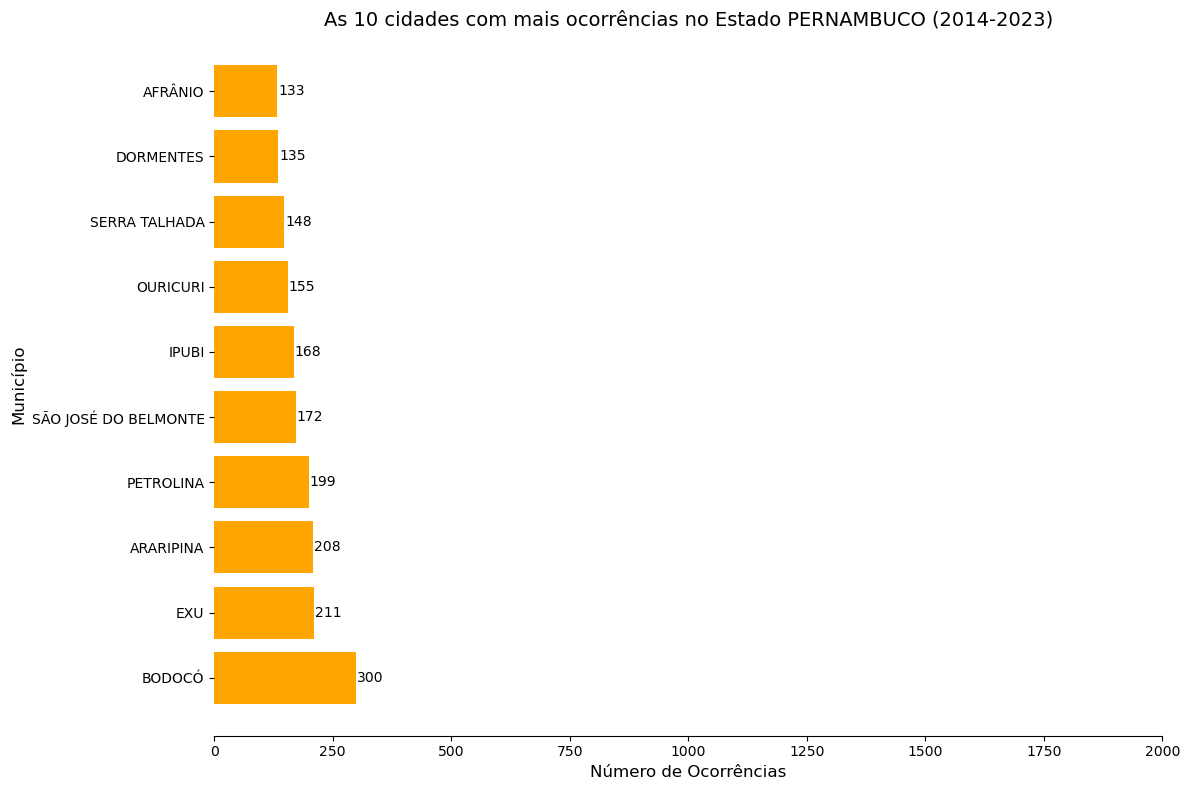

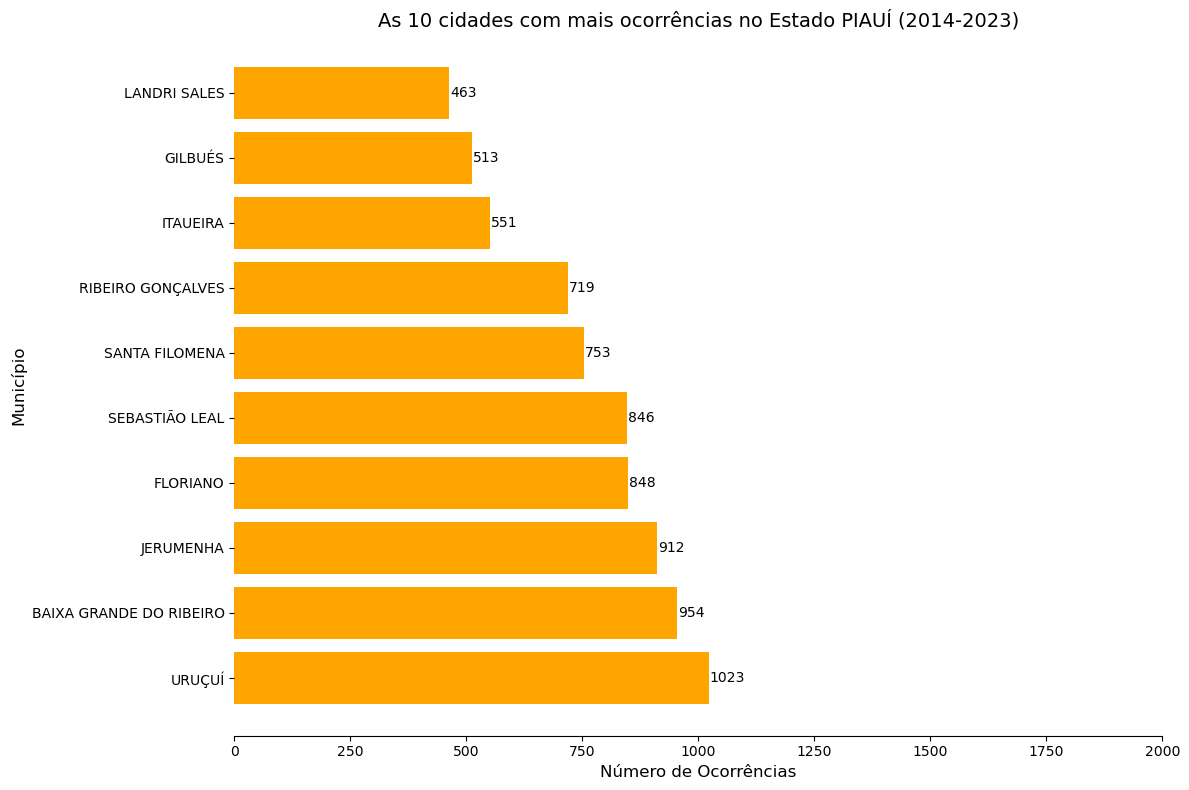

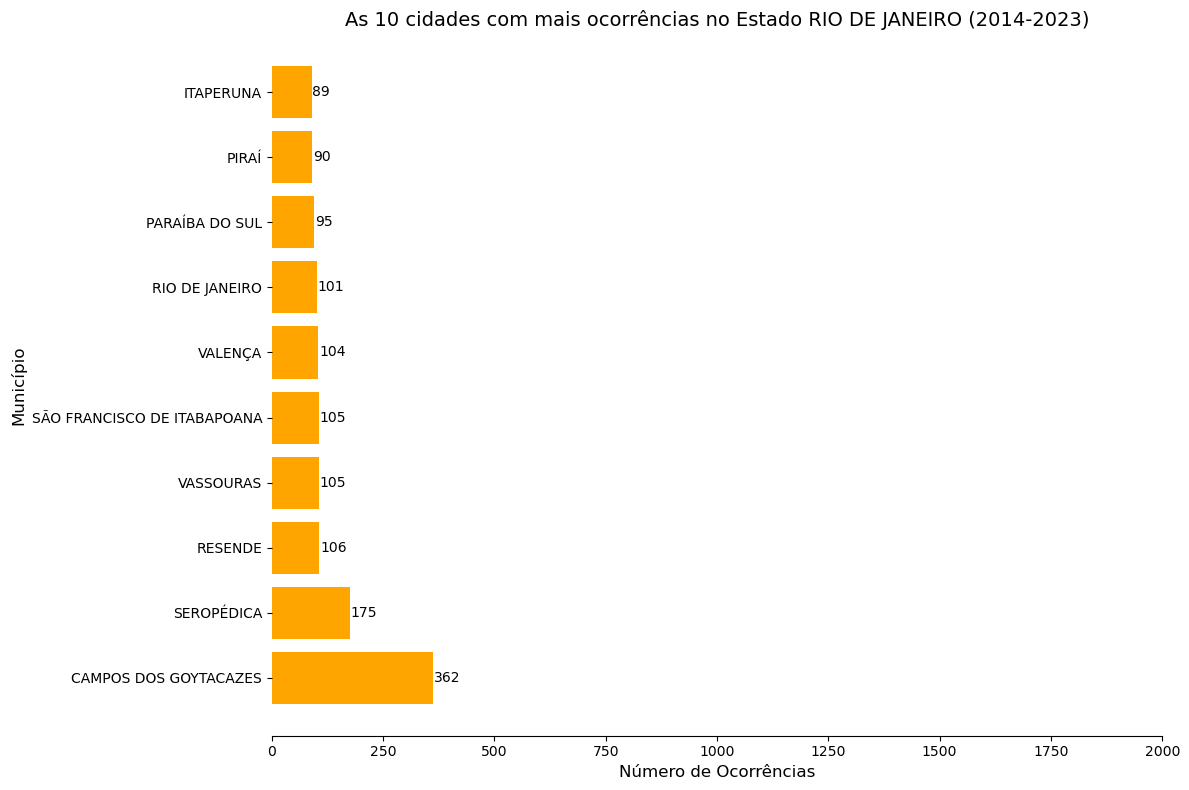

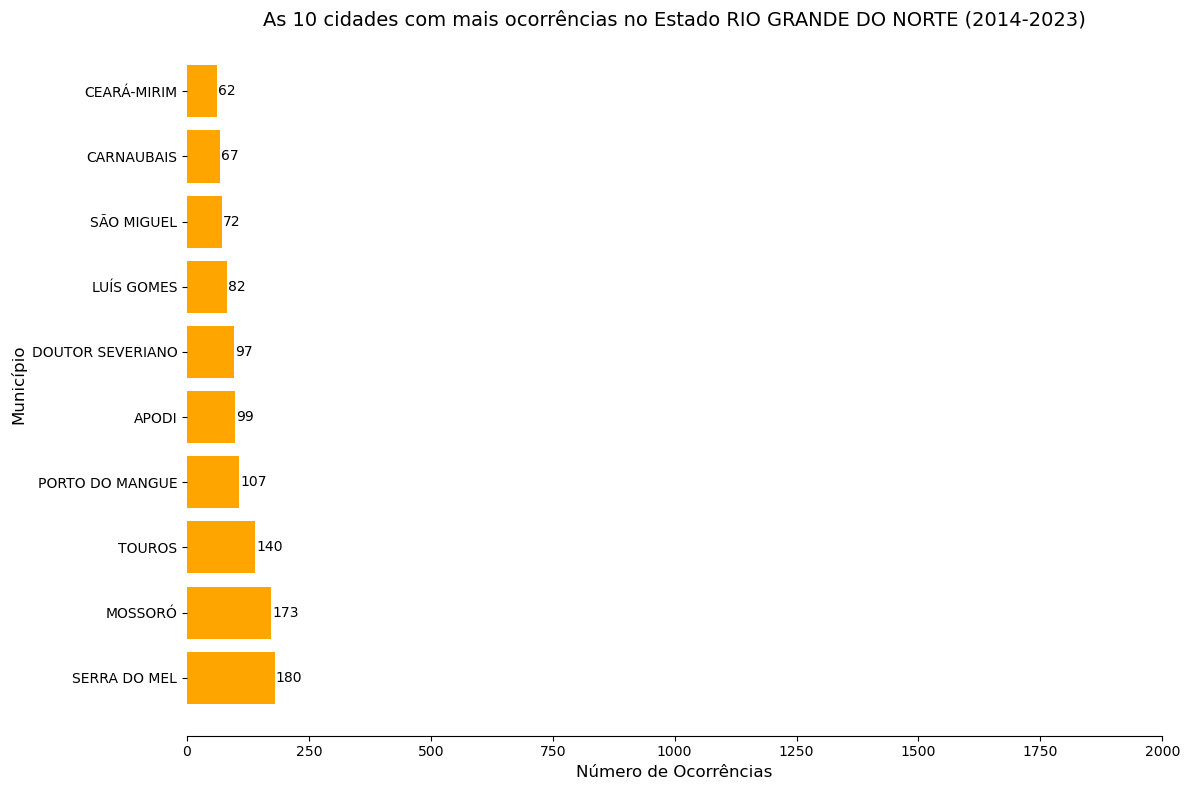

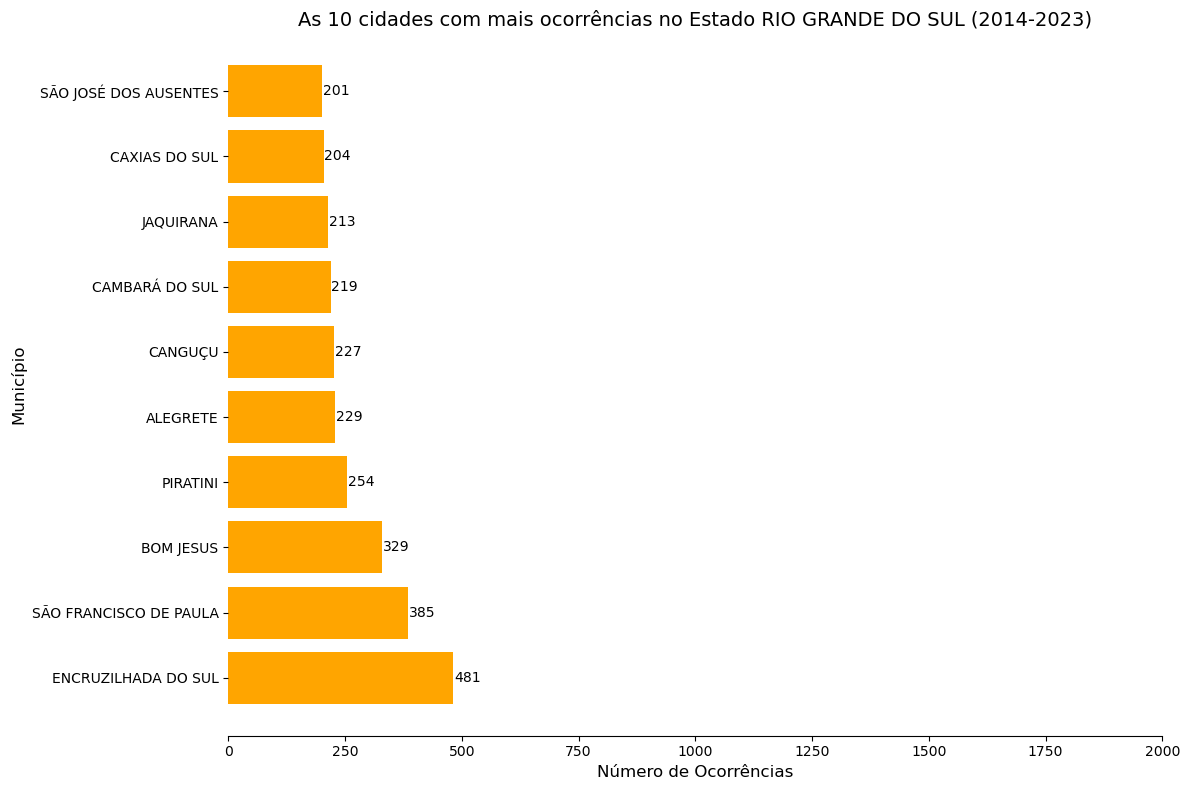

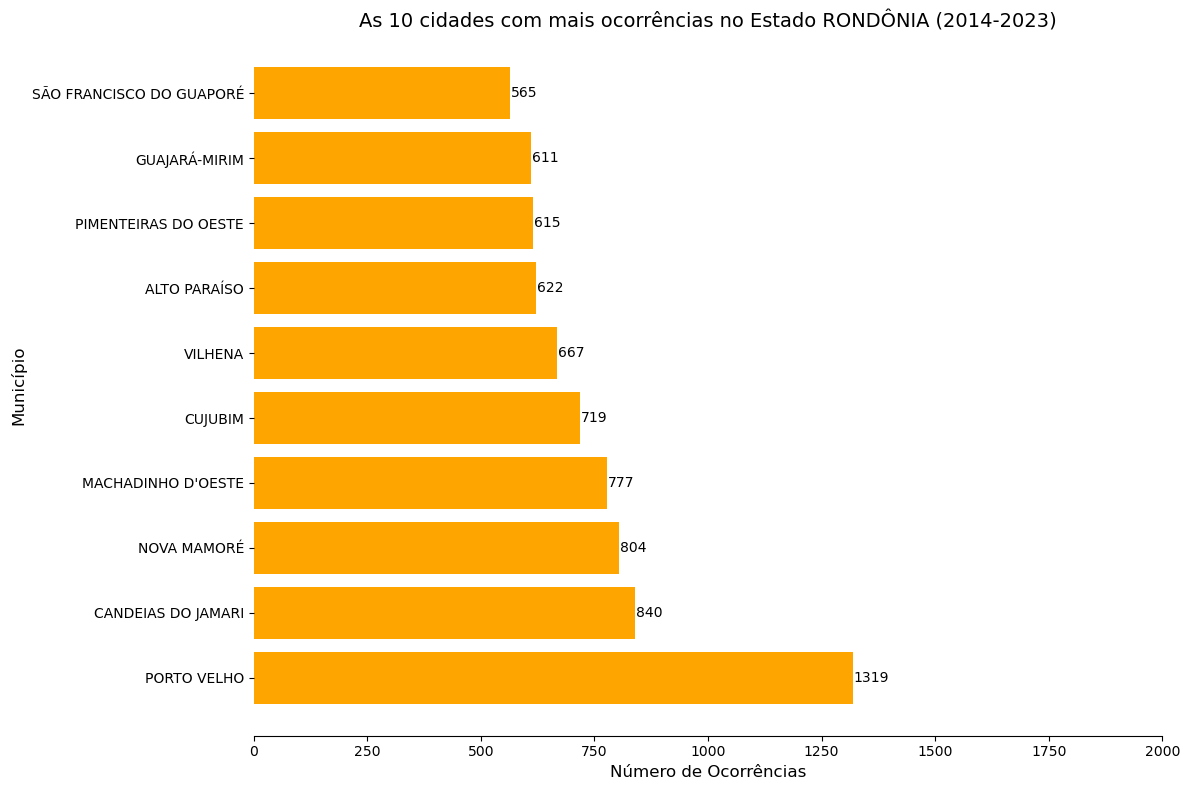

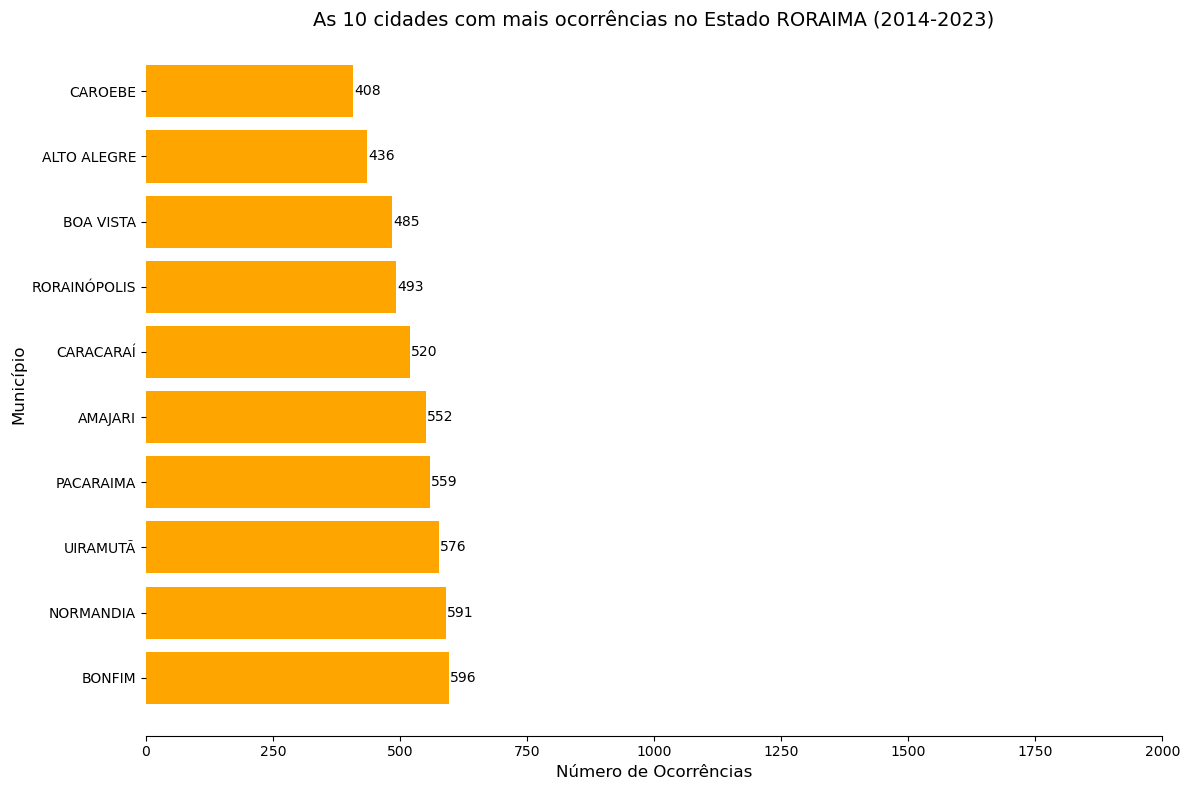

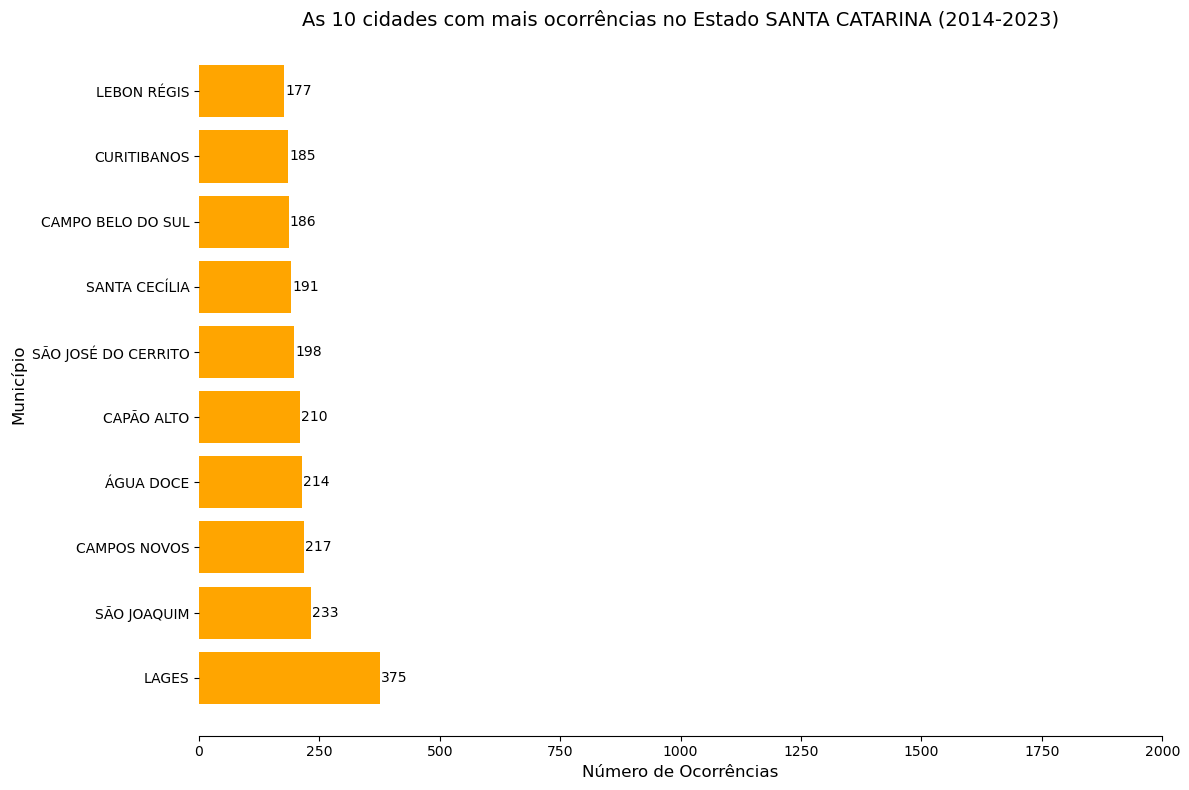

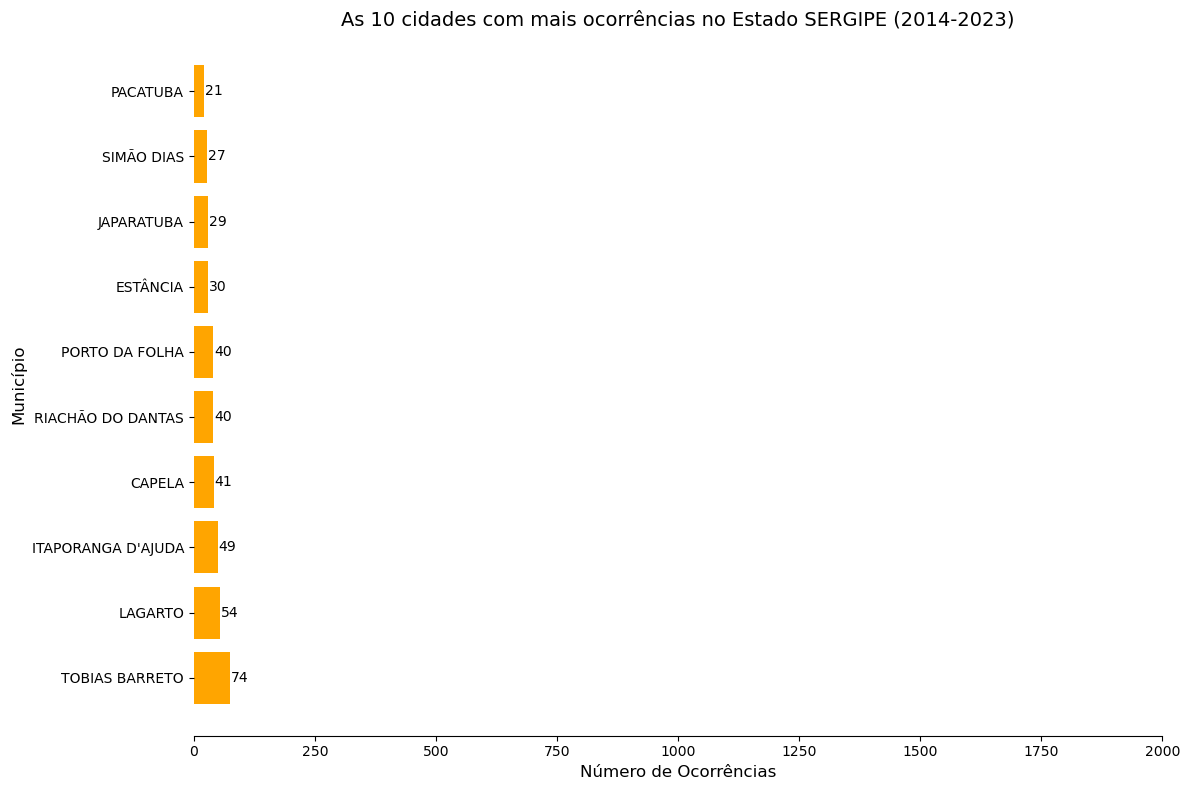

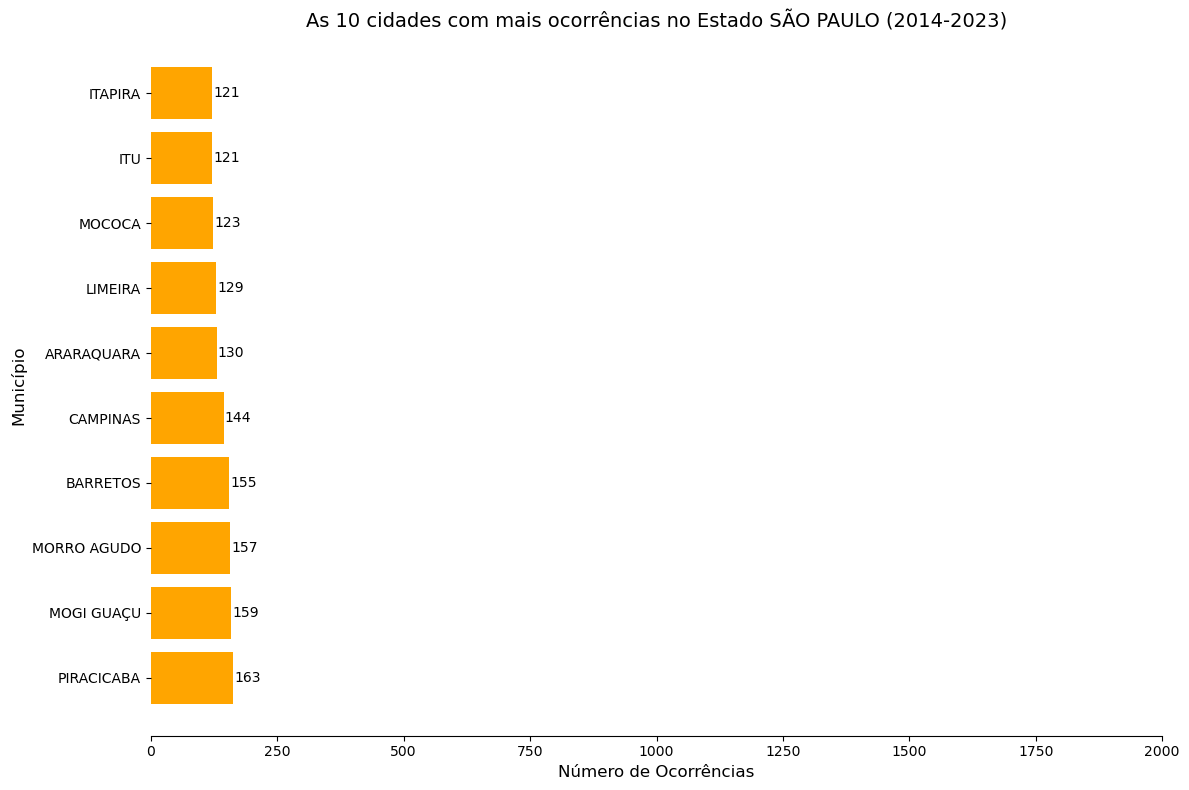

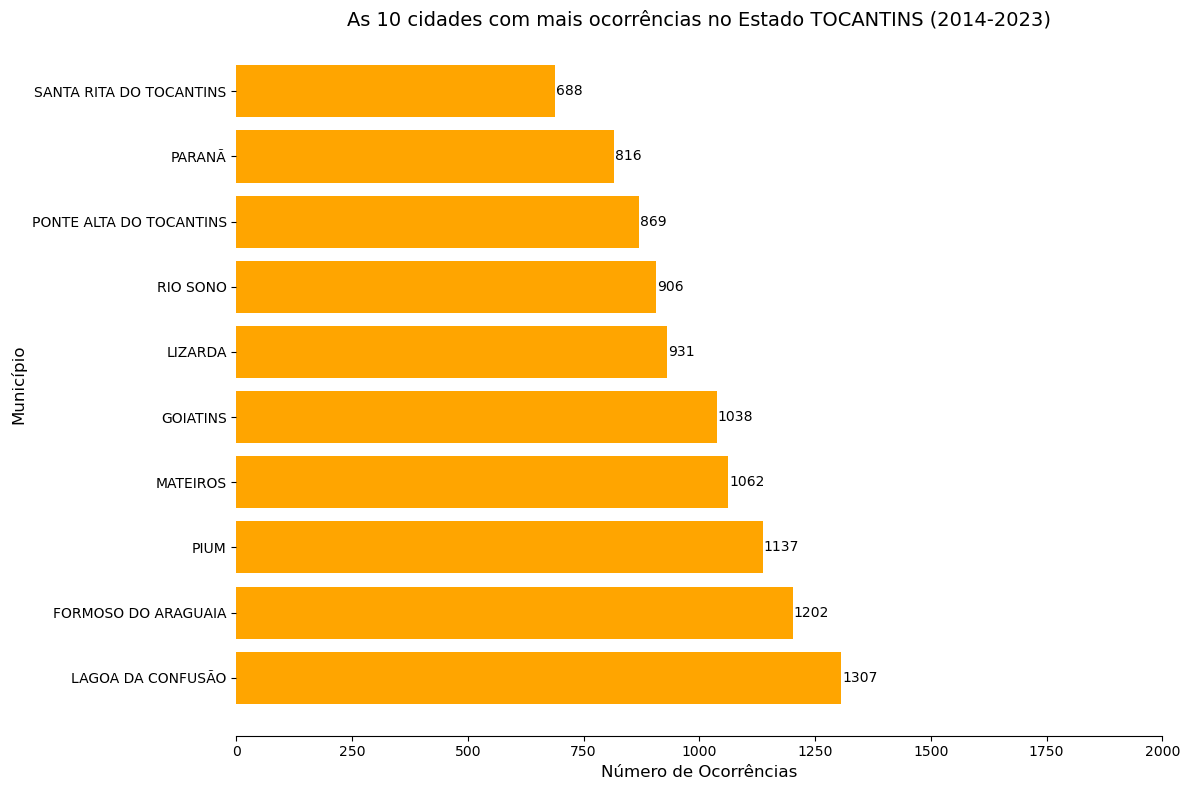

In [57]:
#gráfico dos dez municípios de maior ocorrência por estado ao longo dos 9 anos

df_oc = df_ocorr.reset_index()

#criar os gráficos
for estado in df_oc['estado'].unique():
    dado_e = df_oc[df_oc['estado'] == estado]
    cidades = dado_e.groupby('municipio')['count'].sum().sort_values(ascending=False).head(10)
    
    fig, ax = plt.subplots(figsize=(12,8))
    bars = ax.barh(cidades.index, cidades.values, color='orange')
    
    #adicionar os rótulos de valores nas barras
    for bar in bars: ax.text(bar.get_width() + 2, bar.get_y() +
                            bar.get_height() / 2, int(bar.get_width()),
                            ha = 'left', va='center', fontsize=10)
        
    ax.set_xlim(0,2000)
    ax.set_title(f'As 10 cidades com mais ocorrências no Estado {estado} (2014-2023)', fontsize=14)
    ax.set_xlabel('Número de Ocorrências', fontsize=12)
    ax.set_ylabel('Município', fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(False)


    plt.tight_layout()
    plt.savefig(f'ocorrencias_estado_{estado}.png', format='png', dpi=300)
    plt.show()
    

In [38]:
#calcular a duração das ocorrências
duracao = arquivo.groupby(['estado','municipio','ano', 'mês'])[['dia']].count().rename(columns={'dia':'count'})
duracao.head()

count
estado municipio  ano  mês       
ACRE   ACRELÂNDIA 2014 7        2
                       8       12
                       9       12
                       10       3
                       11       2

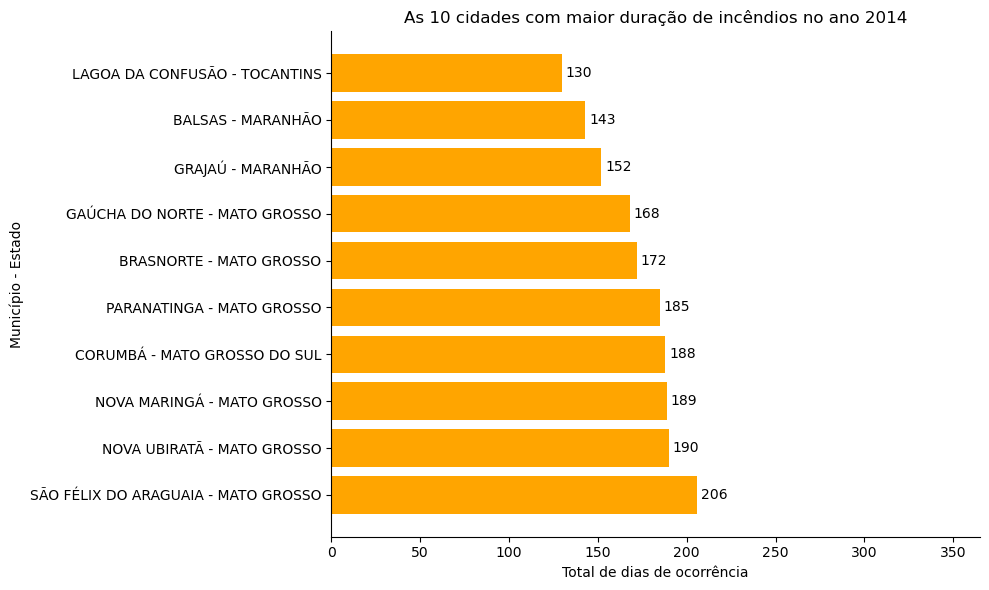

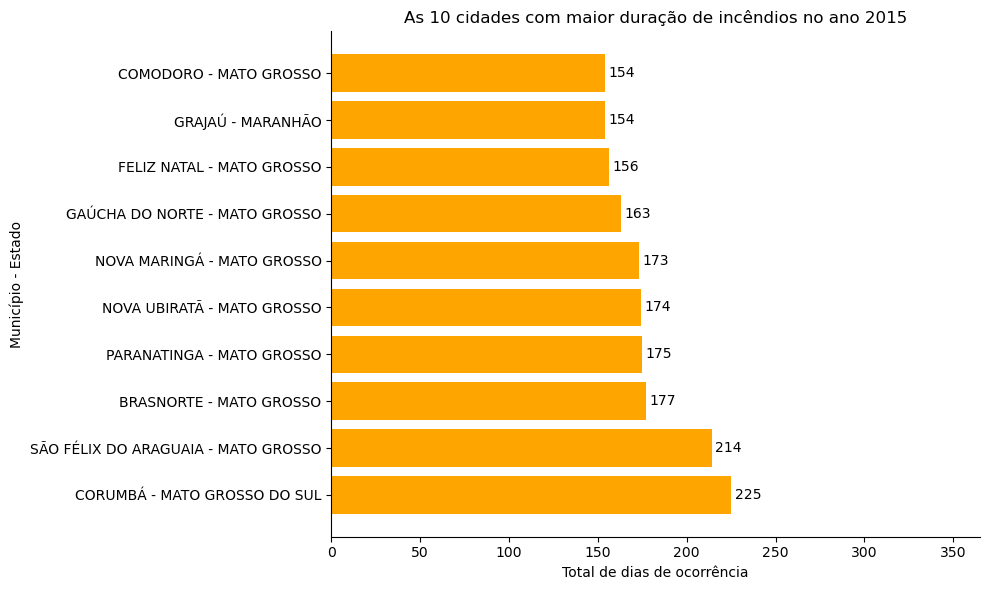

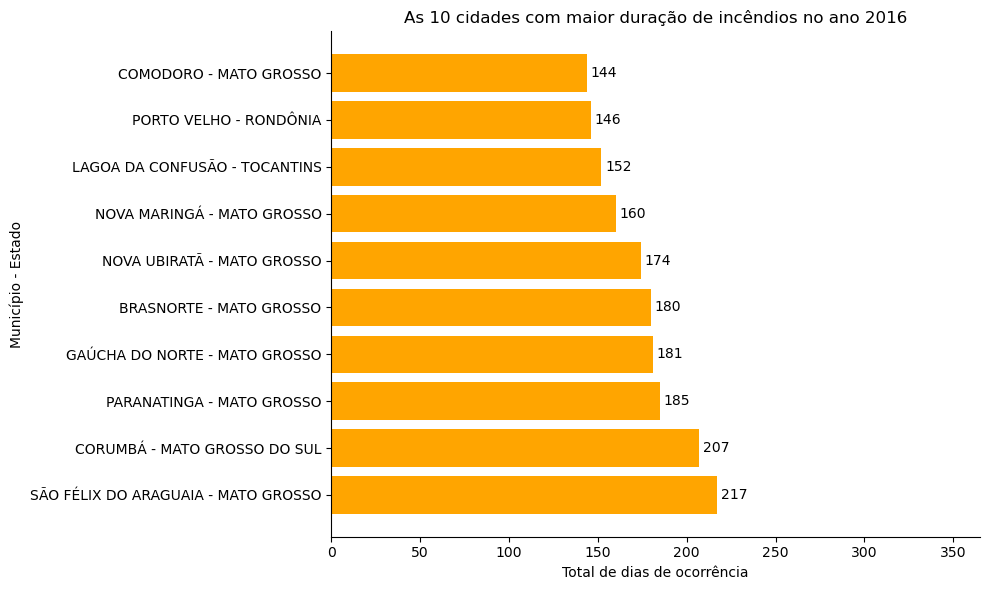

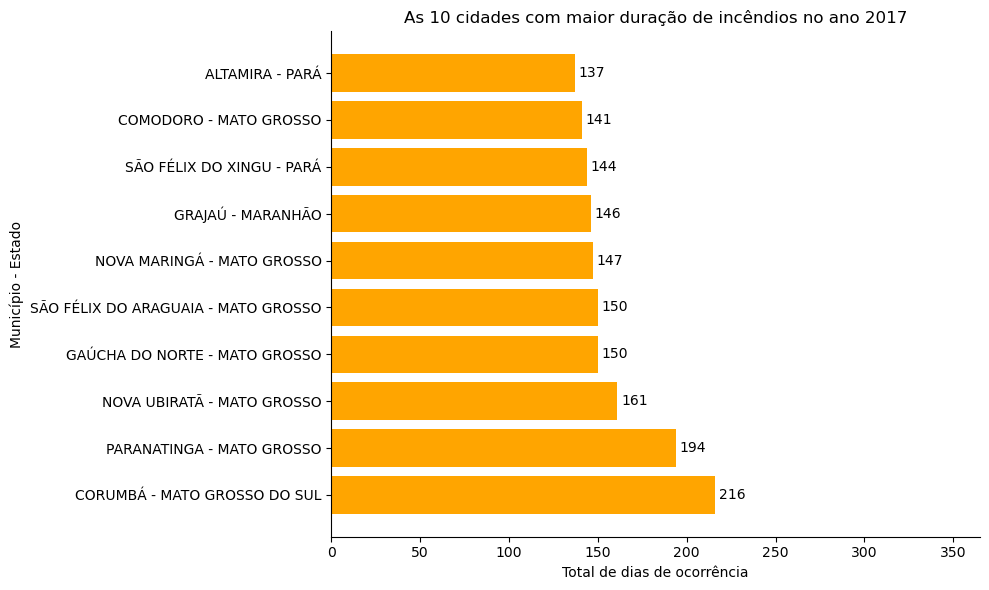

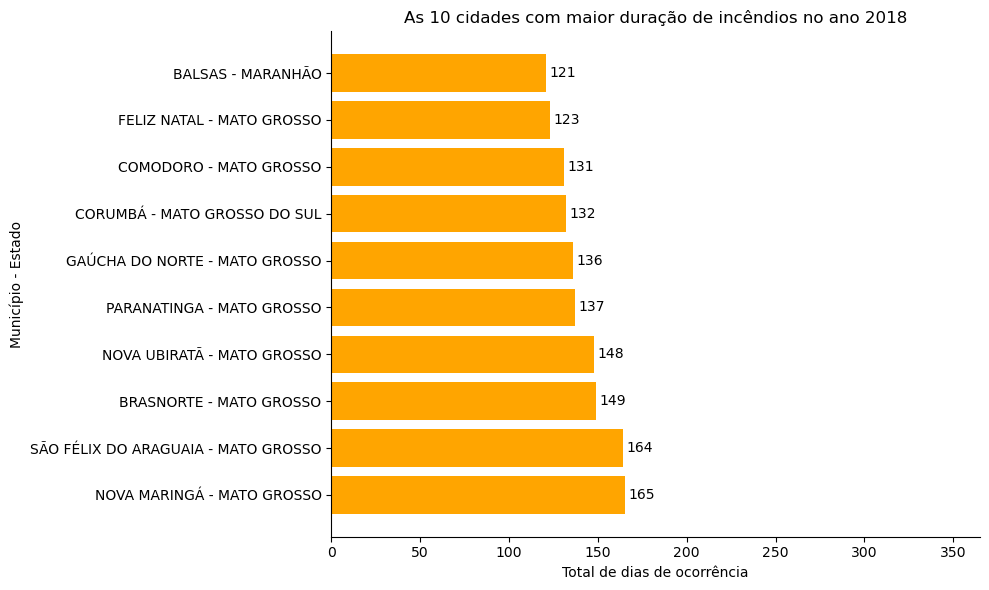

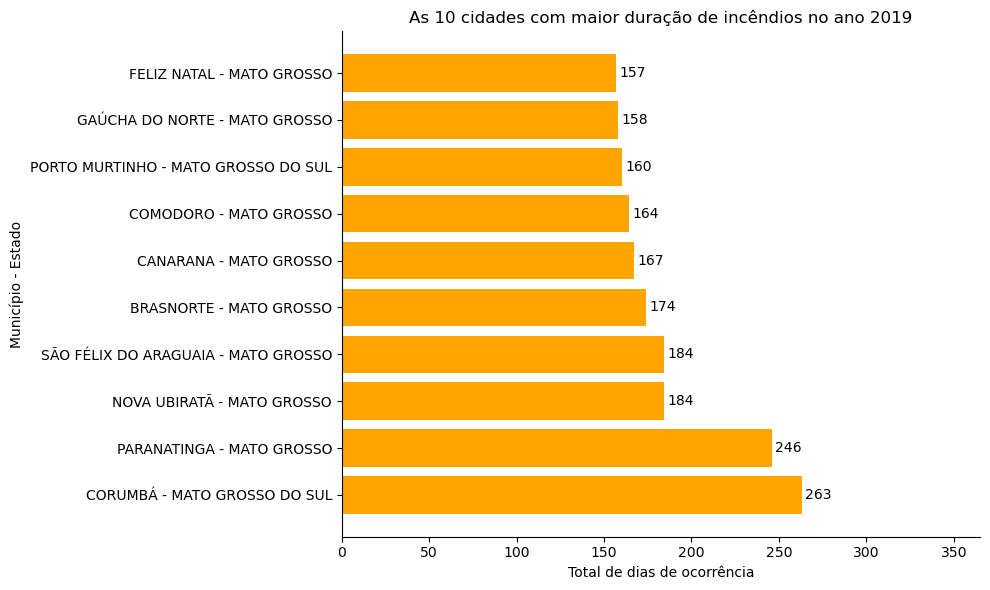

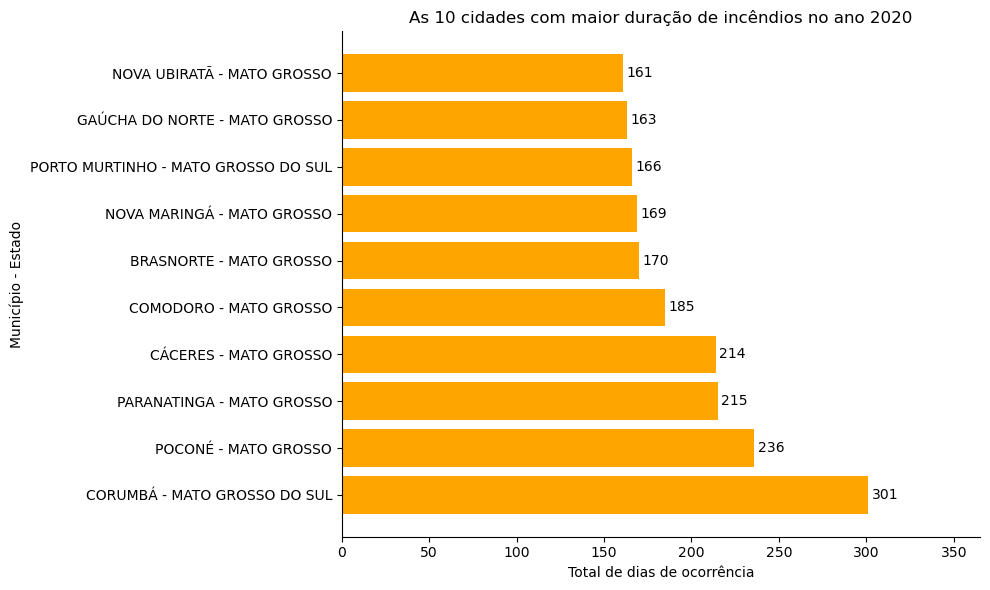

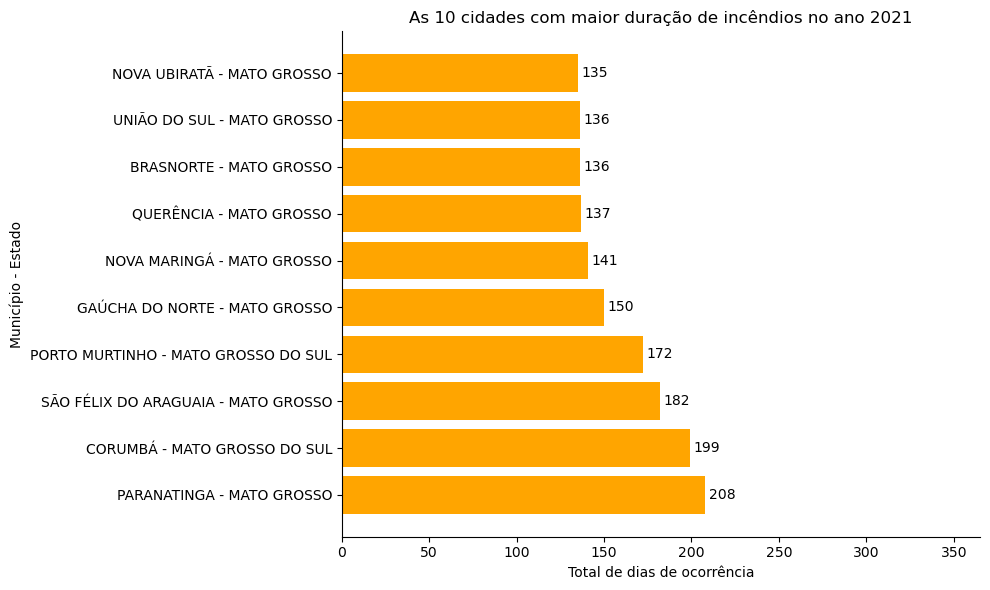

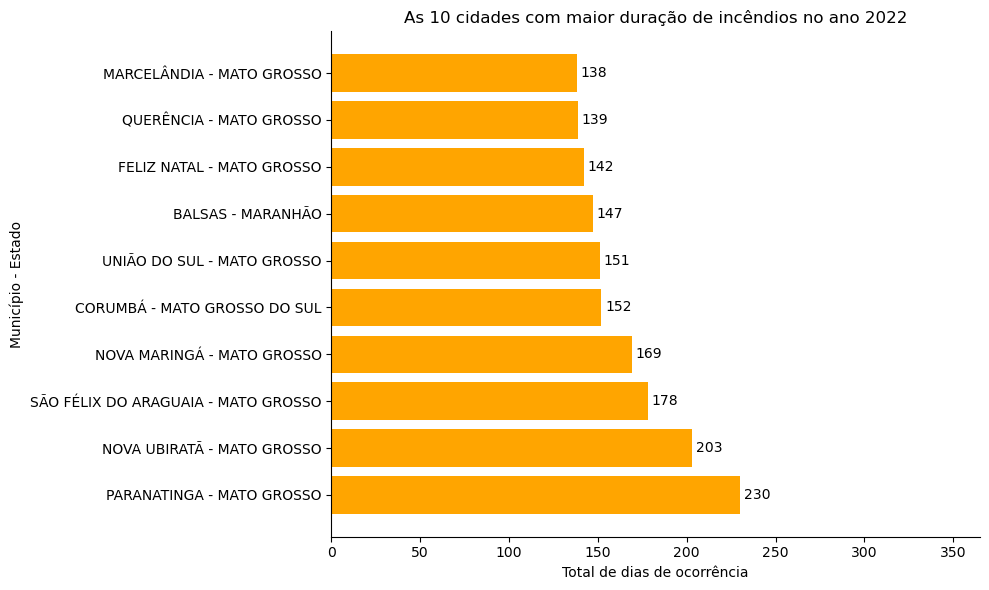

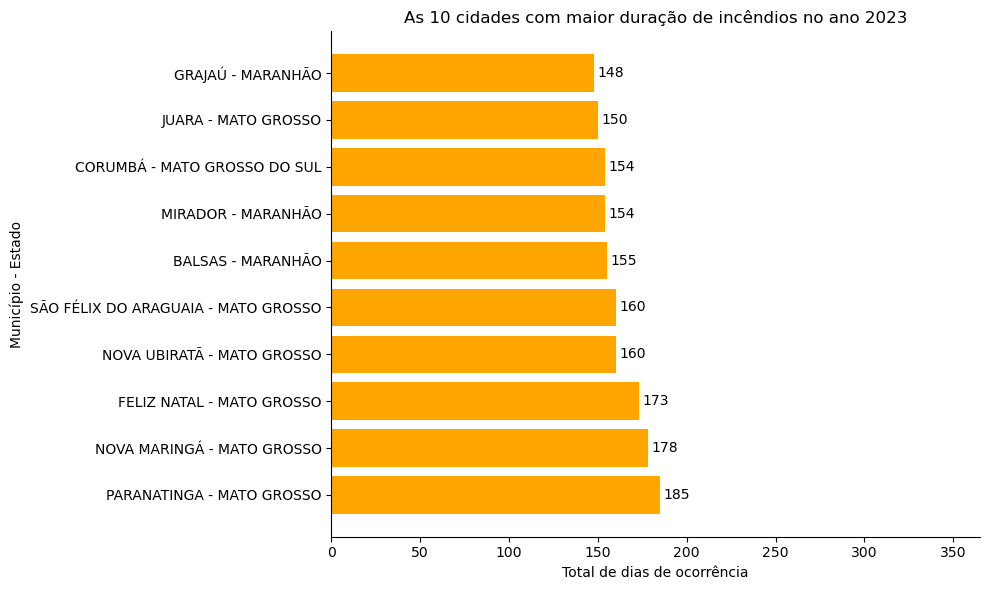

In [58]:
#gráfico dos dez municípios de maior duração por ano ao longo dos 9 anos

duracao_ano = duracao.groupby(['ano', 'estado', 'municipio'])['count'].sum().reset_index()

#criar gráfico
dur_cidades = (duracao_ano.sort_values(by=['ano','count'], ascending=[True,False]).
              groupby('ano').head(10))

anos = dur_cidades['ano'].unique()

for ano in anos:
    dados = dur_cidades[dur_cidades['ano'] == ano]
    
    fig, ax = plt.subplots(figsize=(10,6))
    
    bars = plt.barh(dados['municipio'] + ' - ' + dados['estado'],
                   dados['count'], color='orange')
    
    #adicionar os rótulos com os valores nas barras
    for bar in bars: plt.text(bar.get_width() +2, bar.get_y() +
                             bar.get_height() /2, int(bar.get_width()),
                             ha='left', va='center', fontsize=10)
    
    ax.set_xlim(0,365)
    plt.title(f'As 10 cidades com maior duração de incêndios no ano {ano}')
    plt.xlabel('Total de dias de ocorrência')
    plt.ylabel('Município - Estado')
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.grid(False)
    plt.tight_layout()

    plt.savefig(f'cidades_maior_duracao_{ano}.png', format='png', dpi=300)

    plt.show()
